# Demo: Pandas

## Two important datatypes in Pandas 
* Series (like a vector or array)
* Dataframe (like a 2-D array or Excel spreadsheet)

In [2]:
import pandas as pd

population_dict = {'California': 39_538_223,
                        'Texas': 29_145_505,
                     'New York': 20_201_249,
                      'Florida': 19_538_187,
                     'Illinois': 12_812_508}
# create a series from a Python dict
population = pd.Series(population_dict)
population

California    39538223
Texas         29145505
New York      20201249
Florida       19538187
Illinois      12812508
dtype: int64

In [3]:
area_dict = {'California': 423_967, 'Texas': 695_662, 'New York': 141_297,
                 'Florida': 170_312, 'Illinois': 149_995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [4]:
# Create a DataFrame from two dicts–each will 
# be a column in the new DataFrame.
states = pd.DataFrame({'population': population,
                           'area': area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
New York,20201249,141297
Florida,19538187,170312
Illinois,12812508,149995


In [5]:
# DataFrames have an index that we can inspect (or change)
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [6]:
# View column names
states.columns

Index(['population', 'area'], dtype='object')

In [7]:
# View a specific column
states['area'] # or states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [8]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [12]:
# Generate a Boolean series based on a Boolean condition
# e.g., Which states have an area > 150,000 sq. miles?
 # or, Which states have a population > 20,000,000
large_area = states['area'] > 150_000 
large_pop = states['population'] > 20_000_000
# We can use the & operator (bitwise AND) to combine conditions
states[large_area & large_pop]

,population,area
California,39538223,423967
Texas,29145505,695662


In [13]:
# We can use the | operator (bitwise OR) to combine conditions
states[large_area | large_pop]

,population,area
California,39538223,423967
Texas,29145505,695662
New York,20201249,141297
Florida,19538187,170312


In [14]:
# We can see that under the hood, the values in a DataFrame
# are represented as a matrix or 2-D array
states.values

array([[39538223,   423967],
       [29145505,   695662],
       [20201249,   141297],
       [19538187,   170312],
       [12812508,   149995]])

## Reading CSV files into __`pandas`__

In [15]:
# Read data from a CSV file
data = pd.read_csv('https://raw.githubusercontent.com/jadeyee/r2d3-part-1-data/master/part_1_data.csv', skiprows=2)

In [16]:
# Show the first n rows, default = 5
data.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [17]:
# Show the "shape" of the data, i.e., rows x columns
data.shape

(492, 8)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   in_sf           492 non-null    int64  
 1   beds            492 non-null    float64
 2   bath            492 non-null    float64
 3   price           492 non-null    int64  
 4   year_built      492 non-null    int64  
 5   sqft            492 non-null    int64  
 6   price_per_sqft  492 non-null    int64  
 7   elevation       492 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 30.9 KB


# Indexing

In [19]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [20]:
# view raw values
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [21]:
# view index
data.index

RangeIndex(start=0, stop=4, step=1)

In [22]:
# we can index, just like a standard Python list
data[1]

0.5

In [23]:
# Because index is a RangeIndex, we can do
# normal slicing from offset 1 to offset 3
# 
data[1:4]

1    0.50
2    0.75
3    1.00
dtype: float64

In [24]:
# create a series with non-integer indices
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

In [25]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [26]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [27]:
data['c']

0.75

In [28]:
# if you are particularly perverse...
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [29]:
data[3]

0.75

# Selecting and Summarizing

In [33]:
# using the read_csv method of pandas we read file 
users = pd.read_csv('/Users/jwkidd3/Data_Analytics_ML/data/ufo.csv', sep=',')

In [34]:
users.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [35]:
users.shape

(80543, 5)

In [36]:
users.tail()

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


In [37]:
users.index

RangeIndex(start=0, stop=80543, step=1)

In [38]:
users['sex']

KeyError: 'sex'

In [ ]:
# or...
users.sex

In [39]:
# get descriptive statistics of numeric columns
users.describe()

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [40]:
users.describe(include='all')

,City,Colors Reported,Shape Reported,State,Time
count,80496,17034,72141,80543,80543
unique,13504,31,27,52,68901
top,Seattle,ORANGE,LIGHT,CA,7/4/2014 22:00
freq,646,5216,16332,10743,45


In [42]:
users.City.describe()

count       80496
unique      13504
top       Seattle
freq          646
Name: City, dtype: object

In [44]:
users.State.mean()

TypeError: Could not convert NYNJCOKSNYNDCAMIAKORCAALSCIAMICACAGATNAKNELALAKYWVCAWVNMNMUTRIFLVACAFLNCVATXCANMNMNYCATXCAWAMEILAZTXNYFLCALAOHNMCAPAMNNDWICAWAMDWACAPASDWASDPANMILNMNYCANVILVAIDMNMOCANMCAWIOKNYOKMICAINTXMDWVCANYPAMDWAWVSCCTAKTNORAKALMSMNCAALWAOHTXTXTXMDWVNYNMARVAWAMSMSPAMDMOCAMIFLTXMSTXWICOCOIDMSOHNJCAPAKYORKYNJCACACTCAKSOKOKNCCAMSNYALWAGACAWYUTWACAPAFLNMUTNYNVILTXPAWAWIVACOILINAZCAFLCAMIPAWYTXLAFLNYWAFLFLFLMNMIWACOTXVACACAPACAWANYMSWARIFLTXAROHPAMEMOWAILWINETXCAMAMAIACAOKPAAZCANMWATXWATXOHWACOMTNETNINMOCACAKYNMMDPATXLAILNJINTXMEFLIACTAKCACAORILTXNYILCAOHVAPACAGACOMECADETXVAVATXVAMACACAMOCACASCINPAINKSNYNYNYINPACAWANYTXPAWVTXMICOTXNJCANYMAFLCAMNOHCATNFLMNINMOPAFLILNJCATXTXNCWAARCOLAPAMOKYTXCAAZCACANYWVCAMDMNOHFLOKMOTNALUTWVOHTXCACANYCATNOKNJNYOHCAPAMONJTXNEKSCACTWYOHMAALVAMDARCTNHTXINSDOHOHTXLAMACACAOHNYTXTXCANYTXNYMIMEMTINMICATXCAAKTXMINYIAARNYCAWVWVTXNJMDOHCATXPACACOPAUTMOIDOHMDINCANYCAWAMANHMAIDINTXOHCAMNTXTXWAKYAKIANJAKMNARNYTXCONJTXAKWIWITXMIVTVTMDCAOHCANCCANYTXNEOHCAALMOKSNYCATXOKOKOKWAGAMETXKSLANEINNYFLUTCAWYMDCTMEWAGANDIANDKYILNEMNORILRIWICANYFLNJPAOHCAILOHINTXCTOHNECOMIMTMNCAWVMNAZWINYAZCAWAMECANHINMAOHFLKYTXCANYNYNMCANMNVNVOHNYILWIWISCWAWVFLINCACACAVAMNGANCTXTXAZNYINKSUTWAWACACAPANJMIMEWACAFLPACAMTCAMDKSILKYNYPAORNVMNORWIARCACANCTXCAPACTMANJWINCNYNJWAMAMACAPANDNYKSTNWACAHIMNNYWAKSCAINCATXNJNYPAOKWASCUTNYFLTXALTXOKILMOGANCFLCATXGACTOKPAWVORILCAPAPAILNYOHGAOHNEOHOKTNNCTNFLCASCFLTXFLNCWAUTNCOHPAGANMNJOKNJTXOKSCPASCCACOILNHWAILNCILWANYFLCACAMINYCAFLILWATXOKNYNJILCTMIOHMOKYARNYGAORNJOHKSCOAKMIMAWAWAVAMOWINCNJGAVAILFLTXCATXNYCAMTMANJTXWAILAZFLPACAVAMANYMDOKKSFLTXCAMOMDTXNCTXKYILMICACAMNCOCOWIFLCTWAMNARCAMIGANYCTPANCTXUTCANYARMOMOAZMEILMNNYNJMOMOILILVAOKCAORMAMSNYCAWACAOHMOWANYMANYNJVAMSINNJGACANEOKCAVAFLKYMIWACACOKYVTARCACAVTGATXOKPACAWANYMDCOILMAMANVNVFLMTOKTNMITXLAAZGAVAGAMIWAINILCANJNEWIPAILOHORMTOHGAMOVANVMINJMACTILPAKYRICAMAILILMEMOVACAFLALMDCTNYSCUTNYWASCCAILILILDEORTXOHLAMITXVATNTNTNILARIAINWAILLAGAMETXTXPAFLFLFLPAWYPAWIMOARNYWAALCACAOKMONMNHWIMOCAKYOHNHILNVFLNYCAOHTXGAVACACANYNEGAMOPAMITXOKFLWVMACAPAKSNMORPAMEMTWAFLALNYCAFLARVANYNYCANJILMOLARIFLNYNVMIMAILCANCCACAMITXWVNYINIAWIKYOHOHMAVAPACAORMICAOHCTWINCNEMOILTXPACATXMANMMNNHCAVAMTCAOKILNYOROHMIINTXININSCNYNYMAMONJPAINPAORKSWAMENMMSVAPAPACACACTPAPAOKNYIAMACACACAMDMAMANHFLCTNYNYMDNYOKNYNYPAPAWANJCTCTCTCTCTTXSCTXPANJAZWAARAROHOHCAMIMITXMDNJMICTNJMITXWAILMIMIMOMATXNYSDMAWYOHPAWAWANEINMDOKOHNEHIALAZKYMIVAMNNYMONVWAILPAMINECATXTXCAOHMONYMIMDPAPAMTCACANCNCMICAMITXMDWIOHORORPAPACAOHAZPAIAWAMOMNCTOHINOKSDSDPANMCANYINWACAARCAPACAILSCNMCANCDEPAMDPAWVMATXMECAFLKYMAMATXCAIANYCAILOHMIOHMICADEMTILWANYNYILWAMEOHCAINWAINNYNYCANEWAWVINTXAKCAOHWVILCTCAVAIARIWVNYWAIAOROHALFLTXFLINCAORNYCANMNMMSFLFLFLFLFLAKWANYFLTXCANCNJIAPAPAORILINFLKSTXTNORNYMACTCAKYLANHTXOHILGAFLFLNVFLFLFLGATXFLTNNYTXCACTNYFLOKTNFLNVWAFLCACALATXMEMEOHMDHISCKYMNCACAIAMOALWIOROHWANYMOCAPACAIDALWAIATXOKGAKSWAAZMICANJNYTNCAUTGAORCAIDMIAZILKSWYOHCAMNRINCLAKSHISCWAILALORMNTXNJCOARWYWIPAPACTCAWVTXMEFLNYOHWINYNYORCANYWIARARARKYNYCOARILNMMAFLWANYCAAKNJMAINCAPAFLIDCAKYKSMSKYOHCOKYNEMDCAMEOHGAMEKSORHICACAOHNMWINYILMNNYNJFLALNCCACACAARCTTXOKCALAMOILWAOROHMDFLNJCALAMDAZFLIDWVNJCAOHNYOKMINYCOGAGAARMIOHWAKYNENVIAPAIANHININNEMOWIMIUTNJKYCONYCAFLOHILNVARPAMTMDCAALSCNJTXOHTXMSWANDCACAAZMNNVNDPAILCAMNMATXFLNCOHCATXTXCAKYTXTXTXNJPAPAVANCCACACAUTIAPASDNYHIMNAZMDLAILCAALMAOKALTXSDORKSMDCATXAZCTPAUTOHCATXMAMAALTXGANJINVANJARCTVAAZNVWACAOHMAMSMEGAIAOHSDCACAMNILKYTXTXNYFLSCCAWANJORNJCTCAGAGATXCAPADEPAOHCANCKSVANJLACACAKYCOARSDIAKYNJNJNJMAMEILSDCANCMNILWILAMDOHPAMIFLWAMAFLMEOKMACAFLWAALMOSCINCACAAKAKPALANVFLPAMTFLMTFLINNEILNJWAOKGACAHIAROHCTCAMDSCMOTXCACOMITXCAFLILMTHIMTVATXKYCAOHNYCAMSMDSCORNJMIFLNYCOARWAPATXVANYILFLTXINORMAMIINCTWAAZCAMNAZALCOCACAFLCAAKCAMNFLUTIAPAPANYNYILOKORFLILILCAOHWAPANCOHSCMOOHOHFLPAMNCTCANYAZKSPANYCAVTILCACACAMEMATXCAAKLACATNTNCTMSORDETXFLNHAZPANYNYNYNYCAAKCACAGACAAKLAKYCTCTALMOMINHCAFLNHCACOCACOCANJGAFLFLPATXCAALAZNYINNYNYTXTNILNYMOFLFLPAORVACACACAOHNYMANYIAOHOHILHICACAMTMDNYMDILTXINCTCANYILRICAMNCASCWYNCNYHIWATXMIILVACAMINYUTCTMANYCAMAHIMTFLNDNYNYMIMICAAZNHHIFLMOCANJRIILTNFLNJTXTXCAPAILTXCAMOPAILFLNYNYARNVFLNYNYKYMICANYTXNYILTNOHNJNJNMMACTFLCONJMAGANHPAKSFLGAFLCACACAFLALIAGAMANMNCGAWVALWAWVSCSCPACATXTNCOGAWAINARGACACAMDMOWIWAOKNJMACAFLCATXCACAWYMIVAOHGAINCAKSAZLAMNWVWVMIMOMIWIWACTINAZPAWAMONVTXALHICANYNYOHWATXRICAOHCAIAMENYMEMIINCATXTXCASCNJWAPACANCNYCTTXWACTILCTMACATXNYOHCACAWAALNEMTSCNJCAKYILNMFLMACAFLINTXNMILDETXMTILDEMSMIFLNCNVTXTXCACAWIGASCMSAZTXILKYMOGANCOHCANYTXNYPAOHFLALFLNCOHUTPAILILCAORPANYNYNYCACACAVAFLNCTXFLTXOHFLNCILNCNCKSCOKSWIGAUTILUTCADEWYKSTXCTNJSDHICAINMNNHTXPATXOROHPAMAPACAAZOKAZTXILOHCTWAOHVAMDORNJALOHWIOKAKIATXOHFLMSWAINMOMOORKSTXTXWASCSCCAGAKYMINYINNYALOKCACAGAAZTNTNMEKSCOTNALNMPACAHILAVAALTXFLNMNCFLWALAMICTCATXTXSCKYPATXLAMSMDTXMDTXARCAALWAAKALALILARNYWAGAWACAGAMENCTXMOFLHIIAMATXPAMOPACOPASCCANMWVALFLNJALINMONJCAVAKYALCATXNJTNMAOHNMFLKYWICAMTPAPAMDNYOKGACAALINAZTXWYCAORTXTXTXNCMECTWINCNYOHOHPAOHTXGANCWVILWIORNHNCIDWIWINCGAMAMEOHWIMOVATXNJNJCOWIPAOHCANJTXMEKSMDNYAROHFLGAOHPAMSTXFLCAPANYOHCAIAOHKSOHOHTXSDMOINOHOHINVAINMNTXORNVTNOHCAMSCACTFLALNCWATNNYTNTXTNGAALMDNCNYINMDMDMDFLOHOHOHUTUTOKNYCANCPANYFLALFLHIFLVAIAARWAWACOWAPAINMERIRICAVACAPAINLAMSPAOKCAFLCOCAALCAOHILCACAOHMOMIWATXMEFLNCKYGANCMSNYOKNYGAGAORNJGANMMINJKYOHNYMICAOHNCORTXCOLAAZCACANCFLGACOCACTMIMOFLTXTXOKTXKYIDCAPAPAMIOKWINYMNCAMACAMAFLCAALNJMIOHMNKSMIMEGAMOCAKSNYNJNYMANYNDVAWAKYINWAFLNCMSIAMAOHWIWIKSCAPAMNMSILKSVAFLILILCAINFLKYWATXLAMANJDEMNFLCOMDVTMDCTNCMACTMACAGANJOHKYCAOHKYCTOHILWAWANYNYSCOHOHMIORNYWAFLNMOHIDNHCAUTNMMECTWVMIKYMDALINAKTNCOSCOKWACAARMIMSNYKYINMOCAWALATXWVMNNJILWAAZMAKSMOMOCOCOTNOHCACOKYCATXKYALUTILILTNTXIAPALATNNCMELANJAKSCMIOHFLCAWIMIOHALLANCNCMEPACATXTXNYAZMDGACOTXMANYMNFLPANYWAWIILWACAWAFLMIKSWACAPATXNVCTNCTXFLALFLWIGAPAVAOHPAVANVNCOHWIARTXWAGATXOHNYPANMAZMIIACAINCATNNYOHWIMAILNMCOCAPACANYNYTXOKNHGANYTXNMPAVAOHWATXMNTNNCKYINNYNVTXNYVAFLFLINCOPANYLAMDAKCTMNMIPAKYSCCAMIOHMNMNWAMNMAILTXTXTXCTFLNYCACAMNWIMOKYILFLIASCFLFLNCPACACAUTCASCCAMONYMDCONHWYWAKYCTCTWIWIWAMIVATXMIMTIDWIALKYMNWVILCAMDCONCCAKYNJSCIATXWANYMAMSILPARINCWICAWAGAOHPASCOHVAVAWAMEILLAKSUTNVPAAZFLMAMSTNNYMIVAKSINTXINMACAORINNJFLNYMDIDIDCAMOCANJALCANJCTWAINAZAZAZFLNJNJMITXCTORMEMIAZSCRICTMDMDAZTXMSFLKSRINYNDNYNCVTMTALCTNVNYALFLTXIAMEOHKYCTCAMSSCAZWIVAVANYNYINOHFLMAFLFLNYNYWVNVFLCAKYFLINCAINMAAZCAFLMNMSILGAOHNMTNAKCAMAAKINFLAKMITNWICAMTFLCOVTTXCAGAKYFLOHTNCAPATXRICOFLCAPACAMDCTCTCTCAPAPACAFLMSILUTKYMIMSWANYVACTFLFLCTLACAOHILNJMSGACAOHKYNYTXWAFLLAKYNJNYORNCOHTNNCTXWAMAOHTXCACAOHCOKYMSTXTXMNVAWACAOHMANJPANJCANYNYNYKSMIORCACAPAOKOKNMINWAMEWVARCANHAZOHNDCAPASDCAMIMAKYCANYLAFLCOCACAILTXCAPASCFLMIVAALCACOCOINNYILPAGAMIAZOHRIORMOCAFLMONYWANDFLFLCOIATNTXMNMOOKKYMANHIAMNTXCAFLMINCWYNYWYFLFLARTXVTCATXCAWAFLIAVAMEORMONVALCAWIMIPARINHFLILCAFLLAORCOTXMEFLWAMSCAMNOHKYNHILNYNYMTTXVACAILWANJKYOHMNOHNYFLMEMEWAKSCANYMNWINJOHAKUTTXKYCATXDEMISCNCMIMAOHPAAZVANETXNVCTINFLKSMEPACTNYNYCACATXPANERIRIRIKYNCININILPAMOWACACATXCAFLILMIKYMDMSMSAZNYVTMDGAMOTXCTARFLMSILILNVMICOLATXORVAMNAZNYILIDIDCANYOHCAFLNHCAFLILFLCATXOHCTTXCANHORCANDPAMSNHMDKYCAORTXCAFLCAILCATXOKAKINUTFLILOHLACANCCAMDNHORCACOMAKSWAMDALNCFLCONYLAMAKYVTGAARCACAMAPAMISCSCWIALFLMITXNHNMNYNHNHKYMDWAWATXHIILPACAILIACAFLCAMISCSCCAOHNMFLCACAPAFLNJVAWICANMNMCTKYNYNYCOCOCACAMSCTMOPATNCTWINHOHCACOKYMNGACAINILMNCAMEINMOINMEALWICACAMOILPATXWAVTCAPAMINYHIOKTXNVORAZCATNNHAZCACACAOHTXKYMSFLWACTORINMONYCAMSNYMTMIPACOOKNYNHNYMSFLINARWIMSNYMALACACAIDRICATNCACAMIMITXCTNHMINHMIMSMEMANYNMCAMIMACANCCAWAMTMSCOORCANMOHCAMAMAMANYORTXNMMIOHPACAKYMACATXILTXCAMANJPAORTXILOHNVMITXGAMIMOMAFLMOTXNJPASCSCNJPAILFLILVATXTXTXCACAPAMNMIMACACANYCAMNVAMAMILATNMIWAMIPAWAPAPAMINYCAMSKYGAMACAILCAFLNYOHNHTXAZNYMIFLNJPAMNNHTNCANYNYCACACACAOHPAINNYNYALGAKSPAKYWANCCANHCAILWVPAINALOKNCMIPACAFLWANMMSAZMACANDKSSCCACACONDNYINCANYAZMICAORCAMSAZTXTNMOMOMOMOMOMOMOTXGAINSCCACANYTXFLWATNPAIDMIAKAZNMCAWACAIAAZMICAMICOMNALTXWAMAUTALGATNVANYMAOHORCACAMICTCAWILALAPANYTXCAFLCTCAIATNWAINILKSCAMEFLWAWITXOHOHFLILMANCLAINMIPANHNYMINCTNAZGACTCAILMIIDFLNCHINHALNYMTNCWVINCATXNYNHLANVMAWYMNTXMECACATXTXWAWANYNJNJPACAORCAWANJGAINNJCACACAOKFLCANMUTTXCAOHMTNCVAVACACAOHORCANCCAMOWAORCAINPAGAPACACANCNJTXORRIFLTXNYMINCNJNJFLNJTXLAFLRINMMSNETXPATXSDFLNDTXOHTXCAMINYFLAZVAGATNPAMAILCANCNYCAWAINMINJPANYOHCAIALAWATXCAILLACATNARCAINFLNYNYNVWIMNPAMEINCAILILCAMSWACACANJCAMAMAMINYFLAZMDMOCANYWIKYORMSINMIINCACAKYCAWVWAWAMINYMIMOFLNCGACAFLNYNEMAILWICACACAOHKYNJWANJMDAZOHKYILAZSCMINEGAILILLANYNYVAPAWVVAMOILOKTXCAILNJTXALNCMDMEMNNYMNTXNCSCILCAMDNYWAPANJNYCACONJPAMNWALAWICTTXNJMIAZAZFLCAHITXNYMIWVSCMSARNMILMEIAMOSCINNEMAOKNHKSCAILPACACAVADECANYORCTAZCANJFLMANHVAIANHNJCOCACAWACAOHOHCAWAUTCACAMIMICTCAMOINCACANYOKOKMNUTCAARILKSTXWAWVMECAMIFLINALWAMNIDMONYCTTNMOCAGAALGAARTXMDNCOHILPAILILAZWAOKTNOKWAIAOHMOCAVATNCATXMINJPAVAORIDMOAZFLCACAFLTXKYCAOHWICAWICTMIMNGAMAKYKYNYCTMNWACAVTNYILFLNYTXCASCNEUTPAWANEMIFLOHCACANMORNYMETXFLILTXAZAKORTNMAHIORNEORNJPAMDMITXOHNYWAWAMNIAMOWAMOFLCANYNJNCTNMIINMEGATXNVNECTMIKYNYGAMNCAALPANJLACATXCOWITXTXNHCAOHALUTCTLACOCAMEARTXTXMIVAINTXMITXWVWVNMTNVAKSCACAVAWIWAILMDGAMACAOKCAOHIACOCACAMNCAAZMINCCACACACAFLFLILARORCACACACANHMACALACOCAAZNJCACANCTNAZARORCAMNMIPAAZMAORMNNVSCSCNEPACACAFLRIORPANVAKOHOHWICOOHCAWATNNVWAKYLANMTXWAALMACTTXMANYKYMOINCANVOHILPACAVAMEMAWINJNYARNYMOCAIANMWACATXMSCACOILLACAUTILUTWAFLMOCAOHFLNYCAKYCANCMOGANYMAKSNCGASCTXAZMOPATXIDMDMOSDMNTXMIKYOHAZORCAKYORCOORCOCANECATXOROKDECATXVTNJOKNJNMFLFLVANJNCNMCAVANCCACOCOAZNYSCNJCOARCONJPATNMINVCAKSCTORTXUTMDWAPAWAMONYLATXMAINTNMTMTFLTXNYILCANJRIMANCCAMIILCAAZCAWANCAKCAKSLANYTXMAMIWAMAWINCCAILILTXNJVANYINCAINAZCAMIUTNJMOSCNYILTXCACTOHCAOHWAPAOHNYNVNCKYNCWICAWAPAMAPACAKYTNWVNCMNCANYWAMTCACACACAMAOHNENJNJCACACANYMIMENDKYCANYIAGAILTNARARWIWVTNWIWVLAVAIDMITXCTNCMSMSCAWAFLRIVTNYVAOHNERIOHUTMNTXMOMECAFLLAOHFLMIOKCANCNYFLTNMONCTXWAIANVFLTXIDILPACAKSNYCAHICOHINYLANJMOWYAKWIWIAZUTMOMSVAMNTXWAILNYCAFLNDCACAMIGANVOHCAMIMOTXAZFLARAZCAINOROHCANYMITXIDTXAZNVFLMNMNCAOKMIVAMACALASCHIINAZSDORRIKSTXPANYIDGAMIFLTXFLCANJNJNYNJILVATXCAWVNYTXMIVAMINYCANJCTNYVAIANYGAILCTCANVPACOILINAZSCNVNMCTOHMAPANCCANENJCAMANHCANCNYVANEFLWINVWANCVANCUTIDMTMTILMOSCNHORPAGAVAMENYNYNYGATXTXMOCTFLKYKYTXNYILARMNOHMNCAGATXVACAMITXALALKYTNFLWAFLKYAKMAALAZINNJORHIOHLACTCAMIOHNEPAOHWIWAGAVANCMNOHWYNYMOPAOHPACALASCFLTXCAARGATXTXCTNYNYARGAKYSDMOCACAVANMMIINNYNYIANYPAINNJVAMOCTCTIDWIMEMIWAPAOHMTWIWVFLNJNYNYCTNYILWIFLMDCANMMITXIACAAZCAPAAKNYNYORCAMEGATXMINYUTOHDECAMENMMOTXTXMICAOHTXGAMSMATXFLNEOHWIMAILALPAGAMIFLVAFLPANCPACAORORGAMOORKSVAMONETNNYCTNYILOHPATXNCCALANCWICAFLNEALNCFLUTPAWIWVAZARNYCAFLARORFLFLCATXMNAZNVKSNYWANCNJFLCAWYAZOKFLTXCACTMOAKNYTXNCMIVAWVCAMOGASCNYKSCAORWVNHILOHPAFLTXMOTXINTXNJFLNYAZOHCAVAMOCAWANYNJKYARNYCAHITXGACAMIFLNJNMVAAZLAWANJCTTXTXINWAMOCAWATXTXCACANMMNWAOKILNYOHWANVCAWINCTXSCALPACOOHCANYNYCONYORCTNYAKVTHICOPACTNYWYFLTXWIMAFLMINCOHCAKSNCCAOHTNINSCPANJNYCACANYTXNYCACANJWIWILATXGACANYALALGAMOCAMACTKYMANYFLNCNCMTCAMOTXCAFLVANVMTPAFLFLGACANVILMTTXOHTNCAILCATXCALACAPACOKYCAKYFLOKCONYKYCAAKCTOHGATXTXCAMIMDNYTXCAMIFLTNLAFLMOFLTXKYMDCOMINYWVINWIOHSCCAINAZAKKYWAFLARWAIACAIAKYNENYPAAZILNMCACANMKYOHNMAZTXCTCATXTXMIAZTXMIOHMICALAKSOHOHKYUTWAOKWAORINTXSCAKMOVAGAWAVANCNYTXNCCANYSCKYNJVAAZGAVAOROHWVCAPANYCASCORALWATNCACATNCAFLOKNCNCIAIAGANHWVCOCAAKAKGAMTCAMDFLARMAFLPAHINCNCTXCAORCAALCAIANVNYAKCOTXMINJALMANCINWVNYAZNYAZMTARCANJNYNCPAORFLUTNCMNILWAWAMEMATXTXNYNYKYNVILTXINTXKSTXNYKYLAMEORCAWAFLNVNYCATXMINYMOOHNYKSARWYMSMOFLCTKSWIWINHAZCTOHMAPAOKNVMDMIWIOHFLMDCAFLGANCCAARCOPAMOWIKSILMNCAAKMSCAARTXWITNCTALILKYGAMENJMOCONYWAAZOKAZNCINCAFLUTCAMOOHWACANEGAMIVTAZOHMACAORCAAZCAILMITXNYFLINMACANYARNYWISDCAWAOHNMTXFLORNHNCNYVAMNMONCTXILMSKSNYNYMTNHINWINMTXCAARNCFLCOCAFLWIWIAKTXTNCACATXMOILFLNVFLRIVAILLACTILMAARMOOHOKMNLAMNALALFLCOPACAVAVAAZAZSCILNMNYNYNYMEOHMOAKWAAZTXMOMSOHTXMIVAPAMDINILTXMNTXKYOKFLFLOHCACAFLMNFLLAMSCAMDFLNMCANYOHNYMNGAFLNETXILPACACANJWIINGANVMATXPACAAZPAWICAARKYAKMOAZCAAZPAAZMOCANMNCFLNYTXWAINNMWACAVTVTCTTXCACACATXVAKYFLGANVNHCATXNJCACTNYMSMINJILOHMECOSCNYPASCMASCMONYNCNJLACANHNVNJNYMITXCANCNYNMMONVWANMOKNMMAWVWVLACANYOHMIWIDENYOHWIMECOWAARWAWAMEMOMOMOCOTXOHTXNHPAOKMIWANYNYLAUTFLSCFLILWAOKORWATXNYNYNYCANCOKCACACACANMARNCFLHIOHNCILCATXMITNOKPACONJCAWACAWYWYILILMDFLPAILWIGAWIUTTXPANYWAILMTTXOKVAGACOVAIDCANYNCWACAAZIAOKAZALVAAZTXVALAARTXNHAZNYVACACTMSCAORILNMILNJCAOHFLNYNYTXHIPAMAVTILMOTXNYNMMDGAWVCATXTXMOWVUTCAMACAFLMEWAMDNMFLTNIASCCOCANYAZCOORIAWYWIMSNYNYMEKSKSNCCACOMIAZFLILFLOHNJOHNVMIARCAINNCIANJORCAINCACANCTXNYORORWVMSCANHMOTXNCNMOHRINYMDFLGANCNCOHILMICAWANYFLIANYTXCANYNYMOCATNFLFLIDFLKYILNYCAMENYCAWAKYILILVAWVARNJNCAKAZCTCACACTNCCAFLPACANCMOCOCTTXNVAZMOAZOKOKNYTXNCORFLFLCACTWILATXMOTXMOMSAZMOFLNJAKAZLAORCATNNYILDEMEFLMNNVCTLAAKINCAWIGAILVANJTNGAMINCNYINIAMAMAMAILINTXCAFLTNTXAKNCCAWICAINTNVANYNMNJAZPACAVAOHLANHNYCASCAKORNYWAKSNMOHMONYPANJCAPADEWACALACAOKMDNYORCACACOILKYCACACAFLWIGAORINPATNTXMNOHWANYNJCACAAZNYCACACANJNYILCACACAINMNFLCAAZCAMOCAFLCAMITXWINMCAORCTPAMDAZCOUTWACACACAMOMDCAIAMDTXWIWIWIUTOHCOORCAMANEMAFLNETXNJNYCATXMTCACAAZAZTNAZCACAILILPAMADEVAILTXTXDENCTXINNYMIMNINMIWANCILWACANYCAGAMDGANYMENVORNEWATXFLNCMIOKNVARRIARMDMIMAMTDENHFLTXWACATXMEMIVAOHFLPATXHIWIMDOKMTMICOMNLAWIWANHARMSNHCANJNYAZNJCACACOMIGAMNNJCTNJMDCAIDNMTNNDKSNCNYMEINCACOILUTSCIDCATXCANYCACANYGAKYNMAZINPACAAZTXTXOHGAMNNHCANMMINMAZPAFLCANYNYAZNJNVVACAMIKYMNILNYMIILCANVMDNYSCPAPAFLILFLGANMCAFLKYWIDENYWANJPACAMTCANYPANYPANYTXOHMIMNILCAKSWAORMATXNYORCATXCASCTXOHMTILTXNVVAKYMITXMITXCTPAHIFLMSOHORMINYINCAKYOHMIAZMAKSNCNYMINYIDCAIATXAROKMOWAMOWAMANMORCANYIDWANCARAZWAWACASCTXSCCATNARNJTNNVGACONCPATXCACOPAMIMIGAMOMOFLCOFLTXCOFLKYMOMIOHCAMITNINGANEMIMIWAUTVANJTNORHIPASDOKOHCAMECATXNVNYALFLMDTXTXCACANHIDNYCACACTCACATXMNVAVACaMOKYMTNYIAWAMSFLCAMANMWIMATXOHPAOHPANJCAPAPAIAARPAVTCANYILCANECATXFLAZMECAPAILNYALTXNHTNNMFLTXNYILNVWIFLTXNJNCNVVAMOCAIDCAVAFLILNYWYCASCTXMINYCTMEFLNVNYKSMESCNCTXFLNHWAILPAKYWAWAIDOHTXWACAOKMNCACAILCACOGAMESDTXMDNYMTWIWVMIWACOILNYIDCAWIVAUTGACACAPAFLPAMECAORGAALKYHIFLMINJNJILINNCWAIDIDIDMDCANYFLUTALCAMNCACACAGAMOTXNCCANCAZOHTXWVFLTXTNTXNMCAORNVTXFLOHPANYCOFLOHTNMAPAMIILTXWACAILWIWIMANYLANMNYNYCAOHCANHMAVAMOOHLAVAVTNYNYWICANYTXMIFLALNYCANJGATXWATXGAMSMNOHKYCANYAZAZAZTNSCPATXTXTXCAMONMTXCANCWITXNETXINCONCVAOHCONMMSVAWAWAOHAZCANVCAWYAZWAMSCTCAHIMNPAMTCAKSAZCONYKYWAAZUTNYCATXMEMDCAFLARPAWANYCOOKCACACANCCAMTAZWIINMSTNOHCAMIWYPAMAMDHISDLAMIIAKYMOMDCAWACAMITNWANYMOVATXOHNCALCTALPAWAWYRICAMADEVAMICACOCAWANYMANYOHNYOHVANCWACATXCATXCACAOKCANYWAUTNECAINCAINKYNJNJTXMNINNYKSOHMDMNHIDEIDWAKSVTWAHIOHCTVAORARHIVAWIMACOWANYCAFLFLFLNYORININCACACAFLWACACOOHKYWAWIINNCCAMEWYTXNCNYMECAWAAZMAOHAZOHINWAMSNYNVCAOHCATXCTAZOHMTMIILTNMTLACANHKYLAOKHINYNYNYFLCASCNMINNMINTXNEMAMDAKLAMTNVNHTXNYNCFLWICAPACAIAPACAMOMSCAHIFLFLNJCANMPAFLUTCACOCACAIASDCAILAKIDKYCANMTNNYCAKSNYUTWAMIMICAMIWAAZCACAALNCMIMSCATXMNPANYCACAFLFLTXCAMIMICTMIMOLAKYCAMDFLAZIAVANMNMMSNYNMKYMICAMTNYCACAMINYORMEWAORNCINCANVAZTXMOKSPAINORCAWVWITXHIMOOHKYSDMDOHMOILALMIWANMCAGAALNJMANVPAALCAKYTXGAMAWAIDCTIANEMAFLFLARCACAFLFLFLMIOHTNOHFLMDALMOMTORWAWYOHNJVAWASDCAMECAWYCOVANYOHMAALCANYINCAOHMACAOHPAORILKSIDCACAOHNYINOHMOORNCNJCACACAAZNVTXORORDEIDMEFLPAMSCACTWASDOHNYMDCAORNCOHWAWACACAWIWINJUTALAZFLNYMIMIMIWACAMENCCAWYILKYCOTXCOWYPACACAIACACAOHAZNJCAMIMOAZOHMENYNYOHAZOHGAINWICACAOHARNYORORNMCAHICANYMAARTXWAPANYPAWAWAWANJPACAMOOHNVNVWATNOKNYMSMACAMONVPAWAOHFLFLTXNYARSDNJCANYKYMOTNFLTNNYOHWANYWAARWIINOHPAORTXNCNYAZOHFLMINYNYMACAVAPANCTXMIFLCATNTNMICAAKAZMITXTXININALCAFLMSTNGAVAKYNYMICANCWAOHNESCMOIDCTIACANCNCOHOHCAOHINCAIAMNMANYWACAWVOHCAMIWANYCAWAOHWAUTCACANVCAKSSCCAFLSCAZWACANYFLMAORWAWAWACAMIPAWAMIWAMTWAWAWYHIORMTNJTNMSMINYFLTNCAOHWAWACAWAMIORCACAMIILMEWAPATXWAWAORAKWAMNIDMTWAWICTORTNWAVAWAWAWAWITNTXTXWAPAWAMEWACANYFLWAPAWALAMIMIMOWAWAWIMIMIORMICALAWAMTMTWAWAGANCILARWATXWAWAWAWAWAOKORORWAWAMECACAWAWAMTORWACAORKYCACAAKMICATNOHNYMSPAAZCAKSCAOHOHTNCANMOHMIMIILMIWAMAWAILMINDWAMIWAAZWANMWAILCAWAORIAWAWAWAMOWAWAWAWAWAWAWAWAFLWACAKYCANVHIWAORTNWAWAVAWAWAVAWAILMOWAAZNJCAOHNJORTNCAWANMWANYORORIDMITXFLORAZVANVINAZKSVACAAZSCMDMDMDWAWAWAWAWAWAININCAWAVATXFLTXCTCACAILFLMIMOMOMOMOILILFLVAWVPATNOROHNVMIVACACACAALFLTXNCGAOKVAWAWAWAWAWAAZMIFLNVNVCACAWAINWAINWAWACAAZCOMEORCAAKTXCAPAALWAFLCAINHIORCAMINCCACAORMAWATNNDCACAMIVANJCAAZPANJTNCOAZTXCACACAPAMIPAVAWAPAARTNARWAMASDTXPANCAZNCOHTXWAMTMAGAGAWADECAPAPAFLFLCANYVAMEIDNDTXWAILORILILKYORCAORCAWAILWVWAFLMIORAZILOROHAZMIWATNCAFLMINMNYWIMAOHTNNVNYNYOHCONYCTORAZORNHOHWACAMOTXAZCACACAWIORTXMOTXCAAZWAFLWAMAORILNYTNILWAOHCAORILWIWANYNYNJWAORTXNYCTNVORCAVAWAGACAMOTXNCMOAZMAPACANEMECAILPATNCOWAFLMIMILAWAWAFLALMONMWAORWACACAWAMNCOCOCOMIVATXNYNVCAAZOHCOCANCFLAZTNWAORMAOHTXFLWIWANHFLOHNJWANCCACAMANCHIORLANYWAWANCTXILTXMIMICONYCACACACAWATXCANYVATXWAMAWACAUTUTCACAWAKSCAORINNJWANECAMIFLCACTLATXUTGAMITXCACANMPACAHICAAZPAFLMOWASCFLOHNYMANVIAKSCANJOHTXILTXWIMOORMAOHNMTXWANVNVCAWACAWAALNYMNORCAWASCSDNJNYMENJTXWAMEORMNWAOHNYNVCAORTXKSMEMIWANYNMAZSCNESCPAALINKYWIWAPANYNVAZCAWATXCACAFLWAFLNJTNILOHCAMOMOORWAUTWIMIAZWATXCAMAMOCATXGAWAWIWAWAWACONHOHOHCTMAWACAWAOKILWACAGANJGANCARTXALCAMIWATNWAGANDCAMAWAWAPACACAILIDWAUTILNMWACASDIAILNYORCANYCACACAWAWIWIVAMIWACAORCANCMDWICTNCCANJFLNJOHCACANVOKTXWAWAFLWANMWACOWAWAWAWAWANHCAWACAWAKYCAWAWIWACAWACACANVMEMICACACATNCOORFLORMOWVAZINCAUTCAORWACAFLFLVAFLWAPANVWAFLWAWACTMIWANVCACAWAWIWAWAORCAWAWACANYWAWAWAWASDWAGATNCTAZVAIDMIMECACANEILWAVTWAWANDWAMOUTMIMNILOHSCORAKVACAWAMEMIWIWAWAWAKSKYAZAZWACACAAZWACACAKYMIMINYPAOHPAPANYNYPAOHOHALPAMANYKSMTWAFLCACACOUTCAWANDFLAZCAORORORMICOCAKYIDCACACACACAIANVNJWAWANVNVGASDNYVACACOWAOKNMIDAZNHORORILORWATXVANVILWAUTMOMONVFLMTCTCOCTNJNYTXFLMTAZUTCAWAMICAPAAZNYAKFLCAWANVWAMECANYNYPAMTORWAORCOTXCAAZRIWAKSCATNCANVOHWIAKWAMSGAKSWAVAAZORMSAZWALAORORUTLAWAFLIDORWAFLUTORMIMIWAMTMTPAPACAAZNVCACAMEMERIINMDINMEIAORORKYPACAILNYTXCANHCARICAMNTXCAWANVLAWAUTMIMIFLAZIAWICANYWVCOCANYWAMIWAMIWAWIIDWAMTKSCAOHKYOKSCILVAINCTCAHIFLFLFLGACANVMIWACOWAWAORGAORCANCNYNYALCATNOKCANDPAWAAKORCAWACAMOTNWAWAWAWAWAGACTWACAMAMACAWACACAPAWACAALTXNYMOCACAWAMAWAORKYMOILILFLFLORCAORNJORMNPAWATXORAZWACAWAMSNVUTALORCAGATNWICACOMDCAWACTNYNYNJVTNYPAMEMEMAMEWAWAWAWAWANCFLMIWACAGAMAAZIANVCACACAKSKSVAVAKYTXSDFLKYSCWAWAORCOTNNDCAPAMDOKMIWACANCCOCOCAWACACACANJWICAMIILCAAZORWANMWANYWAWAWAWAFLCAILSDNMAZTXILNYPAIDCANVMDKYNENCNYMSAZILINPAMATXARALVACANYCAWAMTWAWACAFLAZCANCWAWAWAARCAILPAORUTIDUTWAMDPAWAAZMOMOMOMOORSCVAILFLMNWATXALWAWAWACAARNJWICACAMONDTNCAAZMEAZORALFLOHWALACANVMDWIORORWAWAAZCAMOVAWAWAWAWAWAWAORCAFLCAFLWAORMNNJMNSCWANVNYCAMIFLFLWACACACATNORCACACACAPAFLWAWAWAMIOHMIMIWAWAWAWAWAWIMIWAWIOKNYWAWAWAWAWAILAKWAAZCAWACAILFLNVCAIDNJSCNCCAPAWACACTTXINFLTXCANYWAMIMIMDMSWATXNJWAFLCANYTXPAORCTCAFLCAWAINKYCAWAPAWATXTNARUTPAPAMIIANVNYALFLKYNVCACANVCACACACACACAWAMTCOCAWAFLNVCATNAKKSMDPAPAFLWIMNWIMIMNMNMIMIMICTMILACACACACACOFLCACOVACAWACAARNMVTWICAMNALWAVAMOWACACACAIDWATXCACACAORFlWYMTIDIDFLCAWANYOROHPAORAZWYGAMITXIDAZNYCACANYNYFLCACAAZORCAFLWAAZTXGAWAPAIDTNTXCACASDNYAZOKCAFLILCAMOKYFlNJVAWAMDCACANJNCPAILOHFlWVWANCOHMDCAFlMOKSCANVMDUTCANDTXCAOHCOFLMENJWIMDWAMINYWATNTXTXORORNCLALARIPANVOKCARIGAMDAZAZOHSCCANVWIWACAMECAMEWAOKMDCAPAWAWAOHTXMDNCPAAZWAWYIDMNNMCAMDWAORPANYILCANJMAIDNCGACACAWIWAINCACAALWAWAWACOCOFLCAWAWAUTFLCAVAWVTXAZWACACOPAGAWAMOCTMDAZMIRIRITXUTNJAZCANJNHILWVFLNYWACACAORTXTXGAMEWAMIWIPAWAWANDIDNJARNYNCTXMIWVMANJPAWAMOOKGAWIFLUTILMIWAMONJNMNJTXNJIAAZWINECAMIVAPATXFLVAWAWAMNMNCAFLARNYORMONMUTCACOILOKMNNYMECTCAORMDCAININILPAOHOHNMNJOHWAWACACAWANYORCATXCTTXTXMIMITXORCTAKPAWVWVNYVACOMANYOKOHCAMNINMASDOHAZMOKSFLCOWAVAFLALMAOHILPACOCOWIVANJMONCIDCANJCAOHGACAARMNCAWAPATXIANVNJORCAOHMDWAWAALNYGACOMAMAMOMAMIOHOKCACOFLPAWVTXWAMICATXOHNYCAAZTXNMCOCTKSWACANYNYNMMOSCOHNDVANVFLORTXCAFLCATXCAWITNORVAVATNINKSTXOHLAMDCALANHPASCKSOHINTXTNMIKSARMAOHWATXPACOILWAORINNVIDCAFLPAMTORFLTXNEPAOHNMCANVPAMDNYNJWAMDFLNYNYPACTMDCTNYPAMOCANYNVMICANCTXOHFLKYCACAOHCANDNDFLCAIAFLPAOKNCWATNWAOHCAAZWATXCOWALAWAAZMOWAMOCAILWAFLWAOHTXMONVMNTNCTFLFLCACAALFLNMCANJTXNCCAILMIPAWACAWACTTNWAWAWAWAWAWAWAWAWAORORWAFLTXCAORCATXTNWAWAPAWANVNVOHPAARCAAKCATXILCAMOLAWVAZMAOKVAKSNDCARIAZNESCMOTXWAFLCAHIOHNVCTMANYOHMNTXMTILCASCMNNCGAOHCANYDECAWATXUTFLNVOKOKRIUTWIAZRIMICAAZFLNJOHILNMPAAZAZMNWACATNAZTXCONVFLCAMAAZVAWIPANYPAMNAZMOILPAPAALMDAZAZMAUTCOCAKYWICAOHMONVAZCACAVANVWACAWAMIAZGAVANYFLNVWVNMAZLAVAINNVAZNVCANMAZNVAZAZUTAZNJWATXAZTXAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZMIAZAZAZAZAZTXAZAZAZAZAZAZAZMTAZAZAZNVAZAZAZAZAZAZAZCAOHAZAZAZAZAZAZCAFLAZAZCACONYMIAZWACOFLLATXCAMIVAAZMACACAAZORCAAZAZCAAZTXAZNMMTCAAZGACAWINYWINMORCOCOVACAMDOHAZMIFLWIPAPAMOCAAZOHPATXALNYNCAKCAVATXTXUTFLNMAZTNMOGAWAORMSAZGACTCAALALWACOWITXNYCANVARGALACACANJCASDAZCAFLMICACAOHNCNECAPAAZTXWAARARARSDTXOHFLNVCAILNVINMTWANVWAWACAMAWAWAALTXFLPAORMNORNYFLAZSCTXCAINMOMAKYIAFLPANYCACAORILTXILCAKSPATXTXCATXWACANCCACAWANVAZTXUTILMIALAZCATXWATXUTCTMOCAPACACAAZCACANHTXTXTXFLFLTXNCNYINAZOKNVORPAMIMICAKYFLAKIDMTAZCANJFLCANYCATXPANYNJLATXVAUTKSNYNYPANYNHGAGAAZTXMDWATXAZNJNJAZINMNNMWVKYOHNYCACAHIWVVACAWICACATXCTSCNYOHFLCAMATXUTCAMDCANMWANHWALANCNYNYCACOWAINOKMAMOCAWACAPAMIMINYMETNNYORKYCOPANVTXFLNJCATXPAFLIDWAORCATXFLPAMIFLILNYNMILCASCOKMITNOHMNTXMDUTOHOHMEMNNYWACTSDFLMIKYFLCAILARNMCAVAORCANMMOCAAZORMIINTXNJAZWAFLNJWAAZNYPACOTNILAZNYMICOFLNCTXCANJLAMOCACAAZUTMTORMINYAZPAAZOHAZNMMTFLCAAKNCAZARNMNJGATXTXPANENJNYNYCACACANVCAMAMOWATNTNMIKYMITXCACAMNILMOMOILMOILILMIILAZILMOMOMOMOILILMOMOWIAZMOMOMOMOMOILWAILMOMOMOMOMOMIMOMOMOMOMOMOILILILMOILILMOILILILILILILILCACAINMOORILMOMOILMONEORMEILAZAZILVATNNMNMMIKSWAWIWIWITXINPATXMEAZSCNVOHCAORORPAALUTMOMSCONJMNWVKSMNNYAZIAILWVMNNMNYNCNJAZNCNCNCNMPANCNCTXINAZWACAFLNDCTNHWVCAWAARVANYNYSCMIFLARNMORPAORCAVAAZUTFLFLILCAAZWAMOILNJWANMUTVAMNOHMNTXMNFLFLORORCOFLUTTNCTMOORIDMSCANVMOCANCMTCAKSAZNYAZMANYWANYAKMNMDWAWAWAMIMNCANEMNILCACAKYAZMTMOWVKSMEWANYIDAZTXUTHIPANCMEPACAPAMIIAMOILCAOHMIAZMIINTXTXNYWYFLINMTCACAMNNCINNJCAARAZIDCOMEAZTXCANCPAORNHORILMIMIMACTTNCAMEMIORWALANVORCATXCACOTXPASCINWAORWAILMNOHCTCTMNCAOHFLILWACACAHIMOMIMDIAVTNYNYMITXUTKYSDCAWIMNOHTXNYORNCWISCMAILORVASCFLGACATXPATXAZKYVAWYNYPANHCAMIINAZGAMNCAAZLAILNHUTNYUTNVCANYCAHITNOKGAUTNCCATXNYCTCAVACONJNVNEWAWIKYTXMDTXILMOILFLNCMICACOINMAMDTXGAWAORTXPAUTCAMTFLNJVATNTXCACAMNNCCAMOOHNCTXTXPATXTXCAWIMAGACAMOCACANYTXCOWIWAMITXTXCAKYORMSCOPAUTWVCAMOOHWANYCOWAORNJWAORMITXWACAWAWAWAWAINWAWAWAWAWAWAWAWAWAWAWAWAWAWAORWAWAORWAWAWACAAZWANVNYOHFLPATNNYCANJNJFLSDFLAKTXMAILNYMTMOILMONYMINERIMIAZMINMMINMTXMDMDFLARNHOHMAMNWIWACANECARIILCACACAINNJMIMIFLCAWAMOSCWAWAWANVNVNVNVCANYOHWAILTXINCOAZMNILCAILPAMEMICAMDPACAFLCAVTVTCACAAZNVVAMACTNCCAGATXVAWACAFLMSMSTXVAOHMOPAILHINJPAMOLANMSCNYWIWATNCACANYCAWANYMICAFLAKPAFLMEWAMIINCONJNVNDAZOHAZNJNYCOFLAKORNDCTSCTXORAZNCNEMTHICATXAZFLFLMSFLILNVNMILWAWAFLCAMTRIKSTXAZMONYNMCACAKYCOAZMITNMIOHMAWAKSTXCAWVTXMIWACACACTCAAZNYNHNYALCTWAPACOCANCMDCAWAMNWAIDOHWACAALFLVAVACATXMTOHFLVANCNHMIOKTXMOAZTNPATNNYCOFLAZCANCOHMEWACAOHWIGANYINAZTXCAUTVAMEFLFLFLNCFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLFLMTKSGACAAZCAGAGASCPAVAHICANYCOCACOWATXNMNHOHCAORCAWACAOKWAFLINNMCOMSMTCOAKAKCTNCCAILNHMAWAORMEMAPATNMINYMIIAMONEWYMITXPAOHCTFLAZFLTXLAKYINFLNYFLFLFLORWICOCANYGAPAOHCAWACAMACAMDIAWIARCARIOHCATXTXOHTXMDVAVAAZWIWYCAMEMEWICAGAILFLCACACOCOCACAWASCFLCACACACANCMDOHCOMTTNNYWAVAILNEOHNJWIOHTXTNVACAOHAZMOVTUTMATNCAWVCAMIFLILILWAGAMIILTXTXCOCAFLMEAZWAORWAWAWAWAWAWAWAARNVNYFLWICAWAFLILNVCOILOKNEMNGACAOKCOSCWACAVATXKYNVCAGANYOHTXMIARCAWYORNVCATNGAWAILNYFLFLILNCALWAMNILOKILWITXNCILNYILKYMSILNYINMSGACOOHNCMECOKSMNCACOPAMICOMIUTSDUTMAOHNJOHILUTVTMOWAPAIDCOINORUTMINJWICOWANMGAFLOHNJTXAZAZAZNYILMTORTXAZILWANCINCOCAOHOHCAFLDEWANCCAMTMAMOWAWAOHSCALNYMOFLORLANCUTWIMDLAMTCACAFLTXGACAILFLNJCOOHFLNVNJCAFLNYFLMOTXCAAZMAAZNYMORIMOORCAKYTXILOKCAORCAFLMOMIORILCACACAWAOROROHCACACAORCACATXOHMINMCONYMSCAINPACATXKYTXCAOKILINPAINPAMIORMDFLWACAAZMTDEOHFLMNOKWAORMANCTXNYCANCCAWVTXMSINWIMTTXSCWINCVAMETXOHUTAZIDWINMARCANJNJNJNYPAMDMTMAORSCCANVWAKYWIMSINAZIAFLIAMIMIILGAMDMDCACAMINJAZCACAMINMALHIMIMAINNCWAMAALMOMIMIMNILMNFLIAMEMNWAINSDSDOHCOCAGAPAKSNYMINVOHNYCAWANYMONJNJVTTXOHPAMAILILPAOHALNCNYPASDCAINCANCIDTXPAIAMNNVNMIDCAOHNYOHRIWACOVATNORAZILWATNTXNHMIIAWANYNVFLFLFLINOHFLWAORAZCOWAKSMANYUTILIAMIMIMNIAFLMICAPANYTXINOHALORARMEAZMTCAORCOMOWAORAZPAORNYCACTNYWVNYAZNEVAVACAORMICACANVCANYPAMAMOILOKMINJMOILCANEWINYNMSDCAVAMASDTXTXORKSMECOORAZAZPATNSCWACAGAMIMACACANMORCTNHAZWAPACACATXORNDWIOHCANJWATXALCANHILPANYOHCAPAWAORNDWAOHLACOWIUTMOWACACAWAOHNCVACAWAMIMDCANYWACAKSORCTTXNYNVALNMFLAZNVNVWATXCAWAILMIWAVAMOVACAILCAORCAINCOCOOHNCCTTXNMMAMDCAIDCAMIOHNMCAMNALNYORWACAOHFLAZNYORNJILILPAUTCAFLPAWYILILAKORCACAMNNYWYCAORNYWASCMIWYTXCAAZWAKSIDCONVTXWITXCACANCTXMOCONMORTXMTWACAFLCAORWAGAORCACOFLNYWAWANYCTUTUTOKNYWANYNYTXCAILILCTMEVAMIFLCAAKWAAKCACAILNEKYCACAUTCANVAZWAWANVILWAVAWACAWACACACAAZAZCATXMIAKCORICANDORPAWINMCOSCMICACAWIWACANYVATXMAORORCATXWATXORORWATXWAWAWAWAAZWAWAWAWAWACAWACATXCAWAWAWANYWYOHPACOCACANYAKMTOHWITXTNNYCAWAWAWAWANMCACAWARIAZIAWYNYCACACOCOGACACOWAWATXWIWATXOHMIWAMANJAZTXAZWANYAZMOUTORORWANMCOPACAILCACANHIAILILWVWIAZCATXIAFLILNMWAWAWAORWASCSCSCAZSCGASCSCNYCATXCACANCCOWANJFLLANJCOTXCAINNCCAKYCAAZILNVNVNYWANCTNCATNININMECAOHNEUTNCNCNMOHORNVAZCASCTXTXTNINNCARRINCVASCALCAOHWVINWITXMTCANVCACATXCTORILCAWASDCAFLGAORIAILTNNEORUTNVWAMTVAOHUTGAFLOHKYMEMIWACANCALCATNWAIDOHOHPAILAZWIWAWAWAIALACONCNCWIWAFLALCOPACAFLIDIAWACATXWITXCACAWANYWAWACOCAAZTNSCWAMTMIKYMNMITXARILCTHIMICAMTCANMTNHIIDOHAKOHMTMIMITNINTXTXAZWVVACOWIMITXLACOMEAZCANMMNCAFLCACAWAWAWAORWAAZCAAZNJCAGATXSCUTCAMACATXCAILMOOKCAKSWACAPAOHOHCOKYMSKYORWYORWAPANECOOKNYIACOAZWAIDMIWICAVATXNJWICORIILGANCWATXMONVMOOKTXWIWIPANVCOWATXKSOKCAWICACAFLCAIAAZFLCACAARAROHTNAZFLTNFLFLVAARAKNJNYFLCAAZAZAZCAWACAILCOWATNMIARNCIDFLWAWAMNILCTWAILOKIDNHGAGAOHOHOHPAMTKYTXORMOALPAMATXILKSCAMIWVCTCATNMOMITXUTCAMDPAGANCCAARILAZCAAZTXFLMICAVAININFLOHTXNYNYWAWACAGACAAZNVNVTXOHGANVAZCAVAPACATXOHTNAKTNARTXARTXMOMICOILCAAZOHTNCANCNYILCAKSMACOCAFLNHMETXFLCOMOMOMACOORMAARLAINKSMOMOTNTXWAWACAILWAMOMAWIMDCAGAGAALNCOHINNYCANYPAAKPANMOHTNWVTXFLFLTXTXINCAFLFLFLCAALCALAMOMDWAOHWANYPAFLWATXKSAZPAORAZKSSCFLSCOHIDCOMNAZINGATXAZFLWIILVALAMOAZUTPAAKCANHOHILTXFLSCNCNYNVNJWANJNVLANYWICAARSCCAGAARWAWAALNMCAWAWAIDFLCAWACAUTTXCANYORWAWAWACONMCATXTXNCCAPAFLFLORORCACACACAAKAKAKLATXMOFLCACATXCTDEVATXMNCAORCACAMOTXPACANMFLILARFLWAWAWAALTXMDMACOCONHMDCAWANJNYNJGAOHGAMDMSWATXCAMDCACAORILUTMOMTILCAWAILFLNYVACAORCAALOHTXCOALAZOKCAMDGACACAWYLAAZFLORFLCOTXWIKSCACACACACACAUTNYAZCANCMSILMACAARAZCAMONVMSAZTNWVCAPAAZALAKCACACAMDCACAPAMOAKMOFLNMMICAGAWAOHTXCAMEOHAZRIMACATXOHCACAFLTXCAFLWICACAFLWAAROHCOWIFLFLVAAZWACAMOGACAAZMTCALACAPARIMANYCOVAAKWANYOHPACAAZCACACACACATXNMMINCTXAZAZTXNYILWIWIWICATXNVNYTXNYCATXTXOHCAINWAPAMDIDNVNVDECAAZCANVNVAZCAWANJWAOHNYNVWAILTNMSMTTXILAZCACAFLTXFLTXCAWIGACACACAKSFLOHWACAWACAAZCANVCAAZAZAZAKWVMOCTAZVTCAALILCAWANJPAMDWAMTPAWICANVFLCANVILGACAOHOHMIMAMIILCAMINYHICAOHHIWIMITNGAILWVALNYNMFLOHIANYIDILNJILUTCAFLILNCMDGAMIGAUTNYWVWINYVAORARMNMSTXMNWACOCAWVVAFLKYNEKSORCOORNCPACOMDWVWVMAWAPAPACOKYCACAVACAGAPAPACTWACACAPATXWAWACAMOFLNYCANYNMMSMNFLCOTXWAMOCATXWAALTXMDALLAMOTXARWAMTNMHIHINDMACAWICANYILTNOKNJNMNCMIIANYVACAOHFLCAWAWVCAOHILTNTXNYDEVACAFLUTVACAMOKYALCAGAMDIAARTXMTIAILWACAWVUTNMCAAZCACTTXCAFLPACACONCCANYWAFLWAWAWAWAMAFLMIMOPANMNMNDMNWAMNOHNCWAMAWANVNVWAMIAZMIWVKYMIHICONJCOAZAZCACAILMOCAWVNYCAWAKYWAGAINPANYNMARFLILTXMIWIOHFLILCATNGAMAMOOKOKCAVAFLFLMAARCONCHICAAZRIAKNHTNCOINARNYAZUTAKCAWAALCAOHNCOKNJARTNNYNYWVGACAKSLAALINNYORNYINTNNEWIWITNFLWAOHILARMACAGAILMOMICAPAOHARGANHNHOHNYOHWIFLTXNHMITXWAAZAZTNCAGALAUTTNINIACACACAWATNTXNCNDTXINWIILFLFLARWAOHCACACAIDPACAMOWATXWAWAAZCANCWAOHWAWAIDAKCANDNEOHCAWAPACAWACONVWAORTXCACANYWAOKCOILMAMIWACAMNWACTUTOHCTCAFLWAAZILCAPAGAMAOHCACACAMAWAVAOHNHOHCOWIDEDEILLATXTNTNWAFLWAORWVCACOWICAIDFLAZTXNJIADETXALILCAFLCACAILMECAVACACOWAFLUTCOCOFLNVNHNYINWAPATXAZNVNVCAWACACAIDMSNYNMMOWYVANMAROHNYNHLAMAMDKSCAMIILWATXCOCACAWAMICANYWATXWAGAOHILNVTXUTCAFLNEMOPAININCAGATXSDNYNJCTFLAZTXWVWYCACAWVOHGAORILMICATXIACOTNINNVTXFLPAORNYNYNVCAMOHIAZTXORCACAILIDIDCACTWAFLPANVWYGAMTILFLKYKYCANVKYVAWINYORCAVAVTWACAMNILNVAZCAILIDALCOCAWACACAKSWAVACAMEFLCOTXORILNMNJINAZCANJWAMOILTXMSNMNCAZORARALNYWANCSCMACACOCOWYNYWYILTXALMNMINVINPAMINMMAAZCOWYTNOHCACACASDGANYNYALARILOKIASCCAVAVAPANCPAVAMDOHILWARIWAWAWAIANENCWAWINHCAILCAOHMAWANCFLMNOHIAINWIINPAINORCACTVAOHCOWAGATXORIDWAOHWANECAAZORORWIWAORNYVANJVAWAKYKYCANHTXCAORNVNYOHILLAILWANYMTMAMIMIARUTNYWICAORILTXWVNYWICOGAWIMECANCMOWITXVTINUTALCAAZGACAINWIDECANJNJWAOHNJOHNYFLCAPATXCAPAORCACACATXNYTXNEWACOKSNVWASCMNFLKYWAWAOKORFLCAMDILWIILCAMECAOHNYUTTXPAIACAPATXPACOMOORFLFLOKWIWIKSLAUTWACOOHTXNJORALNYILWATNWAWAMECACOVAWAOHTXWATNWAOROHWAOKIDWANYNCWAILWAMNFLCOUTVAOHCAAZNYWAWAWATXCAPACAPACAWACAMEWAMIORCACAMOWANYARWAMAORMDWIWVPAMNMAORORGAWAIDMNFLMNWIUTMIUTCACACAOKFLCACANYTXAZAZNJNYPANCCOGANJCAWAPAOHARCAGAORORVTCOMIMIINCASDCOAKAZCAPACONCNCINAZMDILOHCAWIORTXNYOHCAOHVAWIAZDEWYIAAZWAWAILUTAKOHILFLWIWATXTXMOMIWATXWVTXCOWAINMOIDWVCACOARWACAMEAZNCALFLCAMNILAZWAOKUTNMNMILNYNYNMORWANMORCOCONMNMNMCONMNMWYNMUTWIAKOHRIPAFLINMNFLWAORNVAZCANJMINJMOAZWAOHTXMONCTNMTWACACAARWAMIPAOHMIMNORWATXWAWAINCAMDWANYILNCTXHIORORCAWIMENCMOMOCTCANVUTCAMOCAARCACACACAINCAWAMTWAWANYMIMIWACACANYNMKSCANYILWICACAMNWINYNYWVNVNVNCFLILNYNCTXOHNYCAILWAOHNCCAOHILARAZINCOMOCAORCAMNHIORWAKSORORORCAORORCACACACAORNVNVCACAORCACACACAORNVCACAORORCACAORCACAAKPACAWAAKWACAWAWVMOOHTNMOCATXORLAWAILMIAKAKWVGANJFLCAORWAINCACACAINNVARNYMIINWAIATNSCWAWATNWINYCANHWVCAGAMNWIUTWAWIMDCAKYCAMNTXNHAZILWITXMIFLMITXORTXFLWIOKARFLFLLAFLFLFLFLFLFLMSCATNCAWIINWAORORTXMAMOILWAORCAORCOWAWAORWAOHCACAFLWACACACAMTCATNWICACAALKSVAWAMNGATXCANDMDWATXWYWAUTWAWAWANJNJNJIDNJNYOHNCORMICANJNCMNCACAPASCAZNJIDCOWAFLOHWICAPAMAWAMAWAWIMIOKMDWAWAORNYTXWAWAWYOHCAINTNMEMNIDCAILVAOHILIDORFLCAMTIAPATXWIWIWIILNCSCUTHIORLAORWYMOAZIATNVANYNCWAAZMETNORPAWAWATXFLCACAOHWIWAPACAUTCAMSNHAZCACOMTCAINWAIDTXOHWAVAKSOHMNDEIDMTIDCAPANYMITXCANCWAWAMITNCANYNVNVORORWAILFLORCAOHOHAZWVTXKSTNOKKSKSKSCAAZWAMDWANJWAHICATXILOROHNYOKNVNVFLNYMOCAOKNYORCACAUTORMSMTCTMETXWAORWAORORWAORORORWAWAGACOMNWAWYAZTXFLGAAZMNVATXAZKSFLTXMONJPATXSCAZMDMAWAAZMDCATXMNCACAFLFLTXCAKSTXCAWACAMONVNEFLORMIALCAWIMIORNYNYNYNYMONVORKSTXARKYILMTOROKNJPAAZAZMNWAAZOKMNCTNMKYPAWIMIAZNYTXWANCTNNHCAMAMONMWAWAMOMAMOMENYINAZMIMOTNTXWAKSKSNVAZNYTXGACAARCACATNKYTXTXGATNUTNCFLFLWANCCAPACAWAAZGACAAZWAMTCAINCOAZTXARWAARIDMTMTTXWAWAORWIWAWAORWAILMNMOCAPATNWAORTNOROHMOCAFLMOCALACOCACAPAAZIAWIILCAMSUTTXCAGANCAZCACACATXTXTXNJNCSCWINCNYWAMDFLCAILILILMSMSMOTXAZTNOHKSIAARAZNVALMDMTCACAVACACAORTXMATXCACOILWANYWACAORGAGAMTILORLAORORNVINTXNYCATXTXCAMIMIWALAOKCANVTNTXALCOWAWACACANYCACANCKSCAMOCAMIMDCOPANJNMWIPANCILMINJAZIANYIATXCAVTTXORWIGATXARGAMSTXAZAZNCGANDGAPAKSMOCAILCAKYMOAZNYSCGAMSCACANJTXPAWICACOMITNMSCAKYAZILCOORCAWANCTNTXFLILCAFLTXWIILTXFLAZMNTNIAWAMICATNKYINORTXCAMONYILMIMNOHMIAZILILMIIAINWIWIMOKYINTNWIILKYMOMOOHWIIAWIMNWIILILILTNILIAIAILTNTNWIILWIWIWIMOMOMOKYILILINILTNMOTNILILMIPAILINTXOHAZKYKYNYINMIILOHOHWIOHOHMIMIMIMINYMIKYWIINOHOHOHOHMIMIMIOHWIMIOHOHOHMIMINYMIOHINOHKYOHOHOHMIOHOHNJOHININOHMIOHINWVINOHOHOHINMIOHMIVAPAMIOHMIMIOHOHOHKYMIMIOHINMDKYPAMIMIOHOHMIILOHOHMIOHMIOHAZWVPAPAMILAFLINCACAMIILKYTNNVCAAZNCCOMOMNPAOKKSWAGAORCAPAOHAZTXMETNSCCOMSNJMOAZMSMAOHTXOHCACATXTXTXLAGANJFLCACOOHCACANYKSVAOHOHTXFLNJCAOHTNGAWAMTFLCACAKYCAWAMOINCAOKWYAZCAMOWAMOCAGANCWATXNYCACACAAZCAAKILTXARCAKYGANYNYPAPAFLMINVINPAMITXCACAAZCAMOCAOHMIIAFLCAILKSCAWAMOGATXINKSWAMOMOWIGANCCAOHWAVAWANVNYWACACACOCAGANMNYMDAZTNALALALALALGATNGAGAKYNCTXOHFLCAMOCACANVGALAMEWITXOHWANHMOMONVWAWAWAAZIDTXORCAMIWAMONJILNCOKCOMDWAFLCOGAMIWACOOKFLCAVAGANYGAOHNCTXMONENCCANCWINYNYNCGAMOCAILTXNMTNWACTCAMACACTILCAWAWAORCOMIFLINWIUTARNYPANMLAWAOKGAARCONJMTFLOHTNMOTNOHOHCATXNYKSMOAZPAWVNVWAMOARLAFLLANYNYNVORCALACAMEFLNVORTXCAILUTILCOSCFLGATXCOCOWVTNNYWANVMOFLILILILCACACACACANYCACATXOHNVCAILCAORTXILTXINLAFLFLAZAZCAWACACACACACACACACACACACACACACACACANVCATNOHNVMOPAAZTXILWAMOMOILILILMOMAPAGAILCAILWYPACAKSGAWAILNVCAMICACAALTNFLCTFLNVCAGACOTXMETNOKTNTXCAPAILKSIDGACOCAILCAWAILFLARAZKYWATXCAKYCTTXMOFLMETXLATXWVNDMIMITNGAMNCAMDGAKYKYPACAMTCAPACATXAKCANVORCANVCACACAORFLTXWVUTWIOHCAFLFLNETXTXTNFLMDFLNVMTILAZCACACANMCACACATXWAIACAWAFLNENMCACAWAINAZORORNJCAAZCAWAWAORPACAFLCAAZALORTXNYMNAZWANVNYCONYWAWAAZWAWAWASCWAAZWASCSCFLCATXNCWATXAZAZAZINTXFLCAWVNVWIILAZFLAZMIAZCAMACAFLCACAWATXAZCTMOVTWANYAZMOTXWAWAWACAWAAZWAFLAZILILILTXNYFLFLILORIDCAFLMIARNYPANYVANCAZAZHIAZMNARCTOHORARAZCAIAGACAWAILILILILILILILILILTXINILMOWAILWINJCAAZFLAROHCOFLOHWACATXWAWAWAOHFLWIORCAORORILMSCAAZAZAZUTAKCAGAALFLFLCAOHNYNYNCCOINILINORVAFLCAWIRIHINMMIWACANVWVNYAZCACOFLLAOHTXIATNCAMONJNYOHFLIAAZUTMIFLILILWIUTWACAMDOKMNFLMOMDMOPAMDCAFLUTPAARCAMEARVAFLMEMOARARTXARARVAMSTNAROKNYILARARILGAWAUTMEILILPAFLALTXCACACAWACAARNVWAAZFLFLCACACAWAMIAZNYCAARPAFLWACACACASCIANYCAMIINCAFLMANYNYMOCOCOGAWACANCOHORILUTTXNECACAWATXTNWAMACANVWANMAZCAMDCAGAMDNVPATNMIMNFLPANVCAMIALMESDCARIOHTNNYORMINCMINYIATXKSCAPACAMICAFLCAAZORFLVAAZALTXLASCNVOHFLNVGAMIOKAZAZAZMANYRITXNYCACTPAAZINCAKYILCACATXMINMTXINIAAKINNMFLAZMOLAMDCATXAZTNNJCANJTXTXWAOHFLWAWACACACACAINARCAILILAZCAINGAMEWAARFLORAZCAMNTXORPACANHNYCTCTFLIDAZWAWACANVLACAAZAZCANMNYCAFLNEOROKCAWANMCAORAZWAAZFLCATNALCAFLILCATXILWACAUTUTUTTXCAMAARINCAWIOHMOALIALAVANVNVCAAZORINGACAOKCACAOHAKMTMDILMIILTXCAILCAFLMEORTXAZARTXORWAWVWAWAWAWAWALAIACAAZNYUTPAORORMIMAUTORORWINYGACAILLAWALAILARSDWINJMAIAMOMOAZOHAZWATXCAMOMOFLTXGAIAKSSCNYNYNCMACAORCADEMAILINNJCAGAPAINOKTNOHCATXMINCCAORORCAWIFLNYCOALMOWAMNCANYWINJNJNJFLPACAKYPANJNYARSCORCACAMNTXMNNJOHWINCDETXNJTNCAORCAPAMOAZFLKSOHMEWIILVACACAWATXFLARTXCACAKSOHOKWITNCAAZTXILNYAKILAZCAAZCANHCONJNYOHAZNYCACACANMTXTXFLCASDFLCAAZALILMACAWACAVAMINMGATNFLNMCANYFLWAINAZCAMINMNMAZAZNMNMHIORORPAMINYWIWIKSOHSCGACAVACAOKMOMICAFLMNFLAZKSMNORIAWAAZNYMDMDMNMIGAIACAFLPAWIPAMOAZCAIDNYNJWVCAMATXTXMASCAZTXWATXTXKSCAWYCAORILMOILCAMIMOORMNCAOHMINYMIMSMNOHTXNJOHNJNVWAILCAORPANYILMONCWIORCAMITXUTNYIANYCAWYNYCAOHINCANJUTWACAMEVATNCOMAGAMOORCASCORCOMNWVMSWYRIWIDECAIDWYCAWAWAAZARUTTXUTWACAKSWVOHNJWAMITXRIORNYWICAUTMTCAORCAUTORWAVANVORILNYCACAAZCAUTMANJNHNMMOFLCACAMNMOILCAHIINTXNVFLCOPANJMEIDVTFLTXNEOHUTNYNYCACAMNWACANDTXMICACACAMSCAOKOHUTTXWACAAZNJNVNYNYCACACACAWAKYFLSCNJARNJCAWIMANVWAIDNYCANHCOGAILNYMOORIAIAIAGAWAIAWAIAWAFLWATXWAWAMDOHMIWAWAWANJPACAAZORORPAILWICOCOCAMOCAUTNYILMDOHMICACACACACACACACACANVCACACAAZNVCACACACAAZCANVCACATNNVUTCACACAWACAOROHKYORCTNYMAUTFLORILCOVACAWIILORFLAZORPACTCTTNPAAZORNYAZAZAZAZAZAZAZAZAZAZTXARNJNYAZAZAZAZAZAZNYCAWIPANJORRICAPANYOKTNLACAUTARWAMOLAILFLOHWAMAORCACANCAZILILOHNYKSORMITXILFLMIMICAORORTXCAWAWAWACAWAINWACAIAWAOKOKALCAIDTXOHCAILTXIDPAVTTXNMCTILCOCTNYNYCACANCINCAIDNEAZPACOTXWINYWANYCANYWIOHNYWICAARNYWAAZAZAZAZAZAZCANVCACAORCAWIWIMITXTXTXTXORAZAZAZAZAZAZWAUTAZAZTXWANYLATXNCWANCNYWAOHAZWAORCAWAORWAWAVAVAWACAMAWIWAWAWAMATXCAINMOWAPACAWANCWAWAGAMTAZAZCAINOHMINVFLCAWICACAWAAZAZAZAZAZINNYWAWAWAWANMNJAZMAAZWACANHWAMNNVORTXORCAORIDAZORILTXNYCANJNJNYORSCNYMNMONYNMKSCATNMSCATXMAFLNYORNYNYCONYVTTXARMAMICAWAFLTNCAORKYCACOORCAAZAZAZAZCTAZMIKSCAWACACACAWYOKNYCACACACOFLLATXWAGAMAMSORTXPAAZAZAZAZAZAZAZAZAZTXAZVAARAZTXTXCAMEMIOHFLORCAUTUTCACANJMACAWIARMTFLGAILNVCANVCACAWACAAZNYMACAAZNMTXNEFLMOCACAPAARMNPANYNYNYNYCANCMNWAWATNNJWAWAMTWAVAWAVAMNMTAZMNAZINAZNHNYWAKYWARINVMECOILCACACACACAORCAORCAILORKSOKOHWAOHMNAZNYKYTXCATXNMMOMATXTXCAMNAZINAZRINYINCAWAAZOHWAUTOKCOPAAZCACAMACAMDOHNHWANYOHCAAZAZNYKYCONCTXNYNYMAWATXPAPAPAMTNJPANMPAMSMIGANMCONEILOKCOMNMDARILILMOKYCOINFLPAWACANMTXMOMTVAOHWAMDCOMOOHNYNEVTGATXWACAORALORIAOHMSNJOKWAFLMSORFLNDILWACAMIOKILCAFLNMALMDPANMIDWANYMEWVNYCAINDENVKYOHCACACAWALACAPACAALFLCOCATXOKCAKSCACATXWAOHCOKYOHOHGACAWAAZAZCAWANJAZNYMNMNOHOHTNTXTXTXILCAOHMIKYCANJMDAZWAORFLCTAZCAWAMNUTAZMNCOWAFLIANJILCANMCAHIWATXMNCACACAAZWAIDIAMAWVNYCAAZCOARSDIDOHOHUTTNWIILKYKYCAPAKSAZTXCAAZAZMETNAZAZCACACACACANVCACATXWAMICACAAZCAORMDNMFLCOMOTNNYTXMIMITNAKFLCAWACANDNCMIMDWIIDWATXMNTXAZWACOAZAZAZWAALMACAWAMOCANVAZCACAFLTXILOHCACANJIAOKCACARIWAOHNYNYNCAZALWYMTMNMOFLWIMOMOKYWAWANYCACATXTNWVVTAZAZAZOKAZNYAZAZOKKSKSTNKYOKKSTXOKPATXTXOKORFLPAORCACAPAVAFLLACOMIALTXNYTXTXAZCOCTCAAZPAORINCATXNCOHNCCTWIMONYLACOFLCAAZWAFLFLWATXCONCTNUTMAMIKYMIILSCCTNYWIIANCWISDOHCTMIARCACAWICAPAFLOKWAMNNYWACTCANJTNIDARWAWAWAPAWAOHMDAZPAMAAZWAWANMMEAZFLMOAZAZLACOCOAKAZTXAZWAARNYFLMOMDMEPAWAUTMIPANYWIMDNJMIOHWAWAWAWACAAZWAOHPAMIWAAZKSNECAORTXOHMSCACAIDCAMIWIOHMIINMIMIMIMIOHWIMIMIOHOHMDALMINYOHTXNYMOCANJSDCAIAWIKSCANJNJCAWATXWAAZTNIAORDEDECACATXCACTMEMIAZFLAZFLINCACAMOTXOHAKNVPAPATXCAWAAZAZWVPAORHICAOHNYNYNCCAOKFLORORMACAINILKYAZTNFLCANYNJCAFLVACATXAZCAGAFLLAKSTXMSWAFLWAKYCAMDARMIMITXARTXNYINORNJARMICAOKWAWAORMNCANJNHNYORORNYCANYCAILCATXNENYMTNJMATNCATXWIAZKSVALAMOKYPAVAMOTXAZFLWIALAZCAALWAMIIDNCNEWAOHNJWINMTXTXNYCAGAGANHVACAGAILCOCAGANJGAKYOKCAMSOKCATNTXMIGAMTNCORFLILAZWAMNCAORHIFLNYCAHIHIHIHIHIMINDAZINIAFLCAMIMACANYAZAZINTXCAWAMOPANYWAORMONYILWAORORMNOKAZINNYCONMWAWVCAPACAAZAZOHNMAZPAARVAMNWINVFLCAKYCTMOAZCANCMEFLOHAKNHNCKSTNCACAMDCAAKNYAKPAPAFLTXGAMSWATNTXCAFLFLWACACOILOHWALAMONJMNWAALKSAZFLMAMAFLCACOCANCGACACTAZCAAZWAOHAZCAMSPAMNAZWAAZAZNCWACAINIDOHNCFLAZMINYCAMDGAAZNHNHMAMAVTPAAZCAHIMEWAMTNMTXTNTXUTMACACATXTXCACOTXCACANHPASCOKCACACATXILCACAWIAKCAAZILIAWIWIFLAZPAWAFLCACACAWACOCAMECANYMOOKCAFLCANHILCAWIWAARTXCACAORGATXSCAZAZMAKSNCNJFLMIINNVOKWANYTXMNTXMIAZAZCACACAMNKSILWAWACAIDWAWAIDOHAZOKMOWAOHFLHINMAZWYORMNARPAIAWAWIOKNCINNCMAMEWACANHWIILCAWICOCOILILILILILILILILILILILILILILILILILILILCOILILILCOCOWYNMCOMTCOKSCOILCOILCOCANVGAOHVANYILTXCACOCOMDWACOIACAWACAWANYMANYRICAORWANENYORMENYNYHIORFLCANJWAMDORDENHIDNYGAFLNJWICANCNCAKAZILPAAZCAMIOHWAFLILSCCACTTXCAMAWACAILNVWICAIAIARICAFLCAHIMSTXILFLVAORKSLACACAVAIDIANCCAWANHKYMOKYCOVATNARAZCAPAAKTXTXAKAZCACACOKYTXPAORINNVPACATXARFLCACAIDAZAZSCSCKYCAORTXWALAAZWIORTXWYKYMDTNMDMANCMAFLVAOKTNKYCAOHNYGAILTNORUTNCWACAMNPATNLAINILILILILILILTXMOFLAZNYVAVAORFLWAOHWAORMANYORAZNYTXNYVANJCACASCKSORSCVTWIFLMICATXCAFLAZTNCOWICACAALNYCACACANYCOAZGAPAINNYINVAMOWANMAZIDNVCAOHORAZORCTNYORORVAPALAFLTXIAMIOROROROHVTCAOKCTMSOHPAWAWAWAWAMDOHTXMNKSTNCATXNCPACANCORORAZOHPAWAWAMANJINORNVORNYFLWANVPAALWANVSCWANECOCAMSWIAZAROHWITXTXWIWAWIMNPATXIDWIWYNYWIWIILOKCACAWAFLNYNYVAMAORVTMSOHNVNVWVPACAMOWIMTWAOHWAARCACAPAORNJFLAZAZNYARLACANMTXNVFLORTNWAWACAILCAARARMSUTORKSORORWAIDORWAWIWAWAWAWAWANVKYVAKSCAGAOHNJCAAZWAUTMNAZWAAZOKWACACAAZMNILPAWAARTXNYCAAZILMICACAINNYCAILNJNCNVILILILILILPACATXTXVTNHNCAZWIWAWICOPAPAORTXCTCTRIMINCPAVTTXCTINORORORFLNVVTWACTKYMSMIOHOHWICAARCAVAWACAFLCOAZAZAZCAMOILGAWVMOOHGAMNCACAWANECANCCANYAZNVWIAZMNGANEILAZFLPAUTMOCAWANVPATXAZVAWICAAKIDNMCACACAARWIWAMNAZMNIDNVMNWAIANYSCUTORNYMNCACAOKCTWAMTMNAZVAPAINPACACANYNJNEMOGAILOHOHOHILNJNVWICAPAMOINFLWAAKORNVCTMIMDCAFLWIMITXNYWIWIINMDCAARMICTMAOHTXPAAZAZNJMINYNYTXILNVWACAWVWIWAILLACOTXTNNYTNNYFLNYCOCACACAAZINAKCATXCOMTHINENEIAKSINMIOHNCMDMDIDWAWAWIOHCAMICAFLKYTXTXMIMAKSWVMDWAFLFLNYCANJIDCONCNYCAIDTNNVWAVATXFLMNWYAZAZNMNVMIALILAZWAMANVAZWACAVTGAUTNJWVNYNYORORTNVANCTNARCAPACATNFLMNMIGAMDCACANYAZNJNVFLOKCOMEMOWAGAPACAWIILCTMSVACACACACAMONJCANVINFLNJWACACACAWACATNNMWIWAIAALOHCACAOHTXFLUTTXKSCAMSTXOHCAPAOHFLOHOKCAORTNCANYOROKMICACATXCOMOIDMICAMOCAFLTXCAILCAMNMANYMOMSNYNENYFLNYILCANYOKGAILILILFLIAIACATNNYMIFLVAAZALMNINOKCAMNWAAZPAMETXMAILLANCNYNHCACAWACOORORINNYGAMOFLKYNVWACAMTCONVNHCACAKYKYKYMIKYVAMIOHNVAZNYNCUTNCNYTXMOORNMFLAZWVPANMWAMTCAMDNYWICAAZMDINWACAOHILUTILVACANCCAAZALCACAILILOHAZPAILGAMEWAWACANCWACAOKCTNJNYOKTXNCCOWATNWANYWAWACAWAFLWIWAWAMSUTFLMAKSIAWAHIVATXCACOMACOWANCMOCOCOMISDVAMOMIMDCAWAIDNYPACAAZAZNVTXFLMIMICADEMIAZFLNCCAWANYAKILILARMOOKCTWVSCMIWAWANVTXILWACANCCTHINVNYAROHWITXGAGAILCAORCONMFLARCOILTXWVNJILCAAZCAWAKYGANHSCORAZOHFLSCMAMIWINYCOPAMIFLTNGANCNYNMFLORFLSCNCCAAZCASCHITNVAMTAKMTLATXWATXIAWACAMEFLMAILMAFLMOCOIAIDALCAMSFLTNCACOCAILGAMIAZMSCATXINFLOKCACTNJWAWATXPAVAFLFLMOFLFLFLGANCPAFLFLFLFLFLFLGANYCAILMTFLCAMICACAWAMDOHPACACASDWANJWAMNTNFLOHFLNVFLNMFLCAOHCACACAAZCAAZMNTXWINYVAAZCAFLILWYCOWAORCAWIFLMOILILFLINPAMNWAFLMOMOWACTPACACAWIWAWAPAMOIARICACATXTXTXMIUTMICACACAORMDPAILCANJNYORMIOKAKAZINORFLFLTXMTMNILCANCARORMANJCANYWAILOHCANYCTCAKSPAMTMDCAOHMACAORORWAWAWANMINTNNJTXFLWVCOWIOHIDMIORNCOHOHORMTILTXCAWVPAPAMOCANJVANYPANJNJNJNJNJNJNJNJNJNJNYNYNJNYNJNJNJNJNJNJNJNJCOCONCCAOKRIILCANYMNOHNJMSFLAZORFLNYOKHINCMSOHNYCAMIPANYCOCOMOOHNJFLFLFLCAMSTXNMCANVOKUTTXORNYNVWIWIMOILCTMIOHHIILCOCANJCTNDWANJNYTXDETXLAORFLWIAZWICAAZWIWIWIWIWIWIWISCCTORWIILMNWIORCAFLKYORMANDWACACANVVAMNORCANYNYPAPADEPAWAOROROROROHCACAMACAMDNYAZAZUTNCMDMOAZORMDOHWACAWIAZIACACOMINYIDNYCACACTUTUTCATXCATXKSMIMNNVMAAZILRITXILFLNCFLAZTXMAWATXRIMDCAWIVAFLWIWIWIWIWIMIOHOHMICOVAFLWVMDPAMNNYILTXNCTNALIAILWICTSDILORVAKYKYTXKSFLORORWAWIORORAZWAWAFLWICOILOHILGAVATXILCAILNYILILCAWACACACAILMNCACAIDWAORORORNCCACAILILMIIDNYTXWAWAWACAWANYINCACAMOARWANMTXNYCOPACATXMAWAWAMEORFLWACAFLMNIDORINWACOCOAZCAMNNVKYFLWIAKGANVIDWAWANMCAMIOHOHPAILMIOHFLINOHORORWAMTOKCAFLRINCOKKYNJOKKYGAOHCAIDNYVTKYNYNENMWICOWANCCACANYCANJNJARORAZMOORUTWYCONCAZWAORWIWYWYWYWYWYCOORTXOHWATNWANHMNORMNMOAZORCAWAWVMACAILCAWIIAWAWIWIMIMOOKCACATXMACOCAORCAWATXMOTXNYWAWANYMNMECACACAAZMEMIMEAZMECAILMOCTKSIAWAMEARMAMENYWANYWANCNVWACACAWACANMORWANYWACACAWAAZWAOHWACAINCOAZILWACACAAKCTMIOHILNYVAMENJWINJMNCAPAAZCAPANEOHOKMECTWIWIUTVTORWASDMNCAILGAGATXTXOKININPAWAAZINMIFLNCTXINTXNYFLFLFLCACTWIOHTXCANYAZMIORWYNYAZILORMIOHAZCAFLOHCTWANJALWVCACAHICTIACACTVACTMDORVANCOHILVAMIRIMIORVAWATXWAGAVAMOVAORAZKSMIMACAWACANHMATXOROHTXWAMNMOUTUTCOOHWACOKYMOORKSNYPAMOFLNYMNNYNYNYPANYWINYNYNYNYNMNYNJOHNYILILAZILOKAZGAMAWANMMAMACAMOMIILPANYFLCAPACOTNIDCACACANJGANJNENCKYOHOHVAWAFLKSMONYCALAOKOHNYOHCANYCAWAINILWAWACAOHMINVNYCAMIGAMIWIMINJGAWANCININWAAKNJMIVANJMINYNJILOHNYWAMEMDFLFLINOHOHKYFLARMIAZMAORWAOKOKTXMDCAWATXNYWACONYMAWAMNGANEMITXNMIAMONVCOCOTNCOCOCONHCOWICONVCAGAWAWAWATXAZCAPASCMOINNYCANYCAMOUTMSFLILCOMICANVGAWIVACANVTXNYNYNYAZAZNYOHCACAORMOORCOCOCOCONJMECACAWAMOMIMECANYWANYNYWVPAPAPAMIMIWAFLWAMAWVCAMOILOKCOMNPACAMOMOWAUTFLAZKYSCWIILMOCTKYOHCAILILVAFLCACAKYMAIACAIACAAZVAWIAKCOMSCAOHFLFLCOAZAKNYNHNHAZMNCAOHFLTXILTXMAMNIAILWYTNARUTNCCAGANYCANYNCVACOSDOHWAWAWAWAWAWAWAWACAIDWAVACTNDTXWVORWIWIARTNOKOHCOKYNVFLWAFLTXTXTXALFLNCINMDKYWAAZWAIDFLTXCAMITXTNNCMNPACANYOHWICOWICAFLNHWYTXTXORAZAZKSVAVATXMDARTNOKCACANDNDTXCAOHCACATXALWVWVMOMEIAMINVTNNCARWAWYNJGATNSCWANYCAILTXCONCNYCATNCAMATXCAMICACANMILMOIAMOMOCOMSMONHFLVATXVANYMDWVWVNYKSCAFLTNARCANYMOCONVNVWAMOORILOHTNCACAOHAKPAMSOROHILAZNJTXWAARAZMAILTXTXVALAIDWAWVILTNILPANMMONCMIFLTNCOOKFLNYCOVANCCONYINNYRINECANJAZCACAMSTNCACAMAKYMNWALACAWAKYOHOHWAWAWAMIMIMIMIARMNWYKYWAORCOCAAZMSAZCONCCANYTNWAGACATNGAWANVCACACOOHCACOFLHICAWAWAWAORCACAWAMDVAMDNYMNFLCOCOWANCALTXPATNMDTXTXNJVTNCGATXFLFLAZCTNYORCONEFLNYORCACAORMNFLFLVAPACOMDKYCACAFLSCMIMIINNCVACACONYCAMNCAPAFLCAINOHFLMICACACACACAOHOHCAMDMNKSCAKYMEMOFLGAFLPAORCACATXCACAFLCAVANCCOILTXWAFLPAAKHICAILMOKSTXLANMNMNMCOCOMOOKKSKSNCTXOKKSKSOKOKNETXKSTXTXTXTXIAKSKSNEMOOKMNKSOKTXOHOKMOARTXOKTXNJOKAZMONMOHCOTXUTAZTXFLCAFLSCILOHARCANYCACAVAOKTXGACOTXNHNJCAMNKSMTMOILOHCAAZNHCACACOVANHCACAALMOCACAARAKORNCIAMOCAVAFLSCGASCCAWALANYMOCACAMDILCTILOHNDTNVACAPANYNEORCTSCNJWAWAGAFLNVNCCAOHWACAFLORILCTIAIAVANYTNHINYTXMTMIAZPALAOHTXTXNYMTMTWAWAMDNYNYNMMSVAMDTXTXSDOKNYNCPATXTXNVNCPAMOAKHITNVTCOIAIAIATNMIMEAZMONYCAMDTXTXCACALATXTXNMSCVAVAVAVAMDMDMDMDVATXCANMNMVTNVMSVAMSUTUTNJGAHIOHILILORNYAZWAPAAZAZCAMOPAOKNYFLCATXCANYTXORNYUTAZCAILCOOHCANYKYKYKYMDORLAWAMDNCPAINFLNJNCFLFLFLFLFLFLFLCANJOHFLNYCAFLNHORMAWAIAORNYNYCAMSFLFLVTPAAKVANCVAWVNVOHTXNHMOMTARWAHIMIMDFLMATXCANYCAMTAZILCADEILARKYOKPAPALAARTNAZCAHINYCAMOOHMDVAMSMAGAILFLCAINNMILCAFLCACAOHTXOKTXTXTXTXTXTXCACAMDFLCTILPANYFLWAMOWIFLNYKYTNWAFLFLFLFLFLFLFLILILILILMEMDCACAAZAKCAKSFLMIFLWACOFLOHCOORMIAKAKTNCASCFLAZTXWICOPAWIILTXOROHNMWAILMINCRIMAMACAMTWYPAWACACACTCOCATXINCATXORWAWVSCNVTXCOORIDOHNCNYTNNJMOMNNHMIAZMIMDORMITXFLOHOROROHAZAZCAUTTNWANVFLWATXMNAZTXPAPANCFLTXMANEILARMIAZIDORKSGAMDKYWAGAOHSDMNFLCAFLCAWICAMACOALNHAZMIFLMALAGALANDPAUTPANMNYORWAVAAZILILCAAZNYPAMDMDNJVANJALUTVTCAVAAZCANECANJWAPAWAWAIDIDAZCAIAIAAZTNNENJCACAPAILTXILWIOHILTXNYNCFLGAFLLAWAMAMENYMTCACAMAOHMAPACAVATXTXIACAAZKYTNFLNCCTPAMDMONYAKNMNVOKVAMDINCANYCAILFLFLILIACAAZNMAZTXGAMENJAZTXILFLFLFLOKCANVAZNVCAAZCAAZUTAZAZAZNJNMTXTNPAFLFLNYLANYIAMIFLAZOHWANYNYWAWARICANJCACATXTXCAMITXTNTNCACAPACAOHAZAZTXTXAZFLMICACAWAILWAILCATNNYGAAZMNCOCOCAMENETXIACTNJMOCANHMACACOCOCAORCACAAZCAFLTXTXAZCAORCOCACAAZMOMONMFLWAPAPANCNMNMNCORCAMDNYCACAALFLPAWYNYNYWAHICAWAWIFLOHAZRITXNYLAILNJTXINFLIDPATXNYMOHIGANCTNMNWIAZUTWITXWICANVAZNJCOMOMOPACAKYCTNJCONHNHPACAARCOAZPAVACAPACACACACATXFLORORTXOKWICAOHAZWANYCAILNYFLILCACAPANCAZTXNYMOIACAKYCATXILTNARWASCMDMINYTXAZUTIDARCTCAWANCCANVALNJWAWIFLNYTXILCANCFLORILMIWAWAWYWAORWYWAMIAZWVILOHORCAOHWAMOKYTXNMVTCACAAZCANYNYOKMOTXTXFLFLORWAWVAZPAGACAMIMOALILWACALACAORCTWACAILMIOHUTKYILCAUTAZORWYVTFLLAINTXCACACAWANYWAORFLNYFLNJNCWAWACANYWACAMOTXKYWANVMOCAVAWIMIMIPATXCAWAPATXAKCAUTCOCACAGACAMIPAHINYNYVAWANCILCAMETXILGAPAWACAPACACACTMANYFLCAWANYMTILPACAMDTXPACACACAMNOHFLINNCCAUTTXCACACACAWANHWAWAMATXCANJSCILORWIFLNMTXCAUTMDCOCACAWINYTXARARCAAZCACAMAKSCACACAARAZINVACACAHIKYWAWAVATXOHOKTNTNFLPATXCAMNMIARTXDEFLDEWIMINJNYINMOAZORPATXWAAZTXTXTXPAAZNYILMACOAZTNFLTXNCWVNVCANVMNTNMTCAWVAKCANYCAFLCACAVANVFLALCACAARNVMDNVMOMIWYCAMSNYMANJILNYNHSCMDCACAVAPACAWIGAKSAZMICAAZWAWAKSNETNWAWAWAWAORSCCACOVACAGASCNHNYORGAUTINCAWAAZMOTXVATXNCCANECANJWACANHCAWAGANMMTWIORAZFLCTMOMICTWAFLCAOHSCPACAOHVATXNJTXFLMIUTNYNYOHFLLAWAWVWAOHMIMOCTPANMCAWAIACOTXNHWACANHNHNHILNHNHNHMEILCACAMONMVAAZTXARPACAMDNJWAGAFLCACAORORORORMIWAPANYMTMTMTNCWVWVWVMIORNYCAAZCAPACAVAFLCAAZNYMOCAKYFLMNORWVINAZMERIORWAWAMTOHORNVFLCAWANJILUTKSNCAZLANYNYNCWIOHVAUTCACACAKYFLNESCCACOAZNVPAHIUTFLWACACAVANYOHKSMONYCAIDAZMEOHNMMANJGACAPACAILWIORMETNOKNYKSPAFLWACANYMONYOHCACANJORWANJORNVMEMAOHWACAGAUTLAWIWITXCACACAOHCOCOCAWVPAORORORTXSDNCOHCAOKCTSCILALFLFLPAORFLCATXMDTNAZSCUTILNYNCCAWVNYTXWAFLCACOUTMOMDMIOHCTOHSDIDPAWANYPAORMSPAMEPATNMOPACOINORKSTXNJNYCAILOHMIWINYVACASCMIORWINMWAWANHKYTXORPAMOPAMINYWYWAMTVTNJINWANCMEORNYIDWICAORNYCOTNNYALALMINJTXOHTXNCMIGAALCACAFLTNALMOARMIMENVAZNCCATXPACAMINYNYCATXWIAZVAMTCOTNCOFLNCCACACACACACACACAMTCACACACACACACANYNYFLWAOKPAKSTXFLOHINFLCANYNYORMDVAOHMDVAMDWACANMOHVTOHCOPAKYTXORMIWVMIIACAARAZCANYWANYARAZNMCANYMASDCOCAAZNJLACACANYWVINPAMAOHOHIDNMAZNJKYGAFLWINCNHUTMTMTILOHCTNMFLTXORNMWVGAOHMAILKSNYVAMDMSOHOHKYINCATNTXPANECAUTOHMSOHWAWIORALNVCAWANCOKNVWIORCACOMDMIMDCAORORNEILNHMECOPAPAPAPAPAHICAPANCTXWAMNGANCOHCAINMDMETXMDNYNJCAMDCAMIAZKYTXWATXVACACOWAVAILTNWANJVTMANJWAGAAZOHSCMITXCAWAMAPANJNVTNWAWAWACOAZCAMOMOCANYTXOHOHINPAMIMANYTXFLCACOUTMINJCACAWANYNJNYMNMIIDOROHPAPAMECAIANYFLNYNMMILACTWICACAWAWAWACAWAWAORMACACOWAPATXNYMAMIUTCOCAORWAMNCAMDNMAZCTWAPAMDNYINNYNCVAVAORFLKSWATNCANJMEMENYWAAZNHMDCAOKORWAMOWAINPAINPANYCAVATXINFLVAMICAILKYTNWACAOHMEORSCINTXNCPAUTAZOHMAPAOKUTNCCAFLCOMITXGAKSSCMIFLFLNCILMIMNMEARIDILVAOHKYINMIKSTXMENCMTTNILWAWITNMANYMIILILSCSDWIOKILILCTWANYCOHIFLNMNMCAILTXNJNYWAMDKYNMTXAZAZWAFLINFLTNGATXPAILWACAORIDAZCATXTXILHIORFLFLCANMFLKYWAWATXGAORWAORWACAWAARARNYCOCAORWVPADELAILDEMEMANYNDAKOHCACAMIIACAWAMIKYORNJOHCAPAMAFLAZILKSNEWAWAORWAILMNCACAWACONYTXPATXCAMONVINNMWIMNWAFLMECATXWIWAMIINFLPAILKYVAINWIWIWITXOHOHKSMDPACOCOWYSDWYWYCAAZKSOHMIPAOHCOWAMAMIPANYCAFLTNWAMINYMAVTOKILWAALVANYILVTNYWANJNYTXSCTNNYCACTNCNYNJNYNYMAOHNVIAOHPANYNYNYTXNVCAAZNCCACAMIVANYNVNYORCAMIOHNCMAMANCNYTXNEPAWITNFLWAMESCMTWATXNJCONMOHFLFLAZFLORWACONJWINMFLNCNHILVAMAILKSINVAAZWYOHINILNVCACAIACAPAHIOHGACAORNCMOMOMOTNWAWAPAPAINORCAMOORIACACACAAZCACAAZCACACACACACACACACACAAZCACACACANCFLSCOHMNWIWACOCAOKPATNCOPAARCAILOKTNMSIDTXARTXMOKYCAVTOHILOHWITXNEMOGACAMOSCTXMIFLMIFLCACAUTKSAZILAZCAWATNOHWAAZWYINUTNYNYCAFLCANYHIMNGAOKILMSDEKSDEOHOHPAMIVANECAWAWAWAWACOWAWAWAWAWAWAWIPANYNMMDAZIDNMWAFLNYNYCAWAUTNYCTNMNYNCGAMSCATNAZCOTXTXMOCANETXCAPACOCOILCATXWANMMNTNTXILNMCACAMICANYNYNYAZNJNMCONVILUTWYCOMNNCFLILCACOARNJNYCONMPAWAORFLCACAPAPACAILCOFLWIORWAOHORMSMONVMATXWACATXCANJAZWAIDTXFLTXINFLILCANCGAWANJMNUTNVCOWAORCACACACACAWACACAORCACACAUTORORCACACAWANVCANVCAUTVTPAMNCAMOWACTMIWACACATXWYWAMTOKPAGACAUTWAMETNMAINUTGAOHNMTXTXORCOFLNVGATXMAWACAWAOHMDAKINIACAORLAWANYNYNYCONYNYNYNYNYWACAPACACACONYNYNYOKTXCAOHFLNYOHCTGANJGAVAAZCAORNYMDCACAWAIDOHININAZININTXTXAZMITXCACAOHWAMTINTXCAWAUTAZUTMOFLFLWAWAWATXFLWVTXAZPAMIMOCAIAIANVNCNHILWAAZMDNVAZVAWAMAWAWANJMIILCACONYILCACAWAFLSCORCATXVAFLVAMEILOKCAWAKSAZAZVAILSCCAPAPAPAAZALVTMNILTXKYTXSCMIALVAFLCATXNEVAAZKSAZMTNCCAMIMINJCATXILTNPAWATXCACAWICAARMIILLATXCAWIMIGAWIOHCAINTXNCGACALACATNMECANVAZWVCAMIOHMIMACACAOKTNMINEAZCACAMIMICANJNCOHTXNYKSTXMOTXPAVATXFLFLNDMDMDFLFLVANJNCFLIDTXINNCORNYWAPAOHPACACANCOKCAOKNYMITXILWVIATNTNIAMAKSILNMLAMEWAORPAUTCAALUTWACAWAWAFLCANEOHMAMAMNRIWAWAWAWAWAWAIDMNCOWYCACONYCAMANENCCOPAPAMOWAWATXNMCOAZTXPATNPAWVMOSCCAHIKSARMOWAORNVCAWVSCNYFLVANJWAINFLTXPAPAWVPAPAPAMDMDPALACAFLCACANJNYAZAZILFLPATXTXCANVCATXILNCCACAWAWAORWAORORCANCVANCSCSCNVARWAPASDSDARPAOHPATXINWIPAPANCWVWAWANCOHNCMAMACOMNFLKYFLCAPAMIINFLFLFLWIWACOUTMITXCOTXVAOKTXALALCACTVANVGATNCAGANCWAINFLMAVAFLNYCTGAARLAWAPATXCOTXCAMDFLCATXNYPAFLMAWIORCAVADECAARFLCACAMANJRICANDOHMOMINJCAAZIAAZCATXMNMOTXDEAZMOWIUTFLFLNVCACACATNCACACACAFLMEWAVACAAZCATXCAWAWAWACACACACACAWITXNCNEMECAMOCACOAZCATXCAGAOKINPACAOKCACTCACAMNSDMANVNHTXTXMONCCANCMDNYOHLAORFLMIALCACACANCWAFLUTPAOHILCACAPAPAGATXCAIDOHARCAILWITXOHWAKYWYKSNYCATXSCFLMTWANYMSOHNYMDUTILCTMESCARWACAALVAVAOKFLNJCAMNCAMSUTCAOKNJTXILWIIDFLWINVWIWAOHINMOCANJCONMCATXINPANJMIWICACAWAALNYTXTXGANYMACAPANDWIARCACAARSCSCCOCOCAIAPALAWIILFLWAORTXCACACACAAZCACAALILPACACACACAOHARCOFLPATXWACAALWAMANJPAWAMDNJCAORMDNHTXINAZCACTWIWIWACAAZCACAAKAZNYNHARLACAGAPACACAORCACOCACAALTXMIPANVORORMDFLWACANCFLORNCNVCACAMICAGACAMIOKMEARUTOHFLOHFLWVFLCONYCAOHCTFLCATXCOCACATXTXTXTXOHIAINTXCACAWAWACAFLALFLMNFLFLPACAGACAWAMTCACOCACANCCTCAORCACAAZCTNYORFLCAOHKYCACAWAGAINCAKYILWICAIDCANJCANHTXAZCACAMICTORIDWAIDORFLINWANYILMADEORVAMDOHSDPAWANENEAZUTSCWAALAKSCMIMENYNCWACAMDFLFLCAMNVAFLWVFLNYTXPAAZWITXTXFLCTFLNJMDCAFLCACACAORCAWACAMIIDCACAWAWAUTMAINILCAFLCACAMTCANCNESCMOILCACAAZCAKYGANYUTAZCAORNVMDNVSCAZORCACAWIGATXWAWANYWANYFLLAWAWACAFLWIIDWAWIWACACACTWAINCANHOHFLAKCTFLCTOROKIDNYWATXNMFLWACTCAOHLANYNHAZVAOKTXCTOHPAPAVAWIFLTNMOCOMOCOFLCONHMESCWVMDCAAZUTOHCAOHCAKSFLARTXNYINILVAOKCACAMDSCOKNHTXVAFLCTCAFLMAMTILINAZININPAMIKSNYNJCATNCOOHCATNMIKYVACTWYPAWAWARIMIHINVFLNYOHMAFLMOMDARMAFLILWAWANYNYNCCACAMIWAVAOHMOFLMIMINMFLAKOHNVTXWACAAZAZNJMAMAOHNCCTAZPAOHVAPAMAMDTXFLMNORCACAFLTXCACAWITXCACANMSCAZCAMNWACTTNORIAIAAZWAPAMNCAINTXNYCACAINMIFLUTNCFLCACAFLKYOHCAMOMICTFLFLFLCAWICAORMEGAGAGAGAGANYCAIAIAARPANHFLMINYNEKYNYAZMEMEMSOHMIARWAWAAKKYMIMODECANMINFLTXCOWAAZCACANETXNCAZAZMNWAFLWACAKYCAMIIDGACAWINYCAUTAZNYSDARCOCAGAFLCATXTXWAAZTNCAWAPANMCACTCACACASCWAILMITNCAPANCTXWAKSWINJAZKYCTCAWAWACAWAAZILWAPATXILWACACAOHKYPAAZOHTXMAARPAFLOHINFLWAVACACAWAOHOHARSDOKFLCAMOMOLAMACAOHWIOHNCCAWAILFLCACAARKYILVANCFLCAFLCAGATXMIOHTNOHARTNTXWVTXNHWAFLAZAZNJOKIACACACAWIFLFLCACATXININCATXMNNJNHTXMNTXMACAAZDENVCALACAAZUTNCAZNYKYCAAZFLNMMICOCACAWIKSNJILIDKSWALANECAIAIACACAMTUTCOVATNORWAWVCAAZCACATXTXFLMOCACAAZWAWIGAOKIDMANYMOTXSCTXCOMNCACAIAIAAZUTORAZSCOHCAILCATNCTALNCGAGANYALALALVAALFLPAOHOHFLNCOKWACOLAUTFLAZPAORALINAZTNNYTNNVINUTFLWAVATXNYOHWIOHNCCAORCACATNNJNJWAMOCOCATNWANHCAARMONECAOKFLMOKSCAAZTNTXWAAZTNILGAILNJCACAILWVCANMCAKYPASCALCACATXCACANCTNFLFLARVTNCFLORCTTNALCAGACAAKHIMSMATNVAVAFLTNNETXLAMAWAOKNJCOGAMAWIWICAMDTXWYORCAHIMINMCTCAFLCAVAOHMATXINNYINNHMINVILMOILKYORGAINFLCONCIATXNENMCAAZKYGANCMDAZCAMIWIFLPACAIDWAILWAAZOHAZSCAKILWAUTCACANJCAPACACAWAUTPANMCACACAFLSCNJNJMAVANYNCUTNYNYOKCACAUTCAVTWAILVAVANVNCCAMDCAAZCAIAILTNNYCAILUTPAWIKSOHUTWATXCAWANCWANJCAWAILRIINMANCCAMIWICANJILMISCCAMOMNMIIDNYNYTNWAARCAIACAILCANJCAPAMAWAWAWAMAWACAFLORSCMACAMOWATXNYCACTOKNMCAILILALMAMEKSILIANVAZCAORKYTXILILORMASCFLOKNYNMALAZCOCTFLTXKYTXINCOCAMDOKFLFLTNNCNYCAINTNCACAWACAIDNVTXHIWAMEMNCAILNCMONYCAOKCOCOAZTNCONYUTCAFLNCCAOHPAKYNVWIMITXFLTXCADECOPANYNYPANYNYCOWAORSCCAMIWAWAWACARIMTCACAWIILILFLCAINDECANJMIWATXWAINUTNYMOAZMIALINMOAZCACAWAWIIDNECAPAWAFLFLORPATXNHNYPAWYWANYNMIDWAPAWASCPAWAILNJORNYMINYRIPAOHAROHINCATXORORCAUTNVAZKSWALACAAZWAORCAMTCAILSCWAWANEWATNMNWIORMNMINYARNMCAPAFLWAAZPANYNHWANYNCVAARMDTNCAORARIANCORILVATXCAGAFLKSCAWAORMNWAMIWAWANCMACONYOKTXTXTXTXTXCAMTILWAMICAMIINFLWAWANYPAOHARNVCAALNDWACAOKMIIAWAWAWANVMAFLLACATXSCNMKYWAFLWAWAINMTTNCAWATNNDWATXMNAZMOMTCAVACAOKCALANJCANJOHWANMCOAZWANYWACOORINMTMANJMDCOCACOWAINMINCCOARILCAINAKFLMINYCACAMEORWVCAWIWANHAZAZAZMTCANCORTNWIOHCAAKCAFLNMTXWANMILOHMOTXAZTXMACAGAAZWAIDAZNVMNORWICAFLOHORLAOHWAWAWIWIFLNYWAFLNYWANYNYCAWAVACAWACAAZNMWAWAFLCOMINJORWVMEFLCAWAUTCACAAZTXTXILCACACACACANVORRICAWACAILCACAWICACAWAKSFLMECAOKOKWAWIWAFLVAMISDIANYINILIAAZPAMACAFLTXKYTXTXCANCCAKYGANYFLCACAWAMIWANVOHRISCINGAINTNTXOHKSGANDOHNYMAILUTMINVAZCANVFLCAMONVCACAGACACACANYCANDNENENHNYCANJNCMINDMAWAWAWANJNJCACACAOHINFLCAFLOHCACAAZCAOKARFLWIMAINSCFLWACACATXNCSCOHCACACOOHMIFLGAORWAVAAZOHAZCAOHCATXVTOHAZAZSCORAZMEARCALAFLMICOAZCANYMNTXINCATXCANJORFLMENYTXCAAZVATNWAWAOHCAAZNJFLPACAFLNJNJCAPAUTCAMECACACACAMNNJSDMNMIMNCAAZWANMCAMNMNMNMNCACACAWACAORCAFLNYFLTXNYCAORVANVWICACAFLWIIAMENYCACANJORWAORCACAORVACAMDTXKYCOCACAWAINCAORMNGAWAORCOWASCTXOKCANHWAWATXILTXCANECOILMOMNNHCACACACACAWAMOWIINAZKYCANVAZCAWAORCANYNJSCMENCMONJSCNYCAAZNJINNJCATXIAHINYNYSCTXWANYNMCTNJAKWASCFLFLFLFLFLFLFLFLFLTNFLCAMOMDNYTXCASCSCSCAZSCFLSCMETXCATXTXTXPAFLNYSCNYAZNJSCMTWAMOVANYAKCOMOOHLATXLAILVAOHPACANYAZNCOHVAVAGAWANJVAFLTXNYCAWAFLOHSDCANYCAWANJWAOKWAWAARCOWAAZTXWACAHIKSMAWAUTNYOHWANEMNOKOKNMNJAZARAZNCCASCVANEPANCOHLAMICORIOHMIMIUTALORMAMANYTXORCAINNCPAFLGATXKYVTNYNHTNMICAFLHINCCACAFLNCAZOKCOCAWANJNCCOCACAWYNMLALANMNMNMMOCAIANEINNJCOTXKSTXWAORMAINMIMIMIMAAZMINEWAWACAORNCNCNCORCACACACANVNHCACAILMANYGAWAILWAORMNNMCAARMEOKMOARAZCOCOTXORORCAFLCAORCAMOILMOTXWVINARMNTNNYNYNYNCCOMIOHNYFLFLNJUTTNNYNYMIUTORKSNJFLWAMNWAFLNVWANCINMIALFLARCATXMAOHORMIFLWACACAWVARNYWAWAFLKYSCCOWATXWAGAMNWAWANYNJNYWASCWATXCATNNVTXGATNVAWAMAMSTXNMORNMORWANCWAAZNVWANYCANYCAWYKYTXAZOKTXUTUTNYCANYMAILMEMOWACAMIGAOHCAWACOOKMAOHTXNCALCOSCMICOMDNVOHRIWAMAWYNENYARCAMOLACOGAKYILCALAKSCANYUTCAILTXAZOHMNAZNEMIMOFLVAMDCOMOFLNMMOCAILCTIAIAIAIACAILIAMAVAALMDNENHMDMDINMDCANYCOMISCMINYWANYORCAFLORCAMICAINVAIDMISCNMWICAMNNYCAKYMINECACOINMOCANYCAPACAINSCTXOHFLINCOIDKSCAAZNYUTCOOHINCTTXOHWAPACACAFLININMNWIIDINAZCATXFLARCAMIFLININOHARPAOHARWATNCAOHFLAZNYMAMOCAOHALCAMDWAUTCACAOHOHPANMWAALTXARGAAZUTTXFLALMTVAPACANENVNJNCORTXPAARWATNTNCATXINMICATNWAMOTXTXALCONYCANHCAINCANYOHWIWICAMOFLARCAMNCAGATXFLTXMAINCACACAMECAWIPAGATXOKTNILKYCANCFLWVWVNCFLSCFLGAGAPANCNCNCILCANCNCCATXCANYCAMIMNKSWIOHNYNCCAFLNMILAKAZKSSCSCARNCUTNVARIDAZVAAZINVACACAFLCARIUTTXCOWAWAWAWAWAWAFLARWATNTXTXARFLTXTXCAAZWVOKALWAILNMPACAORCOTXCAOHOHCAOKTXWIPANJILMDVAVACAARMDNYTXWATXGAFLWAGAARLAGAFLILILLANYOHNYCAKSOHINCAOHWAMOORFLCATXNMWAWAFLTXWATXIANYRIVTPAAZWYAZCACOMIFLARORILHIALCAFLPACACAILTXILMNTXOKFLFLALWAARALALNJFLNCCAFLARWACAPAPAWACOMONCTXMONMKYCOMSORVTMSVAFLWATXMOARCAWIORMSORNVCAWAGAMETXMTKYAZWATXALFLOROKIDCAHIORMNCTNYORAZCOWAPAFLMIMAGAVAMANJMANJILNYFLNYNYNYCTNJPAFLPACTNYNYNYMENHNYNYNYNYNYMEPAVANYNCNYVAMIMAILCAHICAPANVAZMNCACACANVCANHFLALMIGACAALFLILPAFLMAMIWIILOHCAMITXCAARNCMIMECOTNFLNYUTILMONYCAMEMEVAMIKYWAGAVAWASCWAOHOHFLFLFLGAFLCACACACANYAZNMNYNMCAMIFLNCAZMIAZAZFLNCSCMDALFLKYFLCOCANCCACAOKMOTXFLCACACAMEALAZFLCAFLCANYNYWICATXCAILOHAZARIAIATXARCATXGATXTXAZILFLMOMIMICAINCOMOMOMOTXLAALMSCATXNMCACACACACANCCACACACANEWIAZAZIDKSMDLAMEOHILCAKYAZOHMIIDPAWVCASCPAALGASCFLSCNYCACACAGANYLAOHKYMSNJPACOARMACAOKNJNYCAKYCAWAOKCAMEMTCATXCOORAKFLTXCAMEWIMESCINVAORMIWVGAWIOHORAZTXPAMAINWAGAVTORAZCANJMTCATNCAWACACACATNCANMCAOKMSNJNDMDMNPAMANJIAWIWINENECANCLAMITNMOCAMOILMOCAWVCANDMICAAZKYOHNJILWIAZWIMDMACTNYTNNJCACAOHNJCACACATNMANJKYNCCOMASCTXCAMIFLMDTXSCNJNMAZTXMICANCVAMOILILWINCAZOKILILGAILNJCOPAPACOWAWVSCSCOHINMOCOCACAILINSCNCAZAZTXIDOKTXMOTXILCATXTXVTCOCAMSCAMINYMDINTXVAOHCAINCAVAVAMSMACAWAWAVAORCACANVCAINNHOHCAOKTXCAMDFLFLTXCATXMOSDMATXTXCANJUTMANMFLCATXCAFLKSTXGATXCAWACACAOKORMSCOWAVAMOWACAGANEINFLTXAZWANMTXARIDWIINNCCTSCMOOHVAPATXNCINGAKYMAFLFLCAWAOHMSCAVATXCALAHICAWICAWAVATXNYAZCOALIDCAINNJNJCACACACALAWACACOCAAKCOWIOKCTINMNKYCTPACANYINOHOHILWAIACAFLCACANYSCGACAPAGANCILMAHIOHOHNJKYPAARMIOHNYNJIAWANYMEMEWVILNYFLVACAMTGANJWAORVACAMTCOVAVATXINNYNCNMMICAORILMSCACANYMEGAFLCAINNYCAKSORWACAAKCACAMAILFLNCGAGAWANHORHICACAGAVACTNVCANVCTMDWAINFLNYCACAMAFLOHNCCOCAWAAZHIAZAZCTKSNYINAZNJCTCANYMIILCACAGACTCANVMSCOTXPACAMTCANJFLINMANYDEMSMSCTALTNMDMDTNWAGACAAKWANYNMMAKSCAFLWITXIAIANDNJPANJSCTXSCSDAZMOVASDMOMACONMINNCWAILMOILHIOHCACAMONJNJAZMICAPACAAZCAMTAZORCOCAFLRINCWATXCTMOMNMDIAFLMILAWARICALAVTORNJMITXILNVCTORORCACACACAORNMWAGANMNYILINKSLACOGAVACAWAPAWATXNYSCCATXNCILCAFLCAOHCATXTNCACACATXAZFLTXNYTXAZMEIACANEWILANVVALAAZNYNYNYAZCATXAZCTPAPASCNJNJNJMACAMAWAWAAKMOAZCATNCAMENCNHCAMOFLMICANVINALCAFLGACANJTNNCNHAZTXORORNCNCMOORVAMINCINCAAZNJTXWAOHFLFLAZCAORNJCAFLWATXCAFLFLCAARWACAORCAVANCINNCCATXSCCACTKSIAIAORININCAGACAOHMOOKKSIANYCAFLMDMACAOHCANJINFLILMACANCWACACAWACAIDMNAZMIWAAZNCMNAZINFLNYWAPAINNYILNYNYOKNYPAPANJNYOKSDWANJWYCACANCTXMIUTWAFLMIWAFLMDMOINCTMOIAINWAWVMIWYRICAFLNYNYTXNYWAPAVAVAWAARTNNJOHMIKYMOMANCFLMIGAINAZKYTXCANJMSIAALAZKYTXAZKSKYVAORTXNYORCOTXNYSCSCCTNYNYNYALAZTXNYSDAZAZSCMTOHMOMDTXCOOHAZWAWATXPAIAHINYNJILILPANYPACTLAOHCAPAFLTNTNTXNMMDCAWACAMAAZPACAFLVTOHTNCAPAFLGACAINORNJWITNFLCANCVAINNYCAVAVACANMCOCONYCACOCATNTXNYCOCAORTXCAFLCANJTNALTXTXNJCONJMNCACTTNCACAMOFLCACACAFLARMACACAWACAWANCWAWAVACACAWVMICOAZWANHOHGAVANYOKGAKSOHNEOKMNMDGACAWANCNCMINMWAMANYNHKYOHOHAKPAVAFLGAFLCAIAAZMOCAORCACAHICACAGACOFLNCWVIANMWAWACOINCAKYNYNCNVCAARCACANJNYTXMOCATXSDOKCTMADERIRIPANJNJCACTLAAZMTCASCWACAORDECOAZAZWAWAWACACAFLWAOHFLORCOKYCAWAINTXKYFLVAWITXGAGANCKYKSMAAZWYOHKYNEVAMDAZMTCACOCAOHCAMNOKOKWANJPAPAMTOKINCANJCOTNPAINKYOHNCAZNMAZVAVAMNCACATNFLOHAZTNNCMOCOAZAZNEWAORGATXTXCOCAWANENYNJFLFLKSCAPAPAINCAMTNYGANCCANYMSVACAINCAWAWAPAFLCAOHWAFLPAFLFLCAMDORFLCACTCANYNCMOMTFLAZTXCOCAOKOKFLGAMNMSTXTXCACATXFLNCWAMNMSFLCAWAMICACOCATNWINVWAOKINNMFLCACACAVAFLCAILVATXFLNVNCWAINOHWANCMIWAWAGAMIMITNNJWACTNCPAFLAZALCALACAAZNYPAAZAZMTWAFLAZTXTXPAGAARTXINMENCCAILTNINCAIAINININININORTXTNTNGAWACAGAMDGAWAAZCAINFLINNCLAPAPAAZNJINPAMDFLGAWAFLCAOKAZWACAORWAAZLAAZCADENYILNMVATXTXIAWACANECAMOINUTTXTXOHIDALIDFLMAARTXINCAWACAINLALAFLCAFLFLFLINFLARLAPANJARWAFLFLCAPAINMIARALPACOCOFLNYININININMOMDPAINKYTXNCAZMIILTNAZOHAZKYCAMENCCATNTNAZNYNCAZAZNYNHFLWANMCAAZKSNEWATXOHLAFLKYCACANCNYCAINNVCAFLILILLACAGACACAFLTNGAMOOHORCAIACTAZMOWAPACOCAMICAFLFLNENEGAUTAZAZCATXAZWAAZIAORNYAZCAORNMNYSCNJCTSCAZAZWAIADEWYNJNYFLWAORCAALWAWAFLPATXGAMTAZMIFLNYWAWANYNVCTCAMTPATNCACATXTXAZTNCAMSORNMALMITXCOMOPAWATXCOGAINWANVAZWANMCOCOORFLWIWANVMNCAIDPAGACANCCOTXMSMOAZFLGAFLFLILNVILINLAILTXWATXOHCANYWVINCAFLOHORCAOHCAUTCOCOPAMDCANJMOPAAZNYOHCOARCAMSNJMNAZNECACACAFLFLKYFLINNYFLFLNYCAWICOWACATXFLTXWVVACALANMPATNCOFLAZORCAFLVAOHOHCAKSCACANCOHIDNCCANENYMDKSILLAILMICAORCANJFLAZWAWILAPAILNYCAFLMIWIAZAZWIAZWIILMINYNMWVWVMOILCAAZCAARMINMIACAMIILUTMACOTXOKMNTNAZAZMICOMIGAMTCAHIWIAZCOMAWANVOHVACOFLMOMOCAFLCONYWAFLCAMNWAOHCAWAILCANEFLALNJWACOLAFLARWAALNEAZFLLAARNVAZILORCAFLNCMAMNNMCAAKOKAZNYAZAZPAMNKYCACONJCANVAZGACAMACAAZMASCCACAAZAZCTCACONJCACAAZCANELAMOTNTNKSFLILCACAWAWAMACAIACANVNVAZFLTNPAPAFLWAWAWAWAWAWAWAWAILWVNMGAAZPAMANJWAMAAZWACAWAORCACOMIILNVNCWACACAMOCANYILCANMWYMICANYSCCACOWIARCATXKYMICAFLLAFLFLLACAORLAALINTNTXMNOHFLCACAMECTNCNYILNCVTCATXOHDEIAORSDRIFLFLILNYTXKSNCNYCACANYAZMAMSOKPAOHMSWAWACOAZCAMDILCAUTTXUTOHFLUTAZAZNEAZAZAZAZAZAZMIILUTVAFLNYCAFLAZOHCOINCAMNMNWAMSAZAZARNCINOHCOWATNIAORHIAZNHCATNORWACAAZAZPACAINILWATNWALATNPAPAPATNMAPAAZMNMITXNVNVAZAZMOCACAOHCAMIWVWAMOTXOHGAWAMAIANCCAORWAWAWACANYOHAZIANHTXMTTXCAWINYOHWANYINOHAZVAOHCACACACTCAAZCAORTXWANJNYNMNYGAOHTNAZNEWATXWINVWANVORUTNDMOMOTXOHOHPAFLTXWVMIPAPACAOHNJPAPAMIOHCAMIPAOHORKSORTXTXTXTXOHIDWATXNYAZWVWAOHMAIAFLMOWACAMAWAOHPATXMICAMNAZCASCCAFLILCAFLFLNCNVWAILCAILOHCAAZILNJWACACAMNCACATNCANYCANVPAWATXCORINVAZCAINCAORNYFLAZUTNCKSCANYTXTXCAFLFLFLCANHFLCAFLCACACACAMDCACACAAZCAORUTCAMAORFLORTXPACAFLWVAZNVTXNVWACAILOHNYARMDNETXCOGANMCONJTNCOOHOHLATXOKTXARORTXOKCAGAAZCOFLCTCOKSORTXORMOTXMDPACATNNVMAWACANJIDUTWIFLWACAFLILNYMICAALLAAZCANVCACAFLOHILAZWACAILTXHIFLKYNENCNCIDCACAWVMNKYFLOHCANYWANVILTXTXCAINWAAZCAFLOHCACAILTNKYWACAILKSNJSCCACAKSGAFLTXNHIDMNRIAZWIAZORORKYMNTXPAMNTXCAKYCAMNILWAWAMONJAZCAOHCAAZCACACANYUTCAINCAOHCAGANHAZPAWAMICOMIWACACAORCAGAPAIDGAWACAILWICAPAAZCAWIWAAZAZNECOAZAZWACAARFLMONVWVCAMNWANYWICATXCANEMNORMIARCACAWATXPASCINORTXCAGACACACAFLNEMDWAIAILCAAZMIALWITXORWACACAILNVWAOKSDWAWANECANMMAMNCATNWACACACASCMITNWACANJPAWIFLNCNCWVNEMNVACAIDLAWAWACATXIDWAMONMMATXNYVACANCWAGACTWANYFLAKORWAUTNYCACAAZCACAGANMCACANJMIMNPACOMIOHKSMINJCATNAZNVORFLNVNVCARIWAMAVAALKYORTNTXAZCATXMANYNYMSCOMTNYILPACAWAPADENDNYCARITNWACOAZORCOCAWAMOMATNSCCAUTAZILOHPACTALCATXWAVTORMOMOPAMOPACAWANYWAUTOKOKFLIDWANDTXNJMTOHTXOROHFLMDPAAZOHNCVAMTIAMTNYTNWAMOCOTXNYWAPALALANDCAGACANMCACOWAILOHWAMNCOAZNMORCACAGARIMNMDCACANHMOINCACONHSCTXAZTXMNMOMDMICAILCACAWAWAFLCTAKWVALAZOKMTRIORNCWAMAAKAZUTLAILMANVWACACTCANYMNWAWAWANENYAZMDMNWAMNMNLAMNMNMNMNMNMNMNMNMNMNMNMNMNMNMNINWIIAAZPACAMIORPAALNYWACAORCAWAWANMWINYWIIAINWAWAILCACAILMNORNYCOILILORWAILILILWIWAWAVAILTXILILILILTXTXILILILILILILILILILNHWIILILCTILILILILILNYNJNYILILILILILILILILILILILILILCAMOILILILIDKSNETXCACTCTCAILPATXMEMEPACOCACOSCILNMSCNJCAMSCOGATNNECAPATXCACATXKSTXINCTLAARTXMOVAFLCAMOLATXNJINRICACANYLATXVAFLMEWANCTXMOKYNVNYNYCACALAMOAZCOFLCAILWACANMNCFLNJNMILMACANMFLILNYTNWVFLCTNYTNOHOHNYPAPANJPANJKYNJNYWVMDWVNYPAVTOHNYRIOHNYNHNHMDPAOHNYPAINTNOHOKPAOHOROHNYCTAZCONMNYPAWIRIMAFLINCALAMOCAMNCAWAFLWASDNJCTWIPAWAPATXCAFLNJVAFLMTNVFLCACAAZCANJNCCALATXTXCATNCAINMIWITNMDTXTXWACACATXTXPAMNFLOHVANYTXMITXAZPATXINCAWAKYTNCOFLCONYRIMNCTIAARMICAHITXCATXMOUTFLNYNCCAWIWIMSNEGAMIMOCANCMDGANYCAMAPANYKYMOOHNYARORMAOHNYCACANJUTNYMNMEOHGASDAKCAWAMICTWAALORWAFLTXHIMAPAAZCOCAAZTXTXMEIAORMONDCAMOCANCCAOKOHTXCASCNETXCANDMNFLMEOHCAMDNCVTNMCONMWASCMNCAMOWANCCATXWACOAZAZNYCOAZTXCAMNCACAMIOHMNNJILMOGAMTILAZWANYNMNYPAILOHOHCANHSCOHTNNYNCNYAZCAVACAPAAZCAILTXTNSCWANCCAOHORNCCTOHWIMOWAMONJKYPAWAOHKYCAWICAOHCAOHTXCACAAZWICAIDINIAOHCAAZMANJAZIDNCFLILPAILWICOMIILMNILWAILINWAMIKYNYINUTCOORMANCCANYPAILWIFLINTNWICONJFLAZOHWICAINCAWIWITNMNMDCAARCOMATNINWACAWAUTNYCANVNMVAAZFLMINYNYTNMIMOMNWACAKYALCAMAGANJWAKSNYNYCTPATNOHCAWVALMSWVARORIACAFLNYNYFLINPAARCATNMDILCAILNJCAMICAPAIDMICAILVTAZINNJCACACONYCATXMTMETXNJILSCNEVAAZNJNJININWVCAILNYNYMNOHMOWIHICAORNJCACACACAOHTXWAFLNYCOWACAMDCANYCAFLFLWACAFLARTXCTPAORARIDORWVSCORNYTXNVAZKSTXFLAZNEORCATXMAFLCANYMTORNJKSNCAZMDILSCMNMNAZSCGAWAILCANYINFLAZKYNYCANCINTXILFLFLILARCACACONYOKMECOCOIAMANEKYMIMIVANYSCSCARCOAZORORHITXWANYNCNJMSNYTXKSOKSCCAWICAFLCAAZILHIMEWAWAILPAWAPAPAINOHOHOHPAMINCKYWVOHPAOHORAZNCWAOHMACTINGAMENHMINVCAAZVTCACACACAOHFLNYNYFLNYFLNYNYNYNYVANYNYNYWYCANYTXNCCANVININMEKSTXMACACACACOMOTXTXINNYMTWATXNEOHAZILWAWIILILWATNGANYNCILKYILILIAILILILILILILILILILILILILILILILILILILILILILILWAILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILMSILILILILILILILILNCWIWIILILILVAILILILWIOHKYCACAVACACANCWVNVAZMAMIOHAZPAALKSNYNYOHWAWANYPATNWAMOTXORCAORFLWIOHINFLILVAPAILWAMIWICOCAWACAMICAAZTXARINFLMNMOGANYPAWATXININOHOHCACACAILPATXININVAWAMDLAARNYMIMNMOMONYVAMNPAMTILMNWAWAOHILMOVAMDLACOMOFLFLFLTXWAMNMAILPAPACANDTNPATNOHOHNYMAKSOKFLMSCASDTXTNOHTXCACAMOMNOHNYALTNCANYCACAPAMANVOHPACAILOHMAPASDINILCANDORNCNCCAOHMTNYTXMIWICAOHCASDVTSCCACACAAZNJNYRIMDKYGACAWICACONMCANYFLTXSCSCNCFLNJCAWAORCAFLNVSDFLFLFLAZAZFLNJCACTMITXTNFLAZMICANVCANYCAIAARMIOKTXCACADEWAVACAKYCATXWANJPACACATXTXORTXTXWAALPASCFLIDCACTMAMAMAMAMINYCAKYAZOHNYNJCAAZFLMTCATXWAOHILINCANETXMTKYCAARKYRIKSCOTNVATXCOPAMOOHKYOHTXCACOCACANENVNYCANEGAPACAINILMOFLILMOIANYINPAFLFLFLNYFLHIMIFLCAOHGATXHITXAZTNSCSCLATNTNOHFLSCGAWANYOHSCNECACATNILCATXKSTNCACAAZMIFLNJMDMDVAMDMDTXMDTXTXTXTXNCTXWAAZCACAAZILTXAZTNTXCOVAHIILAZTNWANMSCLATXMOMORIPAAZMOMOWASCMSORTXOHMSMIAZCACAUTMIWACOSCMSCANYKSUTFLINALMOINPASCNYKYOHCAVAALUTNYHICAHINJCACATXMOCAWAINWACAMISCINOKAZAKINAZFLMNNCCAOHGASCWAPAOROKGACAIATXTXTNOHPAMDOHWAVATXCATXPANJCAWAORNYCALAMAFLARFLWIOKPAORINFLWAMDINCAPAPAFLMIKSMAFLINCAFLCAAKNYSCTXILCACAMDCAHIFLNVCAILCAWASCNJFLWVGAAZCAIDWACAWAWARIALCAWANCWACACAWACAORWANCILWAALFLORCACANCNYTXCANYMAPAFLFLFLVARIILLACATXMAAZOHCATNGACOORWANJMITXFLCAAZTXWIMDORCACACAALOHCAMACACAILWAWIWIWITXNEWIORAKAKWAILMACAKYHIOHININKYTXNYNVTXNCILNVORMEILMIVAWIFLCTAZILALTXAZMICACOVTCATXWICAILKSCAORCACAGAFLDENYFLFLCAMSNVMTVTCTCTNCFLAZOHNCCAGAWAUTWAILFLCTTNHIOKNCFLFLTXTXSCMDNHNYMTAKTNSCMNTNOHILFLMDAZPAPAKYINHIMNNHAZAZAZAZAZMNAZGACACACAWACAOHCANECTFLILCANYINWAFLOHWAOHOHCAPARICAMSCACAIANYNYNYOKCTLAWASCTNAZAZCOCOAZVACAFLWAWAILUTAZNJNCTNCAWIHIPACAWACACTSCAZCAWACAOHMDNHWAORMACAORCANYCAMACATXPANCNYIANVCAWAMDWAWIWAINAZGAWAOKFLMANYILINWIMNCAMICACATNGAILTXMACAMDARLAWAMAORWATXWAKSCAWAWVWASCFLPAPAKYKYMNCAWVIAMNAZTNWIKYGAGACANCNCNYNVILNVNJALNYINNCINTXCOINFLVAFLMDDEFLNYSCNYFLFLVAMAOHOKAZMINCTXORAZILTXWAWAORNYMACASCCADEWYFLFLWINJFLALWAOHWAWAVAINMDCACAARARARWAWAAZNJUTMTTXNYSDCAWVMSINNYINNDARCAAKNVNENVORCAILNYNVNYNYKYMICOCACAIDWATXMOORMTTNFLTXCAFLTXIAFLARWAINTXMINVVANJMAFLFLILMOCACAOHILILOHGAOHFLWACAKYFLCAAZMIAZMOOHIDMOOHNCCAVANHAKNYCAOHCATNTXNYMNNYININNJMTWVVTFLCAIAILWACACATXMTORMSCTCATXMNWAKSORIDCATXCAWAAZPAVAPAINVAARVTVATXFLINNVFLCAIDFLMDFLWAWAWANYORNJIDNYNMWITXCACAALORIAMSILMDNYORWIORORORWAWAORWACAORORWAORKYTNCAMIWALANVWAMOPARIWAMNPANJVAALNYCAFLWVMSMSMOMEMONENYOHCATXCACOCAGAWITXALNVWIPANJNJMOTNMETNCTINPAOHIDPATXFLOHKYPAILNCNHOKKYNJMAFLFLCTKYMIMNNVAZTXWVFLTXCOFLTXAZAZCAAZMNNCINMNINOHININININCAAZAZAZAZNVNJMICACAILTXILCANJARWINCAZNYNVWIAZFLCANENYFLCAVTPACAIAFLKSFLNCIAFLCOINNYTXVAVTCAORTNKSNYCAOHNJCANECAVTNHOHTXCATNAZCAMIAZAZOHMONVAZCAAZCAARNHMOORWVGAOHMNPANCLAGAFLTNMIMOTNNCCTORMACAAZCACACANVVAIACAAZWANMMTNEMNNCTXNYWAKSNYMDMAMOIAILNYCAMITXTXWAMATXTXNJMACTAKUTFLCAAZINCAAKMAORCAAZVAFLVTMAFLARAZCACACACAAZCOCAMOCAFLCANVNJWAARTXWIWVWATXPAIAPARIWIMOWICAGAARAZAZMNNHKYMSOHMOCONCARCANJKYMANYINININININOHNYFLINTXNJPAARKSNJILNCMACAGAAKAZNVCAPALAFLALWACAMOCAGADEGANYCASDCATXCOMINJFLTXFLKSTXAKFLGACANYRINYORVAMAWIILCANHCANCKYCAMIAZNHMEMEMEORARUTIAFLORFLARHIAZCAARFLFLFLSCFLFLFLFLGAGAFLFLNCMANHSCNCMEFLFLFLFLFLCANCFLFLSCFLFLFLNCFLKSMEFLFLPATXNYMAIDCACAORORORORMAMIOKKYWAVACACAKYCANCCACACAVATXTXOHVAIDCOORGATXINMSNYMIWANYMACTKYFLMICTVAAZMOCAVANHNMAZTNPAAZAZLACAAZPAINMETXAZAZWICAMDIAVAIDLANYCAOKAZCAMONHMACADEPACANYCOFLGACAWACANYTXCACAOHCOOKOHTXCANVWAMINMNCWVAZCAMNPAMNCAMINVSCFLFLFLILFLCAVATXCOMANJOKCATXTXILAZNMNMCOAZAZCOWVTXTXAZNJCAWYALMTMNMNMNCAMIHINVPAPACAMAILWANEGAHINMALCATXNVTXTXCAKSTXCACOILFLALCAAZMNFLMIGAORNCMOAKWAHISCAZSCTXMOKYNYNCALIACAINNYFLLACAVAINWAWAWACONYFLOKVAWAINNDCANJNYSDCACANCCAKYININNJFLFLCANVNJTXAZTNTXMISCMNMEILNCINCAFLFLCAKSFLNMKYNYSCAZNVTXAZORPAMOWANCILIATXCOTXOKNYMOWACANCMIARRINJNJTXNYCAWAMONVAZMOINNYILILGASCNMWYMOLAOKCANYWIMOMNCAUTKSNYSCWINJCACAMONCMINYAZAZARWACANVINVACTPAKSNYFLSCLANYFLILAZNJORORORVTORORCAILAKMNCATNFLILCAMTWACATXFLMDCAALCOMOFLVAIAAZKSILNCWACAKYMOWAFLMOMENYNJTXFLCACANCILTNNCFLNYMOAZPACAGANCMIKYNCCAMNNJFLILMTSCAKCAAZPAVAKYAZUTILTXVACAILCOMOILCATXCANYCAORNYCAILUTMAFLKSMNTXNYNYINFLWAAZILAZIDINCONMPACAWANYFLAZORALNJCANJFLWAORTXTXOHWIFLCAALVAWACACANYCAILMIPANYOHNMORMAIACANJWANCGAVTTXNJINTXTXPACOAZILTNWAFLFLILMDINPANYOHCAARTXSCCAMINCWAMOORMOIASCAZNYNYKSMTUTNYCATXCAILPAILNCMICOLANCIDCAFLGAINORORAZAZOKFLOKNCFLCAMIUTTXTXCARIFLNYIDWANHCACAORTNIAGACOFLFLNYCANVPAILORMNTXNVKSTNOKWIMDPATXMOINCOMATNWAKSFLORIAWIOHOHNYWAARFLCAWAORWACAFLTXWAAZVAMEMIWAWACANDORMDWACAWAMOFLNMFLOHCACAFLMECACACOOKIDOKMICACACACAAZNYCATXNYWAWVMTRICAWACAVAMDARMSMTLAKSFLTXTXCAWAMIMENHVAKYCAORMNCACANYTXOHNVNMILAKPATXAKPAKYGATXCAIDIDILNDTXORALMNINORAZGAORCAWAILWAILILFLCAOHCANJCAWAOHPAGACAMIAZOHWIKYNYOHOHOHCANJMNOHOHNJOHOHOHOHOHWANYCANCMOCAVTCTNJCAIDIDPAORLANCWAAZILAZFLMNMNNCWACONYWAWAORMOTXTXARMIFLOHCOMOWACANYCAAZARMOOKNCOHCACAVAIAFLILMITXTXTXORCACAOKSDIDMEORNVVAWAMNTXMICOWACACAVAINWATXCAORCAWAGACAHIOKCOCAMIWAWAWIILWACAMTCAFLINCACAORCAORWIORVTCAPAILNYNHTXNHSCMIFLCASCMOMOOHWATXORFLVAMOCAKSCOMIORTXCACANCTXNYOKMNIAMEAZIAIATXALCAVATNTNNYMSWAINTXVANYFLMONYVAOROKIANYCAILWITXNJINWACAMACAOKCAAZMNAZKSFLMIWAMNMETXMNILPACOTXMNILNYINCAORMOWYTNWAORNCMAWACAAZWAWVNHMAWAMNOHPAIAWAFLPAMDILWINJCAMETXCACACAORTNNHNHILILTNCAKYNYHICAMOWACATXGAMACOFLARNYCAWAMSTXCANYNMILILORNEWATNHINCTXTXPACACACAILORCANCCOCAOHMNPANJWYNYUTNYCAMNORWAILCATXCAWVFLTXCANYMOORSDMNORTXALORMICACAPAAKGATXCAKYTNNCFLCAORCAGANYMONJARNVORCACAAZTXORMETXCOMNILCAGACANVTXILFLORTXNMNVWAINMOVAWACACAAZMAILWAPAALNVTXMTNYNYMIMNCAPAOHPATXCOMEORCAALNCILFLHIVTINGACOAZALMIILNYNCNMILWAILWAAZPAMIIDKYCAMITNKYILWACAILINTNCAAZMINHFLKSMNWATXGAINCAKYCAWAAZNYCAKYNJMENVMOPANYCONYTXNJNJTNNJCACACAMNWAWIWISDWAWAWACANYNJCAOKCATXCANYWAMDMIMNCATXMNCATXNVALMSAZCAMNNMMSILAZMTNYMONYTNCATNMITNMAINILINGATNILIAMTCANCOHILVTOHLAWAAKOHVACAMIKYTXMDNCWIOHWAWAMNNHORPACAPAMIILMIWANYOHPANCNCNJWAWAMOWIWINCNCCACAMICACAFLNYKSNYKYORNVCATXWAUTSCCANMINPANCNCMSTXTXCAWAAZWVCACAWAPAILNJNJPAAZINOHFLWAOHGAKYCANYMAAZORIDFLORMNMOTXAZARCAVANEGAIDAZNMNJWANHAZGACOKSIAMEMAORTXNCCANMNYHIMANCNCIANMCAFLNHWAMSVACAAZWACONMAZTXRICAMDAZAZNEAZAZNMORNYNMSCIAIAUTMTMTAZILMNFLMOINWAOHNCMDVANYGAMDTXCAWIAZNHSCLANYCOGAMNFLORWATXNHTXWIGAUTWAOKTXCAGAORDEWIORORWVTXMTNJORWIARWANYOHIDVAILNJOKWIFLCANCCACANHAZAZFLAZWIWICOWICTMIGAWICAOHNCWAWATXNYKYLAGAORFLAZNMNMILAZNHCANYSDGAVAILNYNENVCANHNJNHAZCACANHNHWINHMTAZWVNJWATXTXCAWACAILCACACACACAAZAZAZCACAAZAZCACACACACACAAZAZCACAAZCANMNMNVCOVANHNJNCWVTXNHGAFLFLCOCTIANVTXMIILOKCACAILCOFLLANJFLAZGAFLCAFLMIWYCAWIMONYILFLMINJCAUTTXNHTXCOWVMOCAFLFLCAWYCANCMAILMNMACANVAZCACAFLFLFLFLNYFLMDPATNARPAAZMIAZILKYUTINCATXPAKYNYFLNVILNYAZILCAILCOINPAILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILILAZILILMOILILILILILILILILILILILILILILILILILILILILILILOHILILILILILILILKYFLMINMFLAZCAFLINMNTXCACAOHOKMIILALMNMAILNJTXRINYCONJCACAORCTNHCOCOILVTUTNJCAWAVAAZKSSCNVNYMOAZALALCAAZMIIAVAMIWYMSFLSCCANYILOHMTMIORIAFLTXMNCAAZIAILIATXILVACAWISCMNMAARCOOHWIILARFLARCACACACAMTCATXTXOKCAIDWACOCAINWAAZFLFLCAPATNFLWANCMNFLMNARUTUTHIAZAZAZAZALNJIACALAFLINOHINAZAZAZTXCAARFLIDIDOKOKAZFLALCAMNCATXOHTXTXCOKSKSMTNMCOCAMNWATXWITXIDTXOHMOMOILORLANCTXNJVAOKTXAZNHWIWAMOWIGAINAKWIPACAILCAFLTXCAVACOSCMICACACOMITXFLUTUTUTNJOKWIPAPAPAPAMITNAZAKILINILKYKYPAFLOHNJLAMAPAKYWIMIMIWVNCTXMACOCAMOAZOHMOFLSCFLCOILILWVKSPAALORNYAZSCMNCANMGAAZNELAOHILARILOKTXKSAZNMNCNJCACAUTTXTXFLCOAZNVFLAZFLCACAMOAZCOFLWICACAKSFLVAMOAZGAKYCACAAZCACACAIANYNVCAILKSNCKYTXTNIANYINFLMOKYTXMOCAMITXPAINAZWANMAZKYOHCALAPAKYMDMSAZCAGACAINCANJCACACACACACANVCTMDCTMONCILINVAOKNYNCNVNJCAFLMDCTNYNJMDDEAZAZPAAZTNCAMDVAPANCPACAPAVAVANCPAMDTNNCTXCAUTLAAKFLMICTAZNJCANHCAILMOMOPAILRIILMNTXILILGACAPAWIVATXMNINILMITXILOKPAFLVAILNCCANCCACACACOILFLKYTXNYWITXVANVPACOCACAFLWVCTILMIWVPAMAOKTXWAMTCACANVAZMIMIGATXTNOHWATXCACAFLIDAZTXOKRINJTXWYCAOHCATXMONYNYMOCAWATXFLIAFLTXFLTNFLFLFLFLFLSCMNMNFLNJFLGATXSCPALACTPAMNPAMACOALNYKSDEILORCACAAZCACAOKNYCOWAILCAMOGAMNCAILSCFLMDTXORINNYWACAAZTXMNMIRIGACOAZAZNYMEGAMINYCAOHKYCAFLNYMNLANYFLNJWACACAMICOCAPACAVACANYCAMIOHNJOHNYNYCAAZTXTXTXTXCACACAGAMATNAZLAFLTXCATXCAMIKYFLFLCAUTCASDAZNCUTCAAZCAMDSCCAVAIDKSHIKSNCAZCACATNWACAMAPAAZTXTXNCCAAZUTNYCATXMNAZMTNCFLMACANCTNKSMOCAALCOCACACACAWICAKSOHTXNYCAAZNEMDMIWAFLCACACASCCAMICAMTTXILKSPASCCAMOSCIAMEOKPASCCAKYUTSCAZGAUTORFLUTTXNYMAMDCAMSCACATXCAFLCAINOHMNCANJMDNCFLCAILNCFLINKYKYFLFLNJNYKSINSCKYGAWAGAFLMICACAWACTNCALTXHINCMIAZNYVAOHNCNYFLALOHAZDEFLNCVAININOKAZNJGAKYTXFLSCALKSAZWAFLOKALWIKYNJKYCACAMANMGAMINJNYNYCAFLCACAVAAZCAPANYNVMICAWACACAILWYTXCOWATXCACACAWAWAWINCVANVNJWIWAPANVCTCTCAFLCAOKORNJAZMACAVAARWACANCHIILILCAWYCAVAFLMIFLOKPAMDIDWATXWYNYFLNYMICOCAPAPAORFLMDOHCAPAFLMANCVAMTAZNYAKNCCOCAMAFLLAMIVAFLSCGAFLTNMACAWAWAMTNJFLCAINRIILMIIADEINILILALGAMSMIPACAKSCOMAWAVAALNYPATXNYNVCACOILIAIAPALAKSDEAZVAKYSCVASCWAGACAPAGAFLLANCNYNCTXAKAZWAVTCAVAMDSCILMAKSTXFLNCWVNHTXFLCOOKMDNYAZILCAILSCAZKSALTXTXMOMECAAZCAOKCONMMEVTCACATXMIVANMFLTXILTXTXMIMICAFLCOVTCAALCOWANDFLGAMTPASCARNCFLCACACACACAWACACATNIDUTNMCATXTXAZNCTNCTNJWVNYOHTXFLCOWATXFLFLCAMNMACACAAZWIMNNYMONJFLWVOKNJMTCORIPANYRINHCAOKOKCAMSMNGANCFLORILNYMOSCAZILFLNYTXMECTMETXTXWAAZCAPALAWAFLMDNHFLKSNCRIILPACATXMOCAVATXOHFLCOKSMATXWAVAMIMEMIVANJTXWACATXNCMOPANYCATXOHVAILCACAMDILINMIILVTPAPATXFLARWIMAFLCTCACAKYALFLNCTXVACACAAZPAINCATXFLAZAZORWAFLSCCAWAVTALINKYPACASCCATXNVPALATXNVAZSDNCTXAZGACAMIMNCACAOROHNMCAWANYAKMNFLFLMSILIAWANYCACAFLAZTXIAFLCAKSMIWANCCACAIDMOCACAILTNWAWANYALPANJAZMTPAVAMTTXMTMICATXALILTXKYCACOILCACATNTXNVOHKSIANYKSKSKSKSMNGACAINTXGAARAZNMNCCAPACACACACASCLAKYSCCALAILFLCACTWATNMENJTXMAFLILPAIDWAVTNCCAFLILNYINNVMILAMSCAMAMIMICORINYORCACANYCAKSINLANJARARAZAZNCTXNYNMCACOCAMDMOKYCACAMIOHPACATNMSNJNMFLCANMVATXCATNNYILTXRIRIILNMTXCAORNMAZNYTXNJCACAAZMSTNFLKSORNYNVMTIDMIARMDTNMSOHMOCACAMINVNCKYOHMIFLIDCANYCAOHWIMNPAFLMOCANYNJMOTNMOCATXOHCANYOHWIILFLOHNJNYWAMITXCAWAOKTXFLOHCACACAMOSCCACAOKWVWVCACATXCACACANCCAMICAMANJFLMACAAZCACACATNMEFLCAFLFLMNCAOHWAKSCAORNJMNNYLAGAGACONJIDCATXMOMOCOWANYTXCAWANJNCMIAZORORCANJWAILCTILVAMIOHKSOHWYCAAZMAWATXNJVACAFLCAMANYMOVAAZCAPAFLCAFLNJORSCCAMNKYFLCAFLIDWAWAVATXCAAKAZINININCAWACATXNHTNNVNEINTXPATXCANVMOCAVAAZCAMACOTXCACANCMAARAROKWVNYMOWAWICTWIKYFLNCNEFLMNCAMECAMEMANJCTCOVAMSINWIFLCAALMAFLNCININWAINCANEWANEOKCACAIDMAMEWIOKCOTXILMONCFLFLILWACACATXFLNJCATXNYCTKYNCTXPAWACAORORGACACOOHSDILFLPAPACACAWAILFLWAWAWAOKTXFLWAAZOHTXMDKSWAAZLACAPACACACACANCCATNTXCANECACOCOILNMCAPANHGAINCATXPAOKCACAARLAOHMNFLFLGAMICACACOFLTXMIFLPACOVATXNYNJNYILTXCAWAMDTXCOPAILGALANJOHDEOHKSFLPANMOHARTXMTALTNARWANEUTMINDAZAZCAINFLTXPACTNDCACAVAPANJCATXAZILNVNCTNOHOHKSMOOKINMDINAZMIMNTNTXNCINCAOKNMMANYMDWACACANCORTXINMOWANMCACAUTFLWVCATXPAWAORWAMICOTXMNWAWAAZMNWVUTMAORVATXMIFLORCAVANJILKYORCAWANVVTNJORORORWAIDCANYWAPALANYNYNYUTMAIDCAORORWAORORORORORORAZWAORAZWYCAWATXTXCAINMONCTXNVOKCANYDEILWANENVCAMNFLWAFLUTFLFLNMTXINPANYWIFLAZFLAZCAAZTXCAVTFLCAFLOKCOAZNYMINJMIFLFLORFLNYMANEMNIDIDCAFLWAWAPAILCAINCAOHIAWADEILILCACACACACAARIDIDCAFLCOCAKSWATXFLCANMNMTXTXOHTXARNJMOCACAOKTXTXTXORCACALAIDNEMDFLIAIACACAFLOHFLMIFLCOKYCACTIDKYAZFLNCMDMAWAMATXCAMITXTXVANYMNCAPAMOCAORARCATNCAMOALARCATXWAILMAINOHSCNCMNMSILTXWACTUTCAKYTXOHFLVTAZAZNVDEVACAMNMASDMAILIAILDEINCANCFLWVCAALCATXOHCTNEIASCVAMOKYVAMOAZFLAZNYAROHAZILVAMATXMAPAOHPACATNFLTXILMAILCAINILFLNCNYTNMOWACASCSCNYKSCANCIDTXPAMIUTNYORIDTXOKIDIDFLKSORDENMSCCOILTXUTMNMOCACAFLMIKYCAILILCOCACAAZFLCATXILWAWIMNTNMTWAMOFLCAVACANVIDNJFLFLTXFLFLNJWIAZMIORMTFLNJILILWAILTXMOMOTXNCALTXILNCNYWATNINILWAORCOWAKSTXOHCATXAZTNWAGAFLFLTXCOMICALAFLOHINCATNFLCACAMOFLOHCAWYIAPACONHAKTXCONVNCCAMONCILNJFLNYIDCTCOCATXRITXWATXCAORNMWAFLPAPANMILMIPACAFLAZCAGACACOMNMANMMOGANJOHNVIDFLCACAILAZOHNYTXNJMDHIAZPADECAINSCMSNYCTNYCAOHWATXFLMDILIDTNAZCONHTXTXWIGAKSFLGAOHWAMOTXPAMICAVAWIKYVAMAFLVAMOMAMEFLAZCAWAWAORTXCACACAOKFLCAFLTNMIMITXWYAZCAMNWAWAMIMNMAMITXTXINCAOKMACOFLCACAFLFLILMIFLORCACAMNMASCNJORCAWAHICAVAOHNYCAFLOKMIINILILFLCANVORCAMOMOMOVAPACANCCACAWIPANEILPACAFLFLNYNJWICAMIPAAZALAZSCCACAGACACAPAILAZTXNMAZNDOHOHMTORNCKSTXCAFLWATXGATXCAOHWAAZNJCACANVWACACAVACOCACAORALAZNCWAAZWINJAZMICAAZAZNMNMPANCFLFLWICOWAILWACAWICAMICOCASCSCCAGASCMICAMNNMCAMIWIILNYNJFLFLILCAIASCPATXCAMNWIMAMAOHILIACACAILNENMCANJIDFLILILILWVIDWIWIMINJMTWAILILSCCANYRIILFLCAKSNYWAMDMOGAGAWANVCARITNTXILNJFLFLWYCTNYMIWIILFLIDIDTXTNALIDNMCAAZAZCANYNMORMICAWAMOMIIDCAMNWAORORWAWACAAZCAOROHSCCANECAPATXFLIACAAZMOCANCVATXCANYCAWICTLAAZARORIAFLWAFLMOMOVAMICACACAGAAZLASCMAWAWITXMDGAMAKYCANCCOCAWANYNJAZAZCATNKSCACACAFLWAMOCOORKSNHVTTXSCORMOWAMIFLOKFLMACATXHIMELAKYTXTXTXNYTXOHINAZINWANCIDAZFLMNNEILPANYOHCAOHVATXORCAMNTXTXMATXTNORSCWIINCAFLWAWACAILTNOHPAMNILMNMNVACAAZCAOKWVCAINTXKYMOMETXMIWAFLKYIAIACAPAFLTXTXVATNCAWAMIMIMTAZNYAZAZCAMNNJALPANMARPAKYCAPAFLALPATXCATXTXTXINCAFLTXTXDECANYWACOTXNJMTKYCAINFLMDPAMTCTCANYPACAPAILFLKYMIILAZORNJWACOCAWAIANHMIOHORNMTXWAWANJMOSCNYMIALWAWYCACAGAWATXINGAAZNYNYNCWAWACAAZARORPAMIWAWAILNEMIIDILCAWANJTNOHCOOHMOPANYNCFLOHCATXINTXMICAMATNKYNHCAMAILTXAZMIINCAILOHFLUTORCAINPAILWANJNJCANEWAWAWANYMANDNDWAWACAARORWACACOMIWACAMOCAWVMNNYORMNPACACAMDCACACAWAUTNENYNYTXPAMIVTCAMICAWIPAWVNCNJFLPAALNJFLAZILTXMIMDCACACAMIWYNYCTKYFLCANVMSOKILORMNMNKYUTMDWAHICAMOMINCTXORMICAFLNYCAAZWACACAIAMIFLCAFLALNVWACAGAWAORMICAVAWAMTCOORWITXNECASCGAILKSMNWALAILCAWAGATXFLPAILNYWAWATXCAWIKYSDILNYMICOCOTXCOTXCAFLCAMICANVTXMINYTXMICANCVAILMINCKYWINYPACAMNNEMDCOTNCAKYCAOHAZCACACACAILFLILORKSINRIOHMICANYWAHIAZAZNYNHWAPAMEILMIFLCAMNPAOKMECACANCCACAWANJMITXMOTNIDPANYHICAMANVILMECTCATXNMCOTXCATXTNAZVATNFLTXOHPAMIINMEILFLAZKYCATXNYCAKYPACACAPACAORUTILNYWACANVMDMDCACACAVAGANVSCCACAORMIILNYTXILTNTXGAORTXTXFLFLMEGAILLAIAILTXFLNJOHCACOOHOHWATXTXCANYCANJFLFLMACACOMACAAZCAKYWAUTMNMSCAWACAGAFLTXMTLATXCANHWAMNAZNYILORORGAWATXCACOCANHPACAAZWATXKYMATXMEWATXILNMPACTNVARTXIATXWAWAKSHIVACAAKAKLANMOHILNMUTMIMINMTXCANJNYSCILMOORIAWARIMDNVTXWAWAWAWANYALWACACONMAZAZCONMNMAZCOCOTNCOCOCOCOCOCONMNMCOCOCOCONMNMCOCOCOCONMNMOHORTXNMVACONYAZMOCACANYINMAWINYCACOLAMTARGAOROHCANMCAORNEINVACAWICAKYCAMSINCAMNMNFLNYHIAZILMONYNJAZMITXOHOHNCCOAZVACOTXNYOHFLNCNYAKCAMEORCACAMINYNJAZFLPANYVANYCACAINTXCAGATNVAAROKGATXOHAKNYTNINMEARWACAMNFLFLCAOKTXMAFLMICOFLMECACAWACAPAWYTXNEKSPANHCTVACTNYMACAMEGAFLUTILNVMAGAMTPANMNCFLNCNEWAMITXWATXFLNMMAMAAZMSILCAORFLCANMNCCATNCAAZCAILMIGAMSNVCONJMINYCARIFLALGAORNYILWAMDNYWVGAKSRIHIWAMTCANVORORAZOHWAMACATXCAWITXTXWATXGAGAFLAKAKFLMNCACAPAFLTNIAWAFLILILNDFLFLFLFLCAGACACARIOKPAFLFLCALAPANYNJNYTXMEKSKSFLAZPAMOKSKSCAILTNWIPACATXMOTXCAAZCAVANDMIGACAILCAWAUTPASDTXINVACTOHORNYFLDENVSDTXILCAWAMTWIORWAILORCAMTGAFLWACAWANCMITXLAWVTXCASCCANYVACATNPANCFLNCCOMONJCOTXCAVAWATXCANMFLFLAZCAMSMDTXALILCANYTXILCAILCAILINILILILAZMNCOIAWYCACOTXAZAZAZCACACOTXCACAINCATXTXTXTXFLCOILCAILILILTXTXMACAFLARMEKSAZALNJNVNJTXNCNCNVCAFLAKVATXLATNCACACANYVAMIPACANYCACACANDCONCCOAZCAGAWAWAFLFLAZAZVAAKALGAARNYCATXNJPAAZFLMOOHOHWASCCAAZCAAZMTOHORWAFLAZFLTXNJCACOMTWIWVMOWICATXVACACAAZNJMOCAMDFLMNNMFLNEAZCTGAMSCASCAZCAPAFLCACACAILIAIAWAMSNYCAHIMAFLNMNYCTNJOHWACAMNGAUTNYCOCTPAKYUTOHILMNPAFLCAUTALFLOHOHPAGAOHCAAZMOMOINMNVAWVPAKSVAPAMNNCTXMAPAMNMOAZCONCPAPACATXCATNGAFLPAFLPANCMTTXTNPAVAAZCAAZWANCFLTNNCPANVWAWAAZWALAKYALILNYFLNCMDOHNYALGAOHKYGAAKALALALALALALALALWAALGANCTNTNTNTNGATNKYGANCNCGAGANCGAGAMITNCAGACACAALGAGAGAILMIPAWAARCACAVAAZAZPAORNYAZORCAMOOHCAGAVAKYGAMDTXKSCACATNNVMANCMIPAALCAILNHCACAPAMDKYCAKYKYNYMNAZCACAARCACATNAZNYTXCACAPANMCASCNMCAGAINCANJCAKSCOKYPANYTXFLAZAZMSAZCAFLFLFLSCILCAPACACOTXINMTCANECAVAMOILMOVAMONVCACONMNMWVCAMNKYAZFLCACACACAAZNCNCFLMNNCGAIAMICAFLNJOHINCAARARMDMIOHAZUTMTCACAPANHARNMCAIACAMOMOOHCOOHMANMILINOHCASCCAMSMOILPANYOKILPAPAKSNCCANYORILILTXCAOHOHGAAKRICOMIOHGALANVFLTNOHMICAMDMIOHOHOHOHVAOHPAPAPAVAPAPAPAPAOHOHKYVAOHFLCANJCOTNGAPAINTXTXFLMIALNJMDCAGAMIMEWACANJMAFLCACANCPATNNYNVCAWYILINSCHINYAZAZCOCTAZNJCACAMNCAMDVAOHCAAZAZCTINCACACAMICTNYNMMIMICAINILPAMIMDINNVIDCAIAFLILILFLNCUTLAOKNCIDCAKYVAGAUTCATXFLMIGAPACACAPAPAMICANVINILGAMACAPACACOCACANYILVTAZWICACAOKPAAKCAFLCACACADECACACAMDCACAIAFLILNJWAPAFLNYCACAWAMINJNYCAINFLFLTXILARORILVAAZALMIWAILTNNJOHMIWVPAILOHMSWAMIWACAMDNYIANYMAPAINNYVTNYMIMITNWICANCNYCAMOCTOHNCTXWVCAINNEMOCAMOKSMSGAPAOKGAPAMTCOAZAZCOPACATXMAAZCAWAMOMOMIILGACAAZALCAIAAZILCTCAORSCNYFLMAMOAZAZOHCATXWATXPACAFLWAWAWAOKWAAZIATXCANVCASCARGAMSMEMONCMIKYFLTXKSNYOKTXPACAMOFLOHMINYWYARILMSNCFLILIAKYIANJILPACAKSORCAMOCTNYMAMATXCATXNHWAFLCACAAZHICAMEWAMOTNNCWAORCAFLFLCAWACASCFLORIAMNPANCSCFLFLMOWIFLVTMDFLCAINALNCILNCCACATXCAPAMINCFLAZILCALACACAPAFLILPAWVNYNYCTMNTXTXCAKSKYMOTNPAUTNYWVMINCCAWAILCAFLCAINCTMDMNWACAPAOHFLFLCAORORAZMNMDNYWAFLVAWAPAALDENCCASCWACANCWAWATXNHNCAZSCVANCNCSCNCSCWAWANVCAGAWACONYHIINCAINMONYORTNOHOKSCTXILNYFLNCCAHIMEUTMSTNMITXGAPAVAARWACAORAKWANVMIGAWACAWAINAZTNFLCAMAAZILWAWASCPAWAILINCAMDILMNCAIAFLGAOHTXSCMECAMIMNMINCFLWIVTILCAILFLNJCATXOHCATXWICAMAAZCAMOMOIAILCASCMONCMOMAMETNGAORAZCACAAZAZNHAZAZAZAZAZTXAZAZAZCAFLCAIAMAPAMASCWACOTXMIWVMDFLRICAVACAILILILFLMIINNCFLILVAPACAININNJCAPAFLWAWAILFLFLGAMEWAUTAZKSNYNCGANYCACTPAKSNCMONYAZKSNJCOLAIAPAVAGAVTMSKYOHWAWIORWACAMELATXCAARTXMTAKCAARIAOHCAVANJOKWINJNMAZCAOHINILGANCTNPANJINIANHTNSCWAILWIGAFLWVNCSCCOCAKYNHWVCATXMAINNCVAFLCTCANYCAAZNYALNCSCFLNYCAAZCAWAOHPACASCSCNYLAALALFLNCVTFLALGACAORAZALAZFLMOOHNCFLUTMOCAMOKSCACATXNMTXTXCATXARMDMOTXCAKYPACAMOCTSDCACAFLMEWAGACATNKYTXWANVHIFLINAKVAILILINTXWAILMTCAWAWAWAWANMMIORWAPANMTXCTAZFLTXTXMOTNCACOCAKYMOOHWATXMDMOCATNMOMOMOCAIAKSMTOHTXFLFLTXORCACAGAUTFLAZWAILNYTXCAAZUTOHFLMNIACAILNYVAILCACANYCAUTCACOMIOHOHNCCANMCANMIAVTNVCACAPACANENMNCFLNYCONYKSNYCAGACAMAORWAWAIDNCTXAZTXWAAZCTCOMOORCACASCIAWIOHOHWATXWACAWAWAWAAZCAWAINALNYFLFLCANMSCLAFLTXPAPAILWACTCACANJMDILMAFLILCACOORWINCCOCOFLSCNEORCAPACACAORHITNTNOHTXPATXAZCACAOROHCAORGAAZAZKYCACANYWAVTCACAMTNCTNFLCAVANMCAAZCTNMVTMIAZFLCAWAFLAZMAFLNJNJPAWACACAMNARNYNCFLWICACTWVCTNJMINYFLCTMSFLMDCAWVWVGAMIPANJCAMOCAMDCAAZTXCAORORNJCACONYNYFLNCWAKYTNOHNCPAOKWAMAMSOHNEOHOHCAGAVAOHPACAILILAZAZCAAZFLCACAWVNECAILAZTNAZAZILFLFLFLMONHTXALVAMDMAWAARWACAWAAZALWAPAMOWAWAVAGAWICAFLMDCTNJMOCAMIMONCTNNYCANCMOCAWICAMACTTXTXTNORCOFLCAALTNOHILWAMOILNYCACAORHINHMDAZVACAWAFLCANCNDMINCFLSCGACOCAMSCAORORMTOKNCILMOMOCAWACAILILILTNNYCOALUTCAWAILNYMNCAVANYOKNCPAPAWANYMIMIMAFLCTNMNYWAORWAPAMIMICOPACOMACOCAPANVAZMOCTFLVAMAGAKYILWAWVILNCFLSCMANYNHWAWAWAOKMNFLTXIAALIAVACACAFLOHAKPAINCANHORNYCANMNMFLCANVTXNVCACATXNJFLHIHIWACAALSCAZCATXALCOCANJCAFLFLOROHMDRIMDOHMSILNJPAPAFLGAILWALANMNCINALNMNYMOOHFLUTMNCOSCWIWIMDNCIANYCOVAFLPACACANYPAOHMDMDINMIGANYMAPACANYMANEINNCTXRINYNYHIORMTMDMINYMIPACATXORMIMAMDNYMOMOKYGAORTNOHORNJOHMAWVGACANYNYCAOHMENJNYORPAORNYWIWIWAVASCKSCATNCOCAARAZWIGAALAZCAKSILWAINTNVACAORNCMOILILNJNVNCWICAMSOHOKILNYKSNMMICANYNYMOWAWANJNJNYMDNVILILCAFLFLWVIACTMINVTXWITXORKSMOILILININTXILMOARTXTXCAARNVOHCANJILFLCACACAFLCOPATXFLAZFLGAMAIAWAFLTXORCAFLWVPATXGAINAZWANYCATXAZNVINTNCANJNJNJWAMNCTVAFLWAAZNDNCMDCAOHMANMMNFLTXCOCACAMANMNYCAORFLHIHIFLCAMAFLNYOHAZNYORNCAZCANMNVNVFLMOMNMSWAOHMIKYMOMOKYWILACAINGAWAFLWAFLNYINMOWAALTXNVVANMWAMOTNALCAGANCTXMAPAILPAILPAKYNYINWINMOHDEMONYNYPAALALKYWATXKYKYCAALGANVGAKYRICACAWAMIMDWAILCOMNPAKYCOILILMINYVAILILMOILAZINGAMIMNCAMASCCATXILWAWAILNYNMMTCAWICTCACTMIMIARWAWAUTMNTXCALAFLTXTXNVCACAPATXMDKYFLMEPAWYININFLVAVAGACTMICAIAWIHIUTCASCSCMIMOMOMNMNMTNMNYFLILAZCAINAZMIMIMTKSWAWANYILUTCTAZCACAWACATXCAWANJORNVMNPAVAINMNILCOMSNJMTPALAWIILILMICOORWACOCAMIORMIILORMICAMICAINORMICANDIAWYIAILFLORMIUTNHORINTNNYNJMOIAAZINKSCOINNCKYOHKSCAINMNNDFLSCTXCAMIAZCAWAIAWYALIDCAOHCAILCAGACANJPAWVINTNNCVTAZWAPANYCAKSCAALCAFLILMOVTCANYWYTXCACTOHKYKYMOCAMOWVFLPAINCACATXSCFLOHALMIAZMOCAFLCACANCCAINIDALIAGAUTSCMOCTNVNJNJCAILMICAWAWALANCSCINSCOHKSILMAAZNEINCAILVAMOWAMOPAFLNYPAFLORAZAKINMICTCTTXCAORTNCACAAZCTFLCAIDWAORTXCTKYCAMOCAUTILWAOHOHWAMAMOILCTALAROKPANJCACAOHNHTNCAGAMAORSCCAALORILTNWIOKMTCAINOKTXMILATXCAPACACATXPAINCTCTCONCWACAMIINWASDKSKYWASCMOUTMAILUTNEINMITXMOPAKSALORMARIMOWAFLMNMNCAIAMIMIWICANYMICAFLILCTILILWAININILNJCTILKYAZCACAINWAMEAZCTWAGANMNMPAFLWACAINARLAFLNCFLWIIDFLNVCOFLWACANHWAMIMOWINJMNCAFLILWAMTINNVNYILILORCAILCAPAORILORORNYWAWIMOFLUTPAMOMOMIAZOKMIMEWIFLMNILILNJCAIDPAWAFLTNCACTFLCAWAMNFLKSWAMIWAMAMITXWIMAAZILCAWACTINMIDEOHNEWAGAFLFLILMAWAWANCNCWAGACACAILMACAUTPATXMAAZWAMOCAFLTXMNFLMITXFLVANJMITXOHWVCAPACTCAOHNYNYFLNVINILMICATNOHMIINILORINNYOHIAWAMIWAMDNYWIFLILILCTOHCANCNJOHTXMINYCAALAZCAFLMTNYILWACOVAMIIATXCAILTXNYINCAMOTNUTMACAIACACTLAALCAALCAIAORWASCCATXWAOHTXCOALTXCATNSCSCCACAORCASCNCSCFLNYOKCACAFLCACACOCOCOCOCOILVAWATXOHINPACAILMICAFLNYCAMICAIDAZTXILIDNYORAZIAMIMIMIWACOILMIWAILORWAAZAZNCNYNCWAAZCAVAVTTXTXNMMTCAILPANYMNAZCTTXORTXTXOHNCFLLAMIMECTNYNYNVCACTNYCONHNCMOCATXARMOAROHUTCANVPACAAZOKWVUTUTFLSCUTTXMOALAZILUTINTXWIGATNCAILAZINNYGAILCOTXMEORPANYMEMEMIINTXCACACACACAMIMIWACAWAMITXLAILVAMIUTILMIFLCTOHNHFLCACAMAMOINCAMAFLGAMNAZVAMNCANYWAMACAARSCMIWIWAAZWICAMACOFLTXTXINNDMOTXCAWANEARPANYWAOROKNCGAILKYNHPAFLMNNYOHMINVWIMEVAVAFLMOCOINAZNJILILWANCMICATXCACAMNTXCANHFLMECTPANYNJCTNYTXNYCAOKNJCOOHNCCAMNMIMICTCOTXMNCACANYMDCAUTORNYCASCNEMICTFLNEIDFLCANHCANYALNVCAMEMAKSRICAAZRIWANYARWINVARARFLOKSCSCUTAZFLORCAOKSCFLNYNYIDNJKYCONCCOIANCWACAHIMATNNVTXSCNCTXMICAMAPAVTKSCATXMDCOKYFLNYWATXNVRIWAILKSWINCCAOKTXFLIAMIWIWIWAWIMOSCILKYORHIMINYMICTNVWACAGAPATXKYMIILCAAZFLIDMIAZHIUTWAWAOHKYUTWIVANYCACAMODECAMIIDNYNJVANJIDILCANYNYWICANJNHSCIAWACANCWIORILAZCAILOHCAARILMIARCTILORNJNHORCAIDMAORCOWAWANYWITXAZNJWAOHMIMIMIORNJNDTNMIUTTNMOMDFLCAPACONJOHKYMIMIPACAAZAZCAOHWAINCAWYMINCTNORMNKSFLCTFLOKCACAGASCPASCILOHMOUTNCPAPAOROHNHMEVTIANVTXNMMICOSCNHSCSCVANYNVTXILLAFLCTNVSCCACAWAMTVTWIWANYARCAILTXFLCAORNVWAALTXWIPAORTXCOMOAZTXCACACACAPAOHOHARORWVPACONECAMOKSNYNYFLAZCOSCSCILOHNYMINMMINMNMNMNMAZIAOHRIOHOHIDKYOHKYWIFLCARIIAILMATXGAFLGACAFLALNVCOWAAKFLMOFLWAMDORVAWICACARIMOINORCTFLNJCOWANYMSCANYOHCACAWANCCANYCOFLCAWITNCACATNCAILILNHMNCTIACTVACATNGAORNYCANCNHCAINIAFLAZNYIAMDKYPACAMINYILORFLNMILPANHWACASDOHTXKYILNHAZPANMCANMMIMAOHOHOHOHTNCACACAILWAMIGAMDOKAZGANHNHFLNMCOCOOHGAFLMOMIOHORCANJPAGAFLCASCCTILGAPAINOHPANMCAWIPAORFLTXCAORFLVTTNMDVANCNCNYCTNVCTTNMIFLAZFLNCORWASCFLAZFLNVTXNVMOOHARAZINCAVAINMITXHIMTTXMSOKILINPAMDKYILGANEGAALCAPACANENCWYILARPAAZCOGAGACACAOHGAALNCILOHNCFLHINCTXNYFLCAMILAWACAPATXAZMEVACOFLNCFLTNMNNEWANYMITXMNILMOILOHTXTNNMMIORMIVAOHCOKYMISDTXCTTXWANCNCORAZORCAVAMONETXKSNYNECANELAILINCACACOILKYAKCAPAOHPAMSMSCACACACACAPAPACACATXSCOKPAVAOHNCILCAGACOCATXKSOHNCMOIANETNMOORGACOFLCACANYPATXGAFLGAFLFLTXMNCOPATXCOKYORORWAILSCALUTMONYFLPACAINWICACAPATXARPAWIMSTXNVVAORCAWANCWACAWAORWANVHICAKYARAZNJILAZVACOMICAMACONYMOWAMTSDSCKSORAZMDCTNYMANYTXWAFLCAILNJTXCACATNSCSCTXTXTXWICAORAZFLTXTXTXTXTXTXTXMITXCAIAWYILLACACAGACAIATXCAWIWVOHKSMNMISDILMOVAMINVNCMNKYNYNCMILAALWICAGANJTNMINYMEILMDGAGAFLTXMOMNSDSDCACANJKSKSFLNVGAWAMTNYFLNYCACAKSORLANHFLWITXNYAZGANEKSSDGASDTXNEOHOKSDORPATXSDTXCONEMICAIAORMNMEWAWAWITNFLTXNMOHTXTXCAFLNMKSNVINWANYWATNILILINWVWAPANCKSTXNYDECONVGAMISDCACACAFLCANYKYTNNYSCSCSCPANYCANVPAFLOKAZCATXMNNYNYVTCOILMADEMOMOLAORMAMACONCCAFLCACACAKYKYKYNMMOILNCILFLTXNJPAMNCACACACAUTGAWANEMACANEGATXCAKSOHNYORNCCAFLNJFLILWYORNYFLGACAFLIATXORWATXCACACAKYOKOHTNNMCACAKYOKCAKSILNCCAWACOILAKNVCOGAVAMINMKYILKYFLNJFLRIAZCAUTMICACACACAMNOHNYMNAZTXOHPANEMDILPAPADECAALNMSCTXNCFLFLTXOHCAMOCACATNCACAVACATXVASCFLFLFLCAFLWAFLMAMANVMATXVAWAFLCAIDCAMTGATXGAGAFLNYAZCAAZMSSCCACAOKHICACACAGAORGACACACACAWAOKWATXCAMSAZTXCANENYMSCACAMSCAGACAKSVAPAGALANMGACAMSTXGAINMAVTVAMITXNJMOOHARARWINYCAFLFLFLFLFLILMDNYCANCFLTXTXNYALSDCACATXCANVTNAZFLGANYCANCOHTXCAFLAZOHFLFLNJNJDEDEMNOKNYWAPAORVACACAIAMACANYAZNJCACACANVRIFLOKWAWACANYTXGACATXGATXFLWIMOCOTXGACAILILTXMICAGATXMOPANCCTWVSCPAPACAILFLMNOHCOCAMAIDARMDCAWAFLOHOHMSGAOHNVCANYNYGAGAHINYCAFLMOGATXKYCACAOHWAOKARARCAOKFLFLILCOOKNMKYNMNMNMAZCANCHICANVNVTXTXNVAZNCFLTXFLCAFLTXAZPATNFLMAFLCOCOWAMIGARIFLPAWAMEGAPATXKSCOCAWAORCAORORCAKSNYCAORKSMNAZCAVTMECAALCTALFLALALGANHMINCVAGANYFLFLNCTNFLGAFLVAFLGAVTNCGAFLFLCAGACAFLMAMINVMACANYCAFLALALTNMDPAWVOHVACASCMSCANCPAPAPAPAPAPAPAPAWAOHCAALNCSCFLORWAPAFLTNCACAVAILNYGAPADEAZNCNJCAVAPAVTNHCAPAILPAFLFLCACODEFLPACACOCOFLKYCAOKFLKYVATXFLNETXMICACACAIDOKFLAZILTXAZMOMODEFLTXHICANYAZPAOKCACAPAPACAAZVAVACANVCAILCALACAVAMDMDSCVACACAUTOHMOPATXCACANYILVAFLCOCOTNNJFLLAILCAORWAWACACAVAVTTXAZSCAZFLTXTXCACANECAMOTXCAMOWAAZIACAVTNJWACACAFLKSFLNJCAAZGACACATXWVNCMOCATXTXCAFLCASCCACACANVCACAAKCAOHCATNCACACACAGAGAFLSCFLCACAFLWAFLFLMASCTXTXLACAILMOGACACAOKCOMSMDILPAMTCASCOHPANDRIORWACAPAALPAMOINTXILTXMENCCTKYTXPAVACOKSNJOKTXTXPATXTXFLAZRIWAFLPAVATNKSMITXLAMDGAMAFLPACATXGATXTXCATXTXTXFLTXMNTXCATXOKTXORGACOCANJTNOKTXCAINNYILFLAZFLOKKYNYFLFLNVNYCAMDWANYAZNYTXFLPACAOHMICAFLNJCOPAMACATNFLTNPACACANVCANJNHTXTXMAARTXPACACACATXFLWIAZMNTXFLGAOHOHMDILTXTXLALATNCAILCAMSNCINNDNCNVCOCAMOCACAMACTOKMAMAAZILAZNYILININNJIAOKMDNJNJNYTXCACAMDCANHFLTXGANYWAPAMENYCTPAMINYNCTXTXTXWACAPAINOHCOCACADETNTXNJGAGAGAOHCOMOTXORWACAWAPACAARILILCAALTXNYWVNVUTAZMAKYTXNCCALANYILHIININCOWACAMAILFLUTPANYFLFLVATXCTFLNYALINCAFLINALNYGAGANVVAVAMDTXILALGACAWAGANCNMFLFLORCAMDTNCOFLCACACACACACACACAVAPANCAZTNMDCTNYFLFLILCACACAWISCMETXFLFLALNCNYNYILOHCAKSNHCATNCAMATXILFLTXCTCAKYCOKYCANJMONYOKFLTXFLNCOKFLSCSDCOVAILNCNYCACAWVOHAZMDCATXFLFLTXFLCAFLAZWAAZCASCPACAFLNYNJTXNYAZMDARVAOHCAWAMTTNCANHCAAZTXARTXPAWVCAWAFLCOFLLAAKGACACATXMSPACACACAARNYNYFLVAFLFLPAPAPANCTXAZMTCATXTXTXCOLACACAGATNCATXTNTNCAVAWVTNCATXVAMICAOHILFLPACAMIPANJCTKSNENMORTNTXAZCATXCOCAGAWAMITXOHCAWAFLAZILNVMOAZNVFLTXFLOKNCAZMICAMAAZVAMNNJNJWVORMOPAPAWYCANVCAFLIDVANYGAWANVNVCAORTNUTVACAMINYCATXNJFLCACAORORCACONCWANYKSHIFLILFLMINMMNORORWAWAIDWAWAWAMTCTSDTNWACOAZIANJGASCWVIDCAGAILMAWASCSCGAMOSCCACANHMOILNHAZGAFLINMDNCFLMENHWAWAMTPAKSVACAMITXRIMINYINOKMNTXOHPAWAFLLACANMCAWICAOHILILTXCAFLSCALTXGANJNJTXCOCTCANJNYCACATXNYCAAZNCFLFLTXCANYCAVTAZAZFLWACAMITXCAMOCAFLILNCCATXOKAZCATXNMOKCAGATXNCNVWVVAMSNYCAVAMOOKNCNEMSORPATNOKKSAZCACAAZMAOHOKCAINMONCFLCAORMOCAORCACAFLCAOHLACAWAPAGAKSNCMAFLCAMTFLTXCAOHAZFLVANCMDTNNHDEVAMAMAORORTNILIACTIAKYINININININWAWAPAMOCAAZFLWIINTXMITXNMGATXOKPAPANYINFLNCMINCCAAZKYNJAZCACAFLTNINPALAFLFLMICOTNGANVCOVATNARNYCTWANHFLNJNJFLTXIDIDNYCAMNCAKYINKYCAVAGACACANMALKSCACOFLCONJKYFLFLFLFLFLCANCAZAZAZWANCAZCAWVOHCTAZIANMNMORCAWVALAZNYGANYILKYOHNJPAWINYGAMNCAAZPAWACAAZAZTXCANJNJCTORTXNMTXWAPANCOHLAMAALFLKYCANCNCFLCANCCAGACAMDNVIDTXNMLAOHTXALINCAUTOHOHILNYAZNMCANMAZCANJKYCACAIDPANYAZCATXNYAZCAOHNMMICAPASDCACACATXLATXAZCATXOKNYCAAZCAMENMFLPANCUTCAARWVGAORNCWAWIFLNCOHCAWANMTXWAORNCMSNMPAAKAKCAMTCAGAFLPAMDINAZNYORNHFLFLNYNYPAAKRIKSCAFLCAALILCATXTNWYFLGAMDNCKYNYOHINNVILVATNALTXCOCAIDNJTXCAWACAHIAZTNCAMSMIKSFLILINWINVCAMIOKNJFLOHINAZAZOHWAMANJOHCAVTILCAMACACAAROHTXIANHPAFLKYAZTNWAWVVANCNYCACAPAGAPAMEWVTXMOTNNVCANJNCTXPACAMONYAZAZWAMTNCTXCAMDCAWAFLCACAFLFLTXOHCAALORFLFLCACATXNYCAFLORMIFLCACAWAKYCAUTNVOHCACAFLNCFLILMNNJMNAZWIFLOHSCOHIAGAGAFLNCILCAAZCACAVTNCGAAZILINNVININININGAPACTNCAZNJCATXCAMNCAVAOHILININININININCOOHCAINININCAWICAGAAZCACACAUTFLFLNYTNTXPACOINWVTNMNMDRIMIILTNCANVNVTXNMCAVACACAMOMTFLFLFLCTFLLAFLMAPATXNCCAFLILOHALINWAOHFLILNMALKYTNFLTNWIFLMSFLCAAZMAFLFLCAAZAZAZAZAZAZAZAZAZOHFLCAOHMDNCILARFLCAINVACAFLVANYCATXALGAFLORNYMDALWAARKYLANYMEPAILCOCTTXKYCAAZMAFLWAFLAZCALANYCANVSCFLMDFLMOCALAGAFLTXNCALCTVAKYFLWAWAIATXWVWANHTXMSMOCATXUTTXARARCALATNTNILWAILOHCATXMIHIHIHICOCOCOTNHIWACTTXARAKLANYFLNVNHCAILTXFLTNMICOAZWAOHNVNVCACTCTLAAZFLNCTXCAMOMOFLVANJTXARCATXAZCOCAWAWICACONCCONYTXCTCATXTNCAOKTXTNAZNYVATXKSOHCAGAORVTMDCAOHGACOVTMOWAGAKYCTTXNYILINGAOHOHSCCANJTXTNWICANVAZWAWACANMNYMIWACAMIFLWACOCACANCCANJOHILPACTALTXFLMAAZTXOKCAOKTXMSCACAVACAOHPAPAMDNJSCMIMINCOKGACAVANHDEAZAZOHPAGAMAMAMONYCANJPAKYNYWACAAZNVCAARMOCAWAWAWAMICACOCOTXFLORNJFLCAPACATNMIAZCAWIMDPANJGAGATNNCVAVAVAVAVAWINVHICAMNFLIAMANMAZMOIATXNHPAOHNYWAGATNCAFLMOILINCOCATXNCNYVANJPAMICATNMOMIALKYILCAFLCAVAOKNYINRICOOHCAOHFLPACAFLNCNJMNPAMIMEWICAHIPAIDVACAAZFLIDWAMNTXNHVAWAVTARILCATXOHFLCTAZMONYALARCANYMOTXIATNLAPACACAWIFLTXCOTXWAFLMNDEMNCACOFLCANMILINCOTXMNMOAZCAAZMITXNJALMOPAAZPACACANYNJCAFLNCFLNCMNVAOKCTALILFLILCAOKMSFLNCILCAMOCAFLCAWVGAILTNILGAOHMOCAWIPAGAPAILILVAOHOHOHWVPANVNCKYAZMDMOMANJCAMDCAILMOTNMIARCAGAGAMOTXSCARTXGACAMSNHMIMIMICAORPAINNMAZNMCOSDCACATXMNNJMSFLNMNYTXMAMDCAAZALMACOCONYMINYTXUTCTTXCACAAZVACAFLTXMIMINYOHAZPAFLTXOHMITXMIKYPAUTNJWITXMSTXGATXWATXWANVMANVAZNCHIOKMIWACACATXWANJNYINCAMNMITXTXAZCAINCOTXMIILCAMINVNVCAWACAWACACACAWANYNJAZPAMDCAOHMIMDWIKSMOFLILMONEARGAGAINCAWANVCAILAZILAZAZNCINCTAZILSCMACAWINYILCACAPAILFLORORMOILCAKYCAPACACACASCMAPAVACACACAFLCATNNMWACOCAPAOHWACAMAPAOHWIAZILNJCACAWIOHTXINCAKSTNMOWACONYFLCAMDCTNYMINHCACOFLWATXCATNCAFLTXILTNFLILOKCACAWIWIAKFLCOWANYFLMIVAWANJMONEWAMOINFLMTWITXCONCVANCNCCTCTPAAZSCMANCTNMINYNYTXCTCONJNYTXWINVALNJTXCOMITXWICAWALACTNYNMFLPANYTXMICAWATXOHFLPANYMOTNFLTNNMCAMICANYCAMINYCACAFLCAAZFLOHFLARNYWVMANJMTLAFLMTORWVNJMITXNDOHWAORINWACONCNCNVTXTXTXILWAMIKYNYNJMOMAILWAMACTPAMENYNCOKAKIAINAZMNTXMNMIUTTXINMIMITXTXMOGAGAILINNYIAGAORMICAMOFLMNILMOCAILILNHKYMIPAINCOORMAINPAILMIPAMICTOHCANYNMMNNENCWAMNWAWVCACAOHINPAILMIMIMOLAWAINILFLNVCANYAZMONVMIMIOHCAMIMINYWIALOKMIILOKVAKYMIILNJGAWIPATXILPAMICANVOKCOALOHCOILFLTXOHCACAINMAALTXTNINWAINPAIAMOFLVAINMEWAMONYFLKYINWANYPACAWACASCCAINTXWANYPANYMDNCTXPAKYTXRIWAWAWVILMTTXCAWAINVAOHNYFLRITXMIOHMIOKWATNORSCMAARORPATXTXCAINAZWANHMITXFLMACONCFLMAORMDTXILPAIDWATNGAWAORAZMNORAZAZKYKYORCAGAPACAFLKYCACTFLINMAPAIDMEAZCANYFLALNYSDOHKSIDRIILTXCANYFLNCCTWAPAPATXFLWIMIMIMINJMOWIGAIAPANMNCTXMDCAHIVAMOMOMDPAIAWAMNNJMOCAPADEPAAZWYNYNMIACAGAKYTNWAORTXORCAMIMNNYMIMIMIMINYNCMNKYCOCAKSMOMIFLWAWVCAINININWALAPAMIILMOMOWIMSININININAZGANMINWANJTXVAAZAZNCAZPAINFLINNYWINMCANYAZNYMACAAZAZTXSCCTGAILCANCGAAZPAGACAPAMNOKNYCACTNYSDFLNYMNCANMGANCFLKYFLPATXORTXNCVAGAMOMIHIIDCAMITXKYMAMTWACATXNJAZMIPAMSMIWVCACOCAOHNJMAORNYMNFLARFLNMMIPAWIWIWINCWIWIWIPAAZCOAZAZCOOHILNYKSMIMIMNCASCILCATXCANJWACOCACAOHNYNHILIAAZCOMONJCAMTORORILGAORCAFLCAMIOKOKILARNYVAFLFLFLCAWIWAAZMATXNCCANYNJWAOHFLNVWAORNJORWAIAVAMDMDMDPANJNYDENJFLMDVANVPAILMIOHFLFLWAMAWIILMACTMEIANYNMIDTXFLFLFLIDPACAFLMOMDVACOPAAZMEWAOHNMAZAZWIORCAGATNTXNJCATXTXFLCATXCAOKILNYORNDKYOHNYWIKYMIGATXORCATXOHILTXKYCANYCAMDTXCANYLACAPAWANVMINJWAWAWAPACACAKYNMTXMELAOHTXNYIDCAMNMDTXTXWAFLMITXMOTXMOWIMDUTCACAWIPAOHKYALFLKYNCWAHICTWYTXPACAFLORFLAZOHCAWAWACAWVCANJILCATXILNYCAILCAINNYCACAWAWANMTXKSWATXTXINCAILPAPAIACONYWVOHMDMAMELAWICAFLNJLAPACTNYCAILNEWAALMACAILCANJNYCTUTPATXILOKTXNYIDWIINTXNJOHSCWIALNHCOVAMAAZILNJNJMINCCANJILNDMDPAWYMNNCRIMITXFLMAMDGANJCAMNRICOCANYNYMITXTXAZCTNVTXLALAMSNMMNCAUTCAILUTMEFLPAWAMILANCIAKYCACATNNDINNECAILCACTNYIDNYMIILCOMONYNYMATXNYINILCATXGANYNJNVNYMAMOMOALTXTXTXMIOHTXTXNJTXPAFLCTWANJNYCACAHIUTUTPAALILNJNCILNYINNETXORCAMDMNMDNYOHNMCOMNOHNYWAWIMNNJMENDIAAZMANYCAMAMNPANYAZILKYCONJNYILNYILOKNYILCATXWVCAPAMINYNYPAPAAZNYSCTNSCMDCAWAFLNCPATXCATNTNGAVTGANMNCWAALWACAWATXPAFLAZTXCAARCACANYCANVCACAFLMILACATNCANYCAMINCNJWAIAMEWAKYFLMAPANYFLFLTXILORFLTXFLILSCCAORAZNCMIMOWANDMSPAFLTXNVFLTXCANVORORCACACAINCACAINCACACANYVTVANCOKDECANCCAWATXCANYNYPANHCANYILMTTXWVNMILFLFLVAKYOKNHILCACONYILCAAZILTXCANHKSOHVTNHINOHMIGAMICAOKINMDNHOKWVILNHMAAZINNJNHNJOHMOCOAZNYCAILNCNYNJCACAMATXCACAKYNCMONYCAUTNJFLNJTXCACACAVAMAILTXIDIDMOCACACAFLILILAZCOPAMOMOPATXSCFLWAPAORILNYNCORORCAGACACAWAWVWIPANVMNNHFLNYMIMIKYAZPAMOMOOKOHCAFLFLCAVTMOTXMINEINOHOHILVTNVMOCAOHGATXPAMIFLCACONVWAALWAWYTXOHNMIDCAFLILFLNVNVCOAZINUTMIPACAWATXFLAZCOTNPAFLFLWAFLWATXCACOCAMSTXOKOKMOCADETXCANMTXGATXNCAROHNYWVVAMSNCMOTXALRITXCAWYWATXNCIDWAWAALWAINTXCATNNCCATXDEVTVTNYIAPATXCANYCANYNCNYMINCILVAKYCOCTAKNYMOCACAWIMIWANVRIOKAZCANVWANMMIMOPAMAWIOHNVCTNMNYTXFLKYPAGAFLNMNYCAWYMDVANEOKIANYNVORCAWAARTXMORITXUTTNOKKSILCTLACACAWAARFLCAMITNCOTXNJALTXMOTXTXILILILWIILILCACAARMNNYNVINNYTXCAAZINMNPAPAWACOOHCAWIOHCATXCANCCTMDCAFLTXILNMCAMONYPACOPANMPAKYNYWATXTNVANVMICAMACACAWAMTCATNTXINCAVACAPAMINYSDSCFLKYCAAZTNNCNYNHCANVUTCANYTNPAMETNTNINUTOKIAMTINCACATXOHMINCSCUTSCAZTXVACACACTWYTXCAPAPACATXIDOHALTXNYTXWAMOCAILTXINAZNCVAKSCTNDNMVAFLKYVAAZHICAVAMOILMDLAAZTXCASCMAPAVAMSLAINPALANCTXOHCACAVAFLVACAOKORORNCCAMDTXCATXCAFLOHWAWATNVAOHTNCATXNCCAOHPACAWYMAILTXKYTXTXTXNYTXSCORILHITXCAINKYNYCAMOORCACAWACACACAVATXINTXVAMEMEWACACAILMOCAHIWYINFLOHIAILCAAZCATXOKGACOWIWAORAZOHVASCORCACAMOINTNWAWACATXTXFLFLFLMIMNTXTXCATXCATXTNNYIAKSCAAZNCNMKSKSNMTXTXTXCATXTXCOTXNCWITXNCAROHMAOHLAAZCAMITXCAOHAZPAARPAOHOHOHNHILVACAALNCPANYPAMOAZCANVCACANHTXNCFLVATXPAWVVAFLINKYOHTNMIALMAWAILPARIAZORFLOHMOGACAMNMOCAMICACAPAINTNMIKSTNMIGAVAGANELATXTNNYINWINCKYTNUTCATNCATNFLCATNNCCAMDCTAZCASDNYTXNCCTNEILNYCTWAILALGANMTNOHTNCACOKYAZAROHALCAOHCAILOKCAILILILCAMNCAORCAFLSCNYTXTXFLNCMONCTXCACOCAFLKYAZILOHTXCAMECAOHNMCAFLTXNCCACAWAAZCACOKYWANJLANJTNTXKSCACATXSCAZLAGAWASCOHCATXCOTNTNWINJWACACATNTNTXAZTXCAORCAVACACAMACAMEMSCACACTVAMAMIMOORTXORILORTXCAWACONYKYUTTXCACANYFLCANDCAUTNCOHCANVWAFLSCWACACACATXWIWAFLCAOHNJCAUTMDCANCINCAMACANYVATXTXCAFLCONYNYCALAFLCATXTXNCVAVAWIWITXALCACAINORCAOHPACANCMISCWASCPAAZTXCAPACTCONYPACATXNYNJPAAZALWACACACATXTNLATXCAVAAZARTXTXCANECACACAKSAZTXGAFLGADECAARCAAZGAIATNTNAZAZAZORCAARTXINCANEWAFLAZMOTXNMOHINOKOHCAPATNCAMINEPAORFLCAGACACTWAORCAILORCATXVASCCTKYCAWACOMSMIALTXTNILMOPATXILWAILIANCMDNJVAMTVACAILMOMNARGANEGATXTXILRIAZCAOKPATXCACADENCCACAGAFLVAFLILINMDILNMNYPATXCACAIAMINJWIILTXIDFLTXTXOHOHOHNYVACACACAORTXWAGAARCAMNCAFLFLTXCAPACOILMSINFLKYINCAINNYMICANCTXNCAZWANECTWAPAORDEWAAZCAFLGAORORPANYWAMNNCWAORRINJTXCOALMETXPACAAZTXCAFLARCACANCORIATXCAVACAOHCAFLCAMIFLORMOCAPAMDMDFLVAVAVAWACAMDTXTXCACAWAKYORILPAWANYMILACAGANJSCCAMACTINMONYMNWAVAKSCACACACACACACAWAUTALNMNVNYNYVAKYWVCACOMIKSFLWINYMONCNYCANYORORWAORTXFLNHMOFLFLWICAWINYCTFLAZCAFLFLFLFLFLFLWIFLSCFLFLFLAZARCOCAFLFLTXCACAIATXAZTXCANVWYMIALMDOKNVMIWAMINJCAHIORPACACOTNCANJCAMNCAFLINOKNYMIKYVTWAWAPATXMDCOFLVTNVFLNYCACAMNCANCKYFLCAFLCAOHMDMIINMEARILKSIAWIFLFLWAIAMOCONCPANCMAAZAKAKNCPANCORNYPANCMEMACOWIOHTNKSCASCNCCACATXCAINLACAUTFLWAILKYMNMOTXCAFLMAMOTXCACAFLCACATXFLCALACAMICAFLAKOHCANCTNCTCAINCASCCAKYNCMITXNCWAMNNJIAAKFLFLNYCOCONYFLNCCTTNARVAVAOHPAINFLNYPACOCACACACAUTCAAZNJNCCAWAILSCNYNJNJWIFLVACACACATXLATXAZTXCACAGASCFLARCAGAMSTXCAWIMOSCNCCANCCAALFLFLMSPAARGARINJORAZFLOHCAFLFLTXLAUTWAGAVTCAFLCACACADEFLORHITXSCFLCANCCAKYPAMTMOLAFLFLPANYNJSCMICALAILTXKYCACASCINCAPACAGASCCAORNYGATXPAWAORAZNVCANCCAGANJIACAPAMIKYMDMONCILGAAZNCCATXALMECTNYKSNYGAFLVACASCCAFLCAAZWAAZNMMNWACACAGAGACACAMINYCACACACACAOHAZTXTXFLNJCATXTXCAMOAZVTCAWACAFLORCACACACACACACACACAAZCATXCACACACAWAFLORWAFLCARICAIDNCWAWAPAHICACATXGANYFLNMCAAKCAWICAILKSMOFLCAPANJINWIFLMNCANJCONYDECANJTNTXKYFLMSMSGANVOHSCMSFLMIPACTMNLAMANJPAIALAWATXTXMATXKYMACALANEMOMOMOAKMIILVTTXMIKYPANJCANCCAOHAZMOFLFLNYWAWICAOKNYNYNJNJFLNJNJCAVAUTMNCTTXCAMETXNMKYVAAZCACAIDNYGAILNYMETXGATXTXCTTXTXNJNJCAMOPACACAWIWAMTNJTXTXKYLAMDNMNVNEMOLACACAINTXCALAFLIDTXCACALATXFLCAFLTXCACACAILVATXVANJWIWYTNIACAGANJKYCAORCATXWACATXCAILCOILCAGACACONYCOTXTXOKFLCANYWACATXPAARCAALOHNYARCATXNYCATXLATXTNINTXNEWAMTWAINAZALCAFLTXTXLACAFLTXOHMONYILMOVANJTXNYNENCGAKYSCCAORNJNCNJMNWIMNMIVAWIARWIMITNVACANYNJVANYWAMDINAZMNNCNCCAMOTXIATNCACAKYNCOHINWACOOKTNAZGAWAOHCAWAWVCACAGAGACACACASCMDWIARARNJOHCAALWVFLGACAPANYNCTXOHOHKYKYKYKYNYPAMEPAAZAZTXWAFLKSCTTNWAILTXCAWANCSCTNTXAZMOCTCTNJSCTXPAWAMONCWAKSPALACTTNALNYCACANHMALACTILNYNJNJNJNJNJNJPACACAPACAFLPAMITXVACAWVTNCANJVACANJILCANJAZNYFLCANJCTVATNCAAKMALACAORNYIDAZNYOKCATXAZMDTXTXCALAGAPATNAZILDETXAZCAFLTXCAMIMSFLNJCACACACACACAMOCAFLCACAMAMAOHNCWAWACTFLNHCOLAALMDWATXNYCACTMAAZCOMTKSTXTXCAMDMAFLORNYUTVAFLWANYWAAZUTCACATXMOCACANYCOWAILCATXORWVFLCAARNJFLGAILOHMOMOMACANYWAILWATXIANCCTCOFLOHKYUTCAWATXCASCCACAAZPAFLWAFLWICONYNCTNMDVANHCAPAUTMNFLMAORGANCNYTXTXMDFLVAAZCAMAMANYFLCAFLMACAUTCAILFLNYTNCAIDNJNYMOPANCFLFLMECAFLMOCAFLCOILFLILAZAZMIUTCACAIANYWAAZMEOHCAFLFLCACAINAZNYIACAOKTXMIFLMIILILILFLCOAZCAIAMIMICACOCAFLILNYSCCAVAOHKYKYCAIAWINCTNCTIASDTXINFLINMIWVWAWANCTNALNCNMILMOWAWAAZMSWAARCAORCAGAVTTXGAOHINCANJORPACAUTUTNCTXAZWACONYNHMIPACAAZCOWVOHAZSCCTNHPAFLPAALKSOKCAPAVATXWAAZCAWACACACAOHMANCGANJAZAZNVMNCACACASCCANMWACACAMOCAINILPAWAMOMDVAVAVANCVAORVAAZILNCILTXINMINMKYMANYCAMICANJTXCTAZMECAAKCOILMOCAAZILGAFLFLMSNYOHNETXMAPANCMAMDKYFLMSFLGAKYCTNCPAFLAZGAOHCAPANCCAMNMOMDWVTXCANJWAILFLTNMOINIATNWACATXTXFLFLFLFLTXNVFLNMOKARCANCOHFLNCPAWANYNCNCFLNCMNOHNYFLMAFLLAMNNJNMVAILNDCACAMITXNJTXTXMOWAOKIDFLGAPACAWIWICAVAORMAMIPAWVFLCTNCMANVOHOHOHINOHMSLACACAMETNPAAZSCWVILWANCVAGAMINCKSCATXAZORFLCAFLFLMIDELATXNYAZMACANHNYCACAWACACANCVTGAIATXTXOHNMCOTXMINMAZWAWATXWACOOKMONYFLCACAMDNMCAMNCAORWIPAPAKYMIPAINOHRINVFLLAKYWVINSCFLVTFLWAMEGAILVAAZNYCAIACAOHCATNMONYCAAZAZAZMENYWAMIORWAGAPANCCOSCNCNCTNNCNCNYCOKYAZNCCAAZWAVTNMTXINWACAWACATXMIPAMSILPANMNJPAWAIAGATXCAMIFLVAMIORALHIILMOMAWICAINFLMAWASCFLFLMTMNAZWAAZFLCOCOCAMOSDNVCOVAAKCACACANVCAAZVAPAWANYWANJNYMOCALACATXCACAOHMOFLMOCAFLNYMEUTILCANYNHMSFLNCINCACACACACACAPAOKCANCTXTXSDFLORINOKFLNYIACACACACATXAZCAOKWACTMONMORWAWAFLNDCAALORCONMNMNMNMCAILGANCSDVANVAZCAWVAZAZAZAZAZAZAZAZNVMIPASDNJMAAZGAOHOHTNNEVTPAORNYNYNCMNNCWIILMENYNYMITXVAWANJVTMEKYMTCANCWAFLOHTXWAOHWAMNWAOHPANMGAWIMAWAAZTXMIMEWAMNNYOHILKYNJAZAZMNNDAZAZTXMSPACANJAKTNTXTXTXSDPACAWAFLNCGALAORFLCONCSCAZCASCSCSCSCSCSCTXNMCANMAZAZUTNMNMTNTNGAPATXWATNTNNCTNMDTXDESCNYINCORIPAKSVANJOKPATXILWAKYGAUTCONCWALAOHOHWVILCACAVAARGANYCAMAAZWVTXCTNMVAMITXTXNMNJAZGAKYAZNYMATXTXTNFLTNCACAAZAZMDLAIDIDTXLACACTTNOHCANVNJTXCALANCCAWVWACAKSILNYCAFLOHNYCAWYFLNYNJNVNVTXKYVARIWINJLACAARCACAPATXWALAPAAZKSCANCPAPAWVWAAZCAILWAWAAZCALANMKSVAIDAZAZAZAZWAFLLAILWAIDFLMOAZSCGANYMOSCCAFLOKCONYNJOHMEKYVANEFLFLORILILLAILINKYNVOHAZFLNVCAPACACTPAMTVAMNWACAARNCCACAWACOCANYFLCAOHOROHMAILSCSCCAORIAWANYMTTXMDOHTXCANYNYUTKSOKCANECTFLTXCACAILIDGAPATNCAMIIACACACOMIMOWAWVKYNJINTXCACAAZCAOHCAMOOHVTKSAZARTXOKKSNYILAZCASDSDOHINMNTXTXNEALNYINFLCAAZAZOHAZILTXOHPANMINORLATXTXTXTXNYMAFLCANYFLMTMTCAMSMEMAVAKSKSOHVTWACAGANENYAKSCKSOHCAWASCCACAINAZCAPAILNJVAAZCATXKYTXPAMOTXNYNVCAMIAZCAGANJFLNCIDMICAWICACAMTLAORTXTXILTNTXNYCATXMICAINMTCOWIOHNYWATXCAORNCAZINLANCWACOMAMOTXIACAPAOKNECOCAMNTXORWAAZOHWICAILOHOHILTNMOSCINILMIMIWAWAPAFLCOAZILMIWAMACAILCACACACACACAMACATXNCMOMIWAILCAAZAZNCILIDWAFLWAWAWAWAWASCPAWAWITXPACTCTWAPACTWVCAWAMIOHMIILWAMIWAWAMIMIWAWIWVWVILFLWAKSCANYWAILWAMITXMNINMICAWACAINORTXKSWACOTXNYSDFLMNMDNCPACAINFLNYNJFLFLWIMIPAVACOCACATXFLCATXPANEWIMEALNYCONYKYWIKYTNUTOHOKPANCNCKYCAWYPAAZNYOHWAAZUTAZORMIMOOKVACACANYVTVTWAUTNYPACACAMIWVWVNYAZTXNCNYSCVAWIALUTFLWAFLCACAILIAWVWINYGAFLCANVCAMNOKCAMECADEMNPAVAFLMICAOHILCAAZPAINILFLWIMNFLIANVNVCATXCTNMMACACAKYNCUTNYOKPAPAWANCPATNWAMIWAOROHOHCAWACANYWATXMOWATXWAOKORCOWAMTFLNMWAIAWATXMSCAOHMNCAMSCAWAWACATXFLORWACTOHHIWATXTNOHOROHOHPANYCAMTCAWAORTXUTAZMACAMOCANJKSNJCANJNJMICAILMTALNVFLCANYNVNJORORWAILFLIDINPAKYILCOMDFLFLMAIDKSWYMIWACAARNVCOMDMINECOMOMIWAWINYTNSDTXWACACACAALCACOOKNVIAARPAILORKSORTXHIOHNYNMCOCOMIPATXWVWVVASCWAFLOHKYMAGAKYMIMIMTMNWAMIFLKYNJFLCATXCACACANVCAILWIOKALMIINMSCAORMOIACACAOHNMNEORNCOHNJMOSDPAPAPAOKOHKYOHINWATXILMNLAPANYNYILUTNYWANHTNFLMNOHNYNVCASCWAWANMAZTNAKMANYSCTNWATXGAWATXPACAILPAMOINMIWAFLILMOILMIMINYDEMOMIUTLAILWACARICAMDMAFLPAMIOHMDWAPAMDNYNYFLCAMIFLTXTXHIFLWIOHNCMAWAWIWAFLCANMCTORALKSTXORGANVCACAWACACAFLFLNMNMMICASCNYORCACAUTFLCACTCTCATXSCCOVAMDMOCAMICANMOHUTTXMATXFLCOINRIGALAMEILNVILAZILMIAKCAWVKSNYTXCAWATXPAORNDPACAKYMTOKFLCTPAFLIATXTNALNJNYMTTXMSWANJNCWAMIMTSCNYILTXNDINMIILNDMIKYCAVAMIWACACAMTWACATNMAMECOMIILSCCTMAWICTMEMICOMAMAORNYIAILMIILMAHIWAILMAINNYMAWIINKSMIMITNINCAINMNMITXMDMIMNCAMANHTXCACAAZNYNYMIOKAZFLGAAZHIOROHWAWACOCAFLNEMEAZWAINFLWAAZILILARFLNYMDCASCNMRIORORFLILCACACAFLFLHIVAWIKSWACANHPAMTFLCOUTCTILGAILTXNVCAOHNYKYMIMINYPAINNJTXNDNYSDCAMTTXMIARCAFLMNCACAGAMICTORALRIIAMNCACAILTXILCACACACAILOHCAKSCTCACAWAWIINORTXCAWAARCOOHOHNYOHCAFLMAMAAZMNHICACACANVCAUTCTMNGAHICAOKCAINWANVILWACAWVMOTXNYCACANJWITXWATNTXNYCACATNWAWAIANCNENJAKFLCACACANVMANYFLMACAKSILNCMNCOORINILORCAVANJWIILNYKSCAARCANEUTALMNMTMIFLTNCAVATXMANEOHNCNCOHILGAINCATNIACOCTNYCAINNCSCMOORCOLAIAILCAVACAPANYWAGAMIGAOHCAAKKYFLWACATXOHVAOKILOHILWADEWACATXCAUTWIINCONCNJMINYIAPAMEOHNCFLIANCMITXILFLMNMITXCANYCAFLOHMIMAOHCAWICTARMECOCOCACAORFLCACAIACAAZTXWIMIMOCATXILILMNWIMTMNNCCOORFLMIINMIMINYMIORORWACAININMDCONECOOHCOALNVCOALTXMANYNYMECAILIAORWIOHMOMTNHMIMIMIOHCOAZCTNYIDWICAOHWAWAAZAZAZORMISCFLWAMIWANEILORVAWANCFLWICAOHCAILWAWAWAWANJCANCMOWIWIMIMNOHCAWAOHWANCWIMICAORMIWAILNJWAILAZCAUTMINHPAAZALCAMAVAWASCCANYTXAZCANYFLORPASCMSNCALIDFLNCWACATXCACOAZOHWAMOMIALWVVTMNTXOHCAWACACTNJNYMOOHHICAWANYNJWVNHPANJMOIDPAFLIDCAMIIDCTMOIDPAMOILMENMWAMEOHNYMDNYCTNYPANJMEPAMENJVAMDVTMDMAMAMENJMDPAVANJVANJNJRINYCTNYCTPANCCTNHPAVTMDNYMAPACTCTPANJMAMACTPANYPACTPARIMAOHPANJOHPANYNYPAPAMANJPANENJNJNYNYPANJNYVTPAPAPACTPACTNYPAVARIRIVANJRIMEMDPAPANJNJNJPAPAPAMDOHWANYPAPAMNMAFLPAMIPAMNCACTWVCTPAMNCTNHIATXMTGANMNYNEMECANYNHFLTXCTORMACANCCAWATXCATXWAVTNCTNTXOHCAIDAZWYKSFLCAMSILWACAMOCATNCANHGAGAAZWAGAGAMIGACASCUTCOTXARMNMEIAARRICOCAAZNHCACAAZAZCTNVAZTXINORTXMINECOCACAINWAFLORVACAFLTXCANJFLCTTXCAFLKSFLWICATXNCALAZTXMOILILFLWVCAGARIMIOHOKTNWVRIOHMSFLCTMONYFLCOCOTNNVCACANCINMETNKSWANCTNCAWATXVAFLPANYHIIAFLNYFLWIOHSCIDMONCNJILVACOAZINNYGANCHINCWACANYFLGATNNCSCSCNCAZSCNJNYKSCATNCANYFLTXNCNDNJNMCOOKAZVACANCVAMNINCAWANYMDMIAZKYTXFLRIINWIWVNHGAWATXTXTXMANJNYORSCCAPAMNCAHICAMINYNVNYORKSTNALNMTXFLWVNYWASCALFLCAFLOKCACACAINTXAZTXTXCACAPACANYMNNYCATXCATXTXMONYMNCOFLFLNHNCMTWIMNFLNJOHILMIMANYTXNVKYNCOHGACTALCTMOOHGAORIAAZAZTNFLCANVMOILNCORLAPATXSCKYMOTXCAOKOKCACAMOFLININFLILCOCAMINYCANVWVWITXCACAWANHNVOHNCCAPANYVTNVTXHIAZTXCACAFLNJCAMDWACAWANCFLCACANCCATNAZOHOHOHOHOHNYTXCACANMININILWANECAMNCATXCAIASCINCAVATXTXINFLCANJFLWAOROHNENYTXILMOMDOKFLNCPAMINJCAORAZNJCAWIFLTXFLNCFLLAMSFLTXMSCONMOHMNPACAHINVKYKYMSNCUTKSOKCAWAILNYCACAWVAZCOMOCOCAILMTWAMONJALTXCAMAGAMOTXINGAINCAWAMIPAMOMONYALNYTNGAMONYKYMTIATXTXTXCAKSFLNYFLOHKYGAFLCAVTFLOHVAMENCTNCAKSOHWIMOWINYNYWVNYOHMEMESCTXCATXFLMONYNCVAMTAZILAZCAVAAZNYTXWACACAOHCANCNMILCANHVTWIVTPAPAMTCANVUTUTUTFLTXTXFLARPACANYAZTXVTILMAAZFLCAKSNMGAKSNMCACAFLPATNOKNCNJNYNHNJKYFLPACANJCAFLILFLMONCWAWICAPANCPAKYSCNDFLTNCACACACAAZTNCASCCACAVACALACACATXCACAMNNMCOIAMSNYWVNCAZILFLCOTXCACAPACADEARVAOKMOLAMNFLCAILILILWAMNGAMENMAZNVFLAZINORNJOHMNFLAKMOCAMOINMDMDCOILFLCACAMICALAWAWAINCACAVAAZNCAKAZUTFLFLWANYILFLMEKYNHMSVAPANYOHNHOHVAOKILCAAZCAKYCACAWASCILCANYHIFLFLORAZVAFLALNYMOCATXILILAZPAVACOCOLANYTNVAMNCANYNCLAMILANJMDMNMDOKCOPACTNJNYNHILNYCACAPATNNJCANYFLFLCATXCANYCACTCAMANYTXKSNVKSTXMOMSCAMDTXCAPACANJAZCACOMAKYCTVAMACACOCANMCAAZMNCACAVACAWICACACANMMEFLNYARFLMEPAPANCWACANJTXOHMALAMAKSVAWACAMACACATXGACATNWATXARCATXNVPATXWAWAAKPAPAFLHICAPASCGAWASCMINYALSCGANCPAORMDFLCTTXNJIDCATXTNCACOLALALALATXSDWIFLLAMOCATXCAARCACACACAORMOCACAAZKYMOCACAAKCACAFLCACAAKCAFLCOFLCOWIFLCATXAKCAMACANMFLCAGANHCAAZCAFLNCALCOGATXOHMONYVAOHCATXCAIACAINCANJCANJNYNCCOSCCACAGAARCTNYMAMANHMACTTXTXHIFLCONJTNWINJWACACAMINYHIOHKYMAMATXCAMAMDNCNMLAMOCAKSFLFLCAMOKYWVORORARKSKSNCWIAKCAPAMSWVFLCOVAMICANMNVNYKYARCACACACANCNCCAAZCANCAZCTMTIDCACAMACANVWAWINVFLWIPASCTNNJPANJMTMTWACAILCAVACANYIACACTORRINYPAARFLIANYRITXNJNJIDNENMMATXNYFLNVNVCACAWAFLWAFLHIHIFLNMNCNCTXRIFLWANCCOCANCNCINOHCATXCAFLNJMNWAPANCMDTXMECAWIGAFLNMCACTCTAZCAIDKSFLLACAIDLAKSOHFLGACAORCANYOHTNILCOWAWATXPAMENJTXNMWVCAVAILCAPANYNYFLPACAAZCATXCAMITNMAWATXVTMIWAWACASCTXKSCACAIACACATXCAFLTXNJNCFLFLCAMSTNWAKSNVCAORHICACOTXTXTXTXTXNHLAPAMIGANCCACAMAILWAMINEORCAWAILILGACAFLPAWAMIMNMDPASCVATXNHNYNYPAHIORTXARMEAZCACATXMACAWICAFLHICANVKSTXFLGASCTXIAFLARFLLAFLFLWATNWASCTXCAFLFLMOMNCACAARCATXNMIAOHAZILARTNTXARCANYWAARAROHNYCTAZNHWATXHIHINEMIWAPAMIWAILWAWAVAWAFLCANCWAORVAMINJMENCFLNYMTTNWIOHTXPAPATXCAMTCANCILCAMOTXPAMTMTOHNCPANVWAPAPAALFLCAFLFLUTMETNWANYWAWAWAFLLAOHORCAMSHICAILMTMTFLNMCACAPAGAILILMSVTRINYAZINCACTNCNYTXNYOHCACANVMAINILOHILOHPAINFLIAIDCAGANJTNNJFLNJORGACAMDGAARDENJINNYFLFLSCMDNHNHMIORWAWACASCWITXMIMSORTXFLWIOKOHNCILAZINCATXOKINOKCACAWACACAVAMOCAFLCAKYCAHIFLCACTILKSCACACAVTCAAZTXMAMIFLFLMOVAPANCNVMICANJTXPACATXMNVAORWAFLOHCTMACATNWAFLRICALAMICOTXTXWICAFLNVFLMICAMICTCAOHMAAZMAARNCVANCMOINOHCAOHCATNOROKOKFLLATXOHCACACACATXTXCATXCOLAWAWAWACAINMOMEAZAZINNYTXNVRINYCTNCVTGACAMOMOWYWYRINDMNTXTXCANYMIINNCILNYTXNCVTORSCMAWVVTWAVTILWAWAMNNJWANYNYKYWAARCAINNYIANYMNIAILIAWIILMOWIIAIAFLOHMOMIPAAZILCANCCATXMNMIMNMICAWIMSNMAZCANYMDPACAMNCATNMTILMNAZHIFLCAWATXSCCANVPAIDORMECAWACAPANHLACASCCANYCAMNCAGAGAMDNJFLUTCACAPAMANYTXCAKYTXCATXTXNJAZMDTXTXCAFLINCATNCOILVTORVAILWAINAZNCHICTNCNCPACAOKMSNVNYTNWYMAOHTNNENVCTWYCAIDCTCAFLMANMCAWATXNMVACAORNJGACATXWIILCATNMATXILILILKYNETNCAPAFLTXTXCAHIHIPAPACAFLMNTXTXOHNCNCCAGAOHCANCFLMOFLCAMAOHCAMIAZMSCAIAMAMACAIDAZNCAZCAWAWAMNCOFLTNVAFLMANCNJNJPACACASCGAMAVAAZSCILPANJCAMTMTFLAZCAILAZIDILWAWAMOCACAVAIAWAORTXVAORSCMOCAIAWACARINYUTORINWIMAVAOKWAAZILAZNJCOGANJAZPANJNVCAMARICOCOINPAMNILWACOALGAGAFLMOORMOMTAZCANYMIGAPAFLILCAAZRIMDMITXIDCTNJMDCAAKTXNCMOOHMOCAMNMAMANYNCCAILPAMOWIFLOROHTXMICATXFLPAILILHIWIRIMEMOOHNVNVPAMOCANYMOCANMKYKYFLNMCACAPAARTNCATXARCOAZAZCAORCAILCAMNMNCAILMEVAWICAFLAKMNOHNMNMMOFLORORNEORMOIAFLIACAMNKYCANYWANVPAUTMIKYILNYARCAFLIANMILILOHNYCTNYWATXNYNYININMOFLVAMOMOFLCTCANYFLWAAZCAAZNJINCAFLCANCCARIINKYMOCOMDFLOHOKTXUTNDKSKSKYKYARILAZCAPANYWYMICACAILCATXKYCAILPAUTMOILCACANHMAPAOHAZFLAZCAFLGADETXFLILININCACAUTCOCOINFLOHIAMINESCNYMDOHWAWACACACAILWAORCTAZTXFLCAMIAZGAMICACACAUTNJNYUTINFLMDMNWAWAVAWACATNALAZMOCAILSCWINHNJPAAZNMIAKSWAOHMDILCAPACATXOHVAMAMETXNJOHMACAARPAOHTXTXMSMSNHPATXILNYARCAWIILILILTXCOUTNYALCAPAWIGAINWINYWVCACAMACANJARCAOHMAAZFLSDUTAZAZFLNJWAORWANYPAMECAWANJCAMDMDPAPAIANCWASCWVFLNVFLAKCAINKYWAOHINCTMAPANYWAINININPAWIMOARTXWAMOILILILILCACAVAGAMOPANCMIMIMOMOWASDCAIDSCINTXPAILCAAZILPANYINWIMDAZTXCOAZMIILNEMOTNTXCTINILILKSVACACAWAOKILNVMTAZMOMIMNMOOHIAMACOCANJCAALNYCAMAILCAWIPAWICAMTSCNYNJPAMOTNNJNYIAILILMATNNJILILINCAILNCWIMOMIKYMOFLWASCWIINWAKSILNJWATXNYOKAZILKYCACTOHNJILPANYNCOHMIOHIAKSIDILOHVAOKOHCAWAWAMICAWAMIINWAININMIMIPAOHNCINMAMOKYOHILPAPATNOHTNFLTNTXARCAMOCACAKYKYMIMOOKWAFLOHMOWAALNMMDMOTNMOPAOKWAMNMNKSCANCPAMNMIILKYTNNENEMOVTNJMDINKSVTMOKSAROHPAMOPAILOHILOHKYMISCFLILFLCAILARMAMINJKSMAILWACTPACAKSNJILMTNDINMOCTWAIAINILWAARNEMIOHNEKYNCKYVAINWAWAWAWATXOHWANEPANEMATNOHCACAMIMAFLWAWANYCTOHMNTXNESDOHGAIAPAMINEILMIINWAPAORSDNEWAMNNEOHWAMNINPAWAMNNECAPANYNYLAMIOHWANJMNTNNYTXNYNMINMAWAINWACAORILILWAPAMEPAGANYOKPAMINYMARILAWAWANCTNWAORTNCTFLFLCADEPAVAINILNYTXNCORNYMINVNVWAPAGAMAWAMANHWAMITXTXCOILINWACAIAWATNWAARORWAWAORWANEMAMOSCFLCANCILNCGAWAWAWAWAWAIDWAILNYFLCACAWAMTWAMEWANYMOMOCAUTWANENYMAILCAILCAOHMONVKSILPAOHPAPAMONJMDNCWAOHWVINFLTXTXWVFLNYIDPAMAWANJMIORPANJWACAOHALMDORPAPAOHNYPANYPAFLPAWAMOWINYGAKSCAPARIALCANYWAMOPAMANYMDPANJUTIDMDKYWAORCOMEWATXCACAILIDINNCMDWITXMNOHMICOIDNDWAWIWAKYWAINCAALCAOHCACONCAZNYTXMAMAWANVWIMIILINILMOCAUTOROHNVCARITXMACACAMAFLTXMAALMOORCAWATNOHGAMIMICAILNVCAKSMNNEWACTOHOHOHINIACAWAFLMNCANYCANYGAMTWAMTNYILIDNYOHUTILMIMOWIIAIDMIWAWAWAWANYWAFLCAMNAZMNOKCATNLAFLMDNCCANJNJCAPAWYCTMAMDTNMNNVNCNCIACAWAVANYWANYNYCATNKSCANYMAILSCIDGAILMIOHALCATXPASCOHLAUTAZCTWANJWAMICAORNJPANCNCVTNCNCNCNCMONCCANCFLMTTNMIMAORMNWACANCKYOKOHTXNDVACACAORNYCAWAALUTNYORKYWAMOMNDEOKWAOKALHIORTXWACAMTOHCAILLACAFLMICAMEWAMOCAINUTUTRIWAAZNVWVILWAUTMICOTXMNCACTNHILVACAGATXCAWAFLMIFLCTCAWAILOHCOTXNJWANCCACACAMIPAORCTNJPACACAMDCACAKSNMTXMICACAIANYFLCAORCAMDILILILSDILHICACAILMOILMAKSCAILARMOMNTXCAPANCMONMTXPAAZCAMAMOTNNMCAFLINMICANENCTXFLHIHIWIFLINUTNEOHINOKCAOKMINJCACAWAFLWATXTXMSMIWYCOSDPAMATXAKNYFLILCTMAWINHWINCMOAKKYILILMDAZOHAZNYNYNYFLDEMIMEWAWAWAGASDNHCAILWIWAILCTMDIAWITXNCTXNVNYNYGAWACOOKNYMNIACATXOHNCAZSCSCOHWAUTOHMANCTXWACTTXCAOHILMIINWISCDEARORILWVSCINIDCACANJMAMOSCPATXALAZMIKSVAARMAWAILWAWATXWIWAWACAVAILCAKSVTAZMECOWANJNYWAWACANHORAZNEMITXWAWACANCOHILPAWACACANJMOWAPANJCAMINHNHFLRIORFLWANMMIIDNVVAILWIPATXMTCATXIDORMICAMICAWVNYCAFLWINJMIWAPAMTGAWIOKILILMACOTXINWAILWAPAMTMOCAMACAINCAKSCAPANYWACANYCACOWATNKSNCINNYOHFLIDCACTCANCTNCTCTCOFLCAUTPACACACAFLWAMNWVILNYINTXDEPAWVCACAWVCAUTCAPAPAWATXWAPATXILTNILGAGAOHTXCAORCAIDCAIDAZAZTNLAWACAOKWAWANJCOTNINWASCKSTNILWAMIILSDUTIDMIUTWAILARMTFLMIMAMIILNETXARORNYCOCAAKARWATNPANEILWAARCAORNYWAWACOIAMIWACTCONYINMAIAWANYCACACACACANYKSFLINNJINCANYWAFLMDOHOKNYMONYMDWIINMOWADENYWANYLAMAMAWYUTMACACTNYCAFLCAMIFLNJAZAZCAFLCAORTXKSGANYCTCAMOCACACAUTAZTXAZNCORPATNSDSDCAWACOCAMIUTILWVSCCAAZIDIDCOMAWINMCAINCAILCANYCAMNKSTNCAILCAWAKYILNVNCILMOMEKSWIWVMOILILNYFLKYWAUTINNYINWAORSCARNCWAILNJNJDECAMEWATNNYFLCAWIKYOHCAOHNYMNNJNYCTUTTXTNTXOHKSOHNCORNYIACTOHCAMAVAFLFLCAMDPAVAMIILMDVACOAZFLNYWAFLAZOHMDILAZTXMIFLFLNMCAOHFLMONYMICOVACONYNYCAWAWANCORTNOHVAGAILNYWATXTNNJILCOMNOHMOCTILILTXOHLATXNENJTXTXSDGACOILNYILTXCOPASCGATXTXWYNCSCCATXPAMSCAGAMIWACALACOSCFLOKWITXMOFLCAGACAILCATNARINWISCNYSCWVILNCCANCRIILCTNJMOINCAAZFLSCAZCOCASCSCCANCCOOHVAOHCAPAKYILTXLAMOCACANYNYMDCANYHIKYINKYPAPAFLAZNMINNEHIRITNCACACACACACAFLMOPACANYPAVACONVOHFLFLFLCTFLKYILNCMSMICACAORCAORNCCATXAKAZUTTXTXNVMEMENVCACACATXCATXIAMACACAPANCFLCTNJWACAILCACACACACAPAPATXMACANYNJCAIAFLMACACACOKYTXCATXMALAGACAKYNEILORILFLGAAZCAARWACTCOWAGAWICAFLWACAFLTXIACAINTXWAMISCTXIAWIUTMICATNILWICOGAMNCAKYFLFLCASCWIVAWAMITXTXVANCOHWAPACAGAIDIAILCAGACAWAPACAMDTXCAMOWIAZNYINOHGAMIILILIAWAMOCANYWAIANMALCOWACAINTXCAFLCATXTNOHIANYKSTXTXWAWAVAWIWIMNILFLKSKYTXTXFLVAFLMOWAILCATXTXFLTNTXMOCAILAKFLMICOPANYMATXPANVTNAZNCINOHOHFLORTXMTFLWVCANJFLOHCAAZILILGATXWINCOHNJPATXMAPAKYNYPAOHSCMACTSCCAVACTORTXCTILWAAZNYCAFLCACAWANYFLCAMNCACACAMITXTXSDCACATXCOMIVATXALMOMATXFLAZIATNCOTXNYNVOHILCAILMOMONYOHCANJAZCACAMOSCNCCACATXCACANVTXMONMSCALCASDCACAILWYPANYKSNCTXNYCOCOPANCMIMICOOHNYIANCCAWAGAALVACOORVAFLFLOHNHMIPAMNNCPACAAZPAMANENYOKNYSCCANYPAGANYWAWASCWAUTNCORCAORNVFLNCWVORTXMIAZKYAZIDWAPAPANCDEMTINMSCOGAFLVAFLMAORSCCAMNAZOHVATXSCNCOHVANHGACATXNJNCPAAZNYMNCAARDEAZAZAZCACAMEPAAZMAGATXNCCAMITNILNYVAWAWAAZILVALASCAZMOSCMOTXMIPACAVAMIMONCINNYFLARNCSCKYMDOHWASCCANCNEMNCAMNLAARTXNYNCVAKYCTGAALNCWATXMSMSMOWANCNCILPAWANCIASCLAILKYKYOKFLNEOKOKDEOKMOMITXNVFLMOPAILILOHPAOHFLCAMOCTNCFLORCAOHKYNYAZOHTXCAINAZNYCAAZCAMDGANJILCAMAMITXINRICAMAVTCAORMNMECTMIKSCAORWAWACAOKCAAZAZORORNYAZMTNVIACAMOCACACAOHILMDTXCAARNVPAKSKSKSCOGAILCACACANCCOCTCACAKSKSMATXNYMOSCCACACAPANYMNSCTXNCKYMNNJMAMSNJMONECAPAILFLINCAMONCNCCANECAWIINMIKSVAMIKYTXVATXVATXFLOKFLCANYNJMAHICAFLORVATXPANYILILCTNCTXCAMECATNNYCACTAZOHCTCASCNYOHOHPANCWAMNGAAZOHMEMEMECANYSCCAILCAPAINWVSCCACAHITNCTVAILNMFLFLCAINNYIDILWICAMASDWACAINCTFLCAINMIMIILCATXMIGANCMDNCVAALVACAINMTMISCTXSCSCSCVAGAFLILNCMICAKSAZSCWAMDCAALMOTNAKCOPAMDOHOHMTNCNCAZTXMSNYMOCOMIPAOKCAKYTNNMAZGACTMSCOTXMIORCAILKSHIAZFLNCVAFLIAPANMARGANYWAUTNYNJILMDNYMNTXSCVACACATXTNCAAZCAKYOHFLNCMOLAAZCAOKNETXMDMNGAFLMIOHCACTCAMIFLCACAMOCAAZTXALILCAWAFLCATXGANMGAKSCAMDNHMDTXPANYCAAZTXWAMOFLCAWACAARFLTXNCCAPAARWAAZNJNJNJWAILALCTFLGACAMTWAFLMICAWACAWAMAORMAINWANCCANVNYNYMDFLCACACAORCACOCATXFLVACTWIVAVAVATNTXWICOOKCAFLMIHILAFLNJFLCANJNHFLNMCAFLNHCAFLFLPAGAILWANMCAWYAZAZTNALFLAZWANCUTILMETXCANYLAINCAWANVAKORCAUTTXNYORCAAZWYMITXARNJVACAFLFLNYTNMALAFLHIKSKSMOHINJCANEMOAZNJPAPADETXINMSILCAILILPAILILILAZMTOKMAVANVOHPAMINYFLPAMOLAMANVMAMAWAWANYFLCAAZCANVCACAALCACAILAZMANHCTMDPACAMAWICATXWAILWAPAVANCFLWAAZCAGAINCASCNCWAWAHIVACAORWAMAFLAKUTCAAKNCCAHITXWAWAPAGAUTPAFLFLPATXTXWVMIMDORFLAZVACAOHUTCOFLILTXPAILFLORFLFLUTFLFLMOTXCAFLAZTNTXKSNETXFLPAPACAALOHFLAZWICAPAOKWANYPAUTTXFLRIWAAKCAOKMOINMAMDIAMOKSGAWIARKYCADECAOKCATXKYAKNYPAVAOKORNCVAIACACACACACATXCACACACACACASCGACAFLTXTXIDFLFLAKFLMDNCORNCWACAARCAILORCAPAWINCOHNCCAPAFLGANYNYVTMSMSMSPACAWAFLMTCAVAMNMNOHALMINHNJARVAUTTXWITNGAMOFLFLCAAZWAAZOHIDLACACALAAZWIVTMNILNMCAILGATNCTWAMDRINYNYCAIDNJWYAZTNNCWACAAZUTWAWAOHFLCAINMDNCMSAZNCMIMILAWIAZMICOTNILTXRIMAMACAKYWAGAPAMDTXOHTXPASCVAMNAZCACAAZMEWITXCOKSTXCATXCACOCARIAZAZNYUTUTUTCAMDCAFLCAFLCAARFLORMIMACAALWAGAMIMDSCFLNVTXNCCTMEMAMACAILCTVAPAFLCAFLFLTNAZFLTNAZWAWACANMWIMDWAWAWAFLFLNYCTCANVAZNCTXPANYVTILVTTXCTWATNUTCACACACAMONYNCCAORUTARNCOHCACACAMANHCAFLCACAMNWAWACATXCACAOKMOGAILCAMAAZFLNCILCAILMAUTWANJMNMITXCAPATNOHNMOHFLCACAFLAKNCCATXCACACAALAZILKYTXNJMINYOKUTCACACAMOMDILILVACANCMIMDTNNYPANMWINYAZNHAZCAAROHAZAZWYTXNCCAORARWVARCATXNCLAAZWATXKYNCFLAZOHTXTXWVCATXTXWANYRICAFLFLPATNILWINYWAWACAFLCOCAWAWACAWAWANYFLCACAMNOHVACAFLNEMOWYPACAORMDGACTTXOHWYCACTFLCAILCAPAPAPANYNJCANYNVCAFLAZFLCACATXMONCFLWAMICOWACASCNCLAFLCACTFLMTCASCCACACACATXSCTXCOCAMIPAPAIDMNFLLAWANYCANYAZPACTCTCTTXOHTXTNINCAAZAZAZCAILVAPATXTXTXILCATXVAAZINUTVACTSCMAINMDCAOHGAOHCTOKCANCNYNYILOKNCMDCACAFLMTMDNVTXCANVCANJCAWIILFLCAGAPARIWACANCVAAKWAWAORGANJCACAPAPAPAAZWVFLCAFLFLAZUTMOMOMTCAAZILCACACATXWATXCACAWICTCAWIFLAZNENJTXNJNJTXTXMDPACAFLMALATXTXTXTXOHVAGANCCANYCOTXCACANMAZIAGAILAKMTIANVOHCONMMOCANCCAMISDKYCANYGAOKVAILNCWAWAAZVAAZAZAZSCTXFLNJNMWASCCTININCAFLFLIDTXWANHORILPACOCOCOCACOOHIAFLFLCAMNCAWASCMIKYNCAZWVWAFLMATXOKWIORMIMOTXWAINFLAZFLDEFLFLNJUTVASCNJNMWIFLCTTXFLKSMTFLAKCAPANJCAMOLAMIMOMIFLMIAZILPAFLTNCANCTNCACAVASCNYCOMDWINCCAIAMDAZCANDMIILCANVAZMEMEAZARWIFLKSCAILCOWYARSCFLMNFLWACAAZNYILMOILTXFLNYNJUTNVARFLCAAZCACAAKCANVVATXCANVCAWAMIGACACACAPACAMOCANHCTPAMATXNVWAALTNNMNDTXINNYNYKYKYCTTNCANYCAMAFLWATNCAFLSCWAMDCANYIDSCFLNYVANJWAILILILILNMTXGACACAKSVATXILORWAWAWAILKYTXILTXTXVANDINCAINTNOHINGAMINCGAGAALVAAZAZOHCAAZVACAILNJCACACACACACACACACAWAWANJCACANYPAMECANYCOCOFLFLCACATXNVFLAZCAINFLAZNCCACONCNCFLPAMDTNWAVAWAWANYTXORNYFLNCORTXAZCAORMOKSCACAVAMNCAKSWAPASCCAILVACOKSTNIDMTVANVCACAWATNNVFLWACATXFLILNCMOGAFLMIMITXCACATXTXCAMNPAFLNYGACAMAMINJTXILPAMNCOCAFLKSCACAGAFLTNFLNCFLGANYMSWAMIMOWAKYNMORNYCAWANVTNTNPAPAFLIDNJORWAMIIDVAFLILCAMONVNYNMFLFLTXCAMNCACOTNILOKWATXVAORCACACACAIACAUTWIPACONMILNCUTVAVACAKYSCNYIAIDWIFLILTXNVKSNJFLTXIDNJMNSDSCNJINMAPACACAALVTMNCANYILNYMEAZAZILCAFLCANMMSUTOHFLMACOCACARICACAOHORGACAVACAIDPACACAPAKYMNILTXAKSCWAILCAVAAZMOILILCANJOKFLNYKYTXSCNYWVTXAZFLFLOHFLTXMOWICACAAZTNNHWICAMNTXINMIIAIANENCALILMANMWAWACAPASCCAKSWATXALCAGACAALIAWAUTNJNCCOWAMANCMIALMIWAMEPATNNCKSSCKSDEMIILCAMANYTXCOILINNYINNEILOHMICACATXCATXNCWITXFLOHVAMTNVSDNCCONVNCMNWACOWVILWAOHCAMDTXMONJINMONJNYWANYNYILMACTMDAZWATXSCMOKSTXCACTFLIACANJNYPASCTXAZCOCOCOCACAUTTXTXDEMOFLCOSCFLMAMOMANYCOMOMITXARTXOHCASCMNARNCPAOHCACAMOMOFLILWAWATNMOCAPACAWANYOKCAWYFLNCNCNYMEILMITXWAWACAHIOHCTWINYNYCAMAUTFLNYFLNEOKMITNPAAZILIACANJTNILCAINCONYMDNYNCSCSCNCSCNCSCSCNCCTWACTNCINALWAILORNYMOCOTXILPANYCAWATXCAWACOPAWVOHFLMIWVWAFLILORIAWANYOHTXWIMIWICTCOMDVAORKYWAWANCWATXINNVMOCANCWAWANYUTILNYGANYNJSCNCMACAMTTNLANVVANCNCNCOHNYDEINMACAAZTXOKWAPANCCAFLINWYMOFLPANJNCNCWALAINKYNJNYTNCAORVTILORCAPAAROHTXNYNYLAMAWATXPANJFLNYPAILNYINNJNJNCWACACOCAMEILCAMAWAORMEINIDCACAHIAZCAVAAZORILNYWINYLACTILCACOWAOKTXMDTNILWANVKYNYMSKSMNCAUTOKIDTXWAIDWIMIWVSCMICTNCCAWAMONMWYWATXCTNJOHNCCAPACOORNYVAVAWIILNCCTNCWANVSCCOCOPANJWIMOIATNNCNCSCSCINMOVTILKYMIOHTNILNJMOINCAMONHCASCTXPAMDCANYCACACTCALAKYHIAZCOINARILILKYKYKSMNNCNCTNILMIMOKYNMCANYTNMASCMDINNYCAUTCAKYCAMIMNCOMNMONYMONCMNKYTNFLMISDOHINTXPANYPAALORNCMEFLMNPANYMTKYMIKYHIINOKCACOARALKSCOTXILKYILSCKYOKWIILWIILILNCMNAZCOCOMIMOCANCMOILFLCOPACTILNYCAFLSCKYSCGAGAGAGAPAWAILWIPAPAWAKYMOVAMIOKNCORWAWAKYWAWIWAPATXFLILMDOHMIMTMOPAILNEIDNJILTXFLMTIAINMNMNAROROHWIMNCAMAORNYKYWAWAFLKYFLMOWAAZMINCCAWAINIAMICAWIMOPATNNYMOMIFLMIARKYCATNCOWIILMOILILILCAFLCOCAMOCAOHALMOWIWAKYILCOCAWIWACTSCMOCAMIPAVANHNENEILWANYARFLINAROHARARINALKYCTININOHNEWIMATNTNMNWAHIRIPAWVMTMIWAMINDCACAWIMNMIWAMIWAKSKSMONEORMOWAWIUTILNYMANYIDMTOHORPACAINWAKYMNMIMOMICTWACTMTOHORCANYOHMIINCAPATXNJCAWACAMIWAMOCAMIPAUTPAILSCAZMEWAORALWVMSMIKSOHOHCOFLWAOHVTAZTXNYNYILPAFLMESCMNNCKYCANCMOMIFLTXOKNVWANYPAFLMOILCAOHWIKYRIMTCAMOINWIMTWVIANYCACTCANYNYMETXMIOKNYWINYMTFLNCMINYVATXMITNKYMICAAZTNNVWIMIMEFLUTTNOHMTMDNYORCAPALACTOHNJNYWVGAOHNYILNYGATXTXIATXILCAFLNCOHMITXMAFLPAFLFLSCCALACOKYPANENCNCCTFLWIWILAWIORMAILMIWANYMTILFLFLFLNJMTFLILILNYMAWIOHORPAMICAOHNCWAPACAMIOHCACANYIDVAFLCTMIALMDNCNCCOFLMDNCWAFLCAKSCAWATXTXORCAWICACAMONYNYTXOKNYTXGAINCATNOKCAWYMAMAFLSCKYCAIACANYFLDEILNYMISCMIFLCANHFLTXINSDTXTXTXTXMISCWITNFLCAORGAMNFLNHWANCWAFLFLORAZFLILIAVAWAILTXGATNPACAWIIAWANYCOWYIDCAGAILTXMTCANYTXCACOILNYHICOFLWAWAFLPAFLFLOHWACAMNWAMICOWIMDTXTNTNILMIOHILKYTXINNYOHOKCTOHNYTXPAOKOHMOMASDDETNKSTXCOGANVWVMNCATXTXINTXMITXTXCOWAALWAFLPACAINNYNCILMAMIOHGAPAMAVTGACAWIMIMONJNYCTIANHWICTMAVTTNNYTNDEMAMACAOHNYFLNJOHCAMANJILCTMATXKYKYNYORMONYCTMACAVTOHMNILILILWICAOKWAMAVAWAGAWACAMEMDWINJLAVACOTNLANCWASCTNNMNYPACACAMIMDCAMOCATNOHUTIAOHTXCOVANJVANCCATXNCCAILORIDFLORMITXVANCILTXCAFLFLAZAZAZKYIDORWIAZOHFLFLTXMIWYMACOILWIININPACAWIWVIDINTXAZCAMDFLNCCACAILNDNYORMIMIMNNDILFLOHFLFLFLMEMNFLAZMDMNCAILUTCAMICAILCOUTCOCAAZCTNCKYOKNCTXCAORMENYINWANVAZHIWAPANJINMAMTNCWAWANYTNMATXMIFLMEKSPAORNECOWICANYMOMIILPAOHMAWAFLNYFLVAVAVTMDGAPACTVTCANYNCHIGAWAMDMOWAIDMSCACANHPAMACANCCATXNYWAKYMENCOHILTNMTNJTXNYMINYLACANYILCASDCAWAMACANJMATNINILILFLCAORAZNYMNILCANYILOHMANYORMEMTCAWIMTWACAVACAHIINILILMTFLTXMIORMIHIMIWINYCAOKKYOHVAMSNYGANVNYNCPAMISDIDGAAZMOMECAMOARKYWAORNYTNMETNWAIDKSNCAZWANVTXILTXCTMNFLWICAWINYCTILMIWANVMNIACAWAOKCOILMIMSWACACAVAWAORFLMTFLINFLAZSCNVMOMAMOKSMIORFLWICANCNMNYCAPACAOHAZAZTXNYWIOHPANYMOUTHIKSORTNWAVAMOMECAAZWAMOWYFLMIOHNCNYVACOCACATXMACACACACACACACASCWAMINCGAINMTVAMACAFLKYOKOHMTFLVAARPAALSCPAKYORCOTXFLNVTXCAWAWAIAMTCAMNNYOKORNCOHNYWADECAGAIAMTOHNYNYILARUTNYPAILWAWAWACAMIWAIDIDNYMIWAMNCATXFLMSNYVATXWAINILPACANYMEKYORSCCAMOTNNYILVTTXILWIILILFLNYCAWAOHGAINPAWAOHWAWAMIINWAMOSCMONJWANYCACAVAIATNORPANYWAWAORWAWAMNILCAAZMATXTXILCAILMNWANJCAMIMOMIWVTNOHIDFLMIMDINOHLANYAZTNPAWANYCAGAVTMANYIDNHCAOKWYTXMIUTCAMENYNYVACAKYNCKSNYOHMNWARIWAWANCSCMTNYMANYINKSCOMEARALPAKSNYORTNTXTXPALACACAMOVTNYMAFLWIIAARTXWVUTTXWAILWIINWAMATXCAWANCMANHNYTXNCLAVTNHMOARWAPAMTCANEWIOHRIMINYOHOHFLCOTNNYMNILCATXMNILTXTXTXMNWANCOHNMIAAZPAIAORNYPAMOWAIACAIDTXORWAFLORILOHTXMNCACAKSGAWACOCAUTNYCACATXMOTXINNCNCNMOKMIPAWICACODEILILILILINALNCALNCOKORCANYFLSCNYCACAWAILNJNJTXIDKYILNYMIPAMENYCAAZPAWAMNTXWAMIWINYMEILOHWAMAPATXCACAIAKSIDTNORINNVAKFLMICAMIILMSMIMIMINEMIMINCMINETXMSWATXWYNERIFLNYMOMDFLMOSCSCOKNYNJCAKYILFLNEMDCACAAZNVNVNVCANVAZNVNVNVAZCAORCACACACONCFLOHNJMNOKDEILNCNVILILAZMICAHIMDCOPACAMDVAPANYMIORNVOHCAMNIDWICAPAMAMANCTXTXMOILNMOHILOHINRIRIILWVILMIINNMCAALINPANJMOFLOHCAFLMIAZAZAZMAWIUTWYMACAFLCANVOHNJFLILTXWAAZILCOOHMENVKSMNORLATXSDMDWYNYAZORNDWAFLWAILINKYORKYALCOORORORMNMINDFLORKYPACAMIAZCAFLOKFLMIWATNTXGAMINYORFLMNPAFLWIFLWANVFLNVTXTNCOMIMIMIKSCAMNFLCTCANYSCFLCAOHAZCAORARMNMSPACOILARVTCAORORWAMAPAMEAZGATXAZSCMDNYSCPAIDVTCANYMIKYGACOCAARNYORFLAZNCNCOHNYNMGAORVTILORWAORSDORKSCONCWACACTIDGAWACAPACAILSCTNSCSCSCAZSCSCNDOKFLNJIANYTNTNWINMCTNJNETXNEARTXTXAZWAWAWAFLARNYWAFLTXTXMSIDCAFLMONCOHILCACAMOMOWAMSSCWISCGAFLSCFLOKFLTXMOMOMIWVINMNCAMTCACAGATXTXMIVAMIVAMOOHMOMIMOPACAIDMECTOKMDIDWAINAZFLMIVAHICTILMOCAAZNYCASCOROKOHINTXMOMDFLGAFLGAGAGAGATXTXFLNYCAFLARNJFLDETXNYILMOCTKYNCWIMIKYOHMINEWAMOTNSCWAWAWANYNYWAPAMIINMDPAORPAILOHARCOVAVAWIMIVAOHCAWACAWVPAGACTORWINHMATNNYNHTNMACTMANHWAILWIFLNYNYNMAZNYRICTMAVATNCTOHPANEOHILNVUTIAMACTNCKYTXDETNNCUTSCTXMTNVOKNJOHKSSCSCSCNCALSCNVSCFLMOAZMNGAFLMOMOPANCAZNJHIFLCAAZFLTXAZMSAZAZMIUTALAZOHNVAZPAKSMDPANEMNMONYORSCALPACACOIAFLGANJTXAZCACAILUTMOGANJFLSCGANCUTCAMANEILPAINLAUTGACOMSNCARUTCTMTFLWAFLCACAORCAILNCNCCOFLMINYTXPANCNYTXORILAZNEVAMDMDTNILTNILWAAZORWACACACOSDCOSDMAFLNVCAAZMICOCOTXILWATXCTTXMANYTXPAFLNJMATXFLVACAFLMAFLIAALFLNCCTTXCACAWAILWINCNCKYOKCAMOALNCALWYTXNCNJMNAKCAVAINAZKYWATXKSKYARWIMOINVACACAFLCACAGAWAFLVAVACAMSCOILNYHIINSCINMAILOHPAPASCTXNJNJVANHCACONJMAKYTNINMOCTNCTXTXPACAPAAZTXMONCHILAINWANJNJCOCOMDPAAKAKFLNVWIVAWVWAPAWAPAGANCGASCNYOHAZMIOHWANYNYMONJNJMDNCNCWANMWACTPAGANMILILWACANHCAMACAKYWAOHCAFLALALCTNCSDTXORVANCALCATXMIOHNMWIMONCWIMDKYCACAMOCAMDTNWISCFLTNCAAZCATXMAWIPAKSILCAPAOKWIPAARNHCAKYORCOORPAINILWIIAOHCAILCTMACAOHINARWACOMDNJPAPAVACATXNYNYMETXOHKYCONYCAMINHOHKSCAWACAILCAFLWYPANJMEPAMIILCAMANYCACOOHOHCOILTXTXSCOHMEILNYOKNYLANCWIILNYMITXTXTNFLNVCOCACTNCCTAZMNMDMSTXFLNCNCFLCANYFLORWIFLNYFLFLFLCAFLSCTXTXNYTXFLFLWAMDCTGASCMAMNWVCAMDDEPAIANJKYMIFLWYCAWAMANYCAALCANJFLNYTNMAOHPAPACAKYTNORSCNHNCMDOKOHOHTXGANJNCTXCASCPATNOHNCWANYAZINNCAZOKMDMEPAMENCORSCAZCACOWAVASCMTWAFLFLCACAWAMNSCGATXPAWAOHAZTXWANCDEMIAKCANCMDMNINCTARNYILPAAZOHVANECAFLMANYFLNHCAMAPAOHGANYNYOHOHNYSCMOTXWACAWIMOMAIAWYCAFLAZWAWICOPAVAOHNHWIMOWAWAWAWAWAFLCAWAFLWINYNJFLCAALOHWIAZWIWIAZUTWIUTUTOKCAILALCAFLCAORLAILCATXTNAZKYOHOHKYAZOKINCOPAWAILTXFLOHWVNMNCOHRIGAMIOHMIOHTXILWIVACTPAGAARTXWVVASCNJWAWANCWACAWAALCACACASDCACACAPAMAGACAAZCACANYNJCAMOAKNJMONHOHNHAZWVFLWACAMAOKORWIMTCTAZMOFLCAORNYSCNYNJCANCCAPAMSILILCAKYOROHOHNCPAMOCAFLCTTNMNCAFLNYRIWAILMTPANCFLCACAUTNYPACAPAMDAZTXMOAZWICAOKMTMINHMACOORWITXNCMIWAORCOAZCALACANMCAAZMOSCCAMDFLNCORINFLMOINNYWAWALAMICAMNNYNCNCFLFLNCKYARSCVASCCAVANYWAORNCWAPAINCANCOHNCGAMDGAFLMIVTORINFLCAMOMDNCOHGAGAOHOHOHNCOHFLINOROHCTCACACAVANCVAAKWAFLTXCAMTFLVANCMDFLWACANDKYCACACACAMICAMNCOCAMOPAILCACAWICOSCOHPAKYGAPAMACANYSCILSCSCNCNCGANCSCWAFLILTXMTMATXMAFLFLMOCASCCOMONJKYCAINCAMENJININCAARMOKYILCOWAWANYNYCAWASCCAORMNOHKSGAPAFLMECAIACASCMATNAZFLILCANCNCFLMEAZVAWYSDKYGASCFLGAMOCAVAGAMAWIMOMNILWACTCAFLAZMDWAWAMTNVSCFLVANYSCMOFLIAFLHIHIFLMNNYFLILTNFLVARICAMANCMNWANCCAILMOMNNYVAILWIPANCFLNYMIAZSCCANYMASCIAFLFLMTVTOKCTCTCOILWAPANHORWANDCAVANCOKTXCANJFLWAORCAMTWAFLVANJIDWAMDWACAOHPAIDTXORCTCTWATXFLWIPAWANECAWAWANYMTCAFLGAFLCACACAFLNYAKCAFLFLAZUTFLCOCAUTMDMAVAWAPAMDMOCOPAFLWAUTCAPALAFLPAPAMDIDNYNMIDCOFLFLWAWVAZCOARMNGAUTPAVAMNWAMOFLUTTNFLNYWAWVMAFLFLIAMTAZFLILNCCONHNYFLFLKSFLWANYAZTXFLCAIDMDNYNYNCMIMINMCAMOCAPACACOWACOCANYMOTNTXTNHIAZNCKSVATXTXLACAFLNHIAWVMACACACASCNCNCINCAAKLANJFLCATNSDNCCAKYWAWANJCAMICOSCCAWASCCAWISCORMOVAAZNHCOCAAZAZNMAZTXAZUTALSCTXAZCAORLAFLAZFLORFLMEFLFLVTMENCNCFLFLWACAFLMOAZCACALAOHNYMOAZFLLAMDAKWAWAGATXFLCACACAWIARFLWAFLILCAVTVTNCUTOHUTMDMAFLNYMDKYNYFLMTTNFLFLFLVAFLNVGAWAMDUTCAVAPAPACANMCANCFLCAAKWAOHKYNYNYSCWATXCAMNCOCACANVCAHIGAILNYNYALPANYNYVTOHCANCCAILFLMOOKCTILNMGACAFLIAMOINAZNCCALAWIFLMTTNCAMOCANYFLFLNHUTWIVAKSMDCTMIVAORMENMORSCMOILCTMONCNJAZAZMINYNYPAOKUTMAINPANVVAGAFLMOCOMSIANCNCNJMTAZWAAZKYMAMOAZPAMDMDOHFLCACTAZFLSDTXDEHIOKFLARARTNRIMNVAFLPANHMOCACTNECTTNCTCTNYMIVTWICACANJNYNYCTFLCAOHCTIDWAGACACAMSINPANYMIMDCAIDILMATXMOVAWAPAMAILORIACTCATXILWACTPANYNYALCACAMOCACAGATXCOLANYNYNYWAGAWACAFLSCILHIAZWAFLCATXCAMNWICAMOWAAZCAFLCACANCNYTXTXNVCACODECATNTNCAVTSCOKSCFLTXOKWACTGAAZTXFLMNRIAZCAAZORNYILSCFLORARILORPAAZOHCAOKWAFLCTOHORTXCAMNMNOHCATXNHCAPACANYGAALNYPAPACTTXSCSCSCCAAZDEUTUTGATNFLVAAZTNNYKYVAGAFLCAPAVTVAFLFLFLFLFLARFLSCILNYDENYFLHIFLFLNCNHFLAZPAGANMAZOHVACACOCAFLFLAZTNNHWAFLWAFLFLTXFLTNAKOHNYVANYHIAKTXTXFLLAVANJSCGAAZCAAZWAWIFLFLGAFLOHCAFLCOILNVORILKSVACACACAINWANCAZCAMOCOCATXTXNYCAKSWAORORORTXTNUTUTUTWAFLVATXPAPAAZFLCAMNGATNOKMENYIDCAIDMOFLCAFLWAUTTXMATXWIWIWIWIOKMEMIFLNCORCAILNVWIMTCACTFLMEMAFLVAMNAZNYNYORCTMDILVTFLNVMOWAPAARTXFLVATXCAFLTXTXWATXTXTXNHINCAMDMOTXORCAUTNYKSWATXWANYORWANYOHCAFLCAORWAVAORAZWAWVNCWVWATNWANECAMINYMNMACAAZCAORFLMIGAOHKYNJCACTAZCAOHCAUTOKWACARIDENYGAPANYTXTXKSMONYILWVOHIDNMAZNYOHNJUTMAINMIOHNYPAOHUTNMCANYWACAORNVFLNJCANJAZALVAORILFLNYMTCAWINYNYWAAZNVFLCAWAWAMIMICAALAZMIOHMINMWAFLPAAKFLCATXFLCANYCAILAKKYFLNHNHNEVASCAKWIPAMNGATXTNTNFLILMIOKIAUTVAVACANYCACANYUTSDCAAZMAUTUTCOCAARUTNCAZAZAZVTCANYFLMDPAWYCARIFLUTTXFLFLFLMICAMIAZTXMIGAWAILCTNYNJMNNCOHAZILGAFLTXMONYORVTWAFLPADEWANHFLCAIAKYCTORCAFLILILVTNCMAARWACOMISCWVTNRIWAVAILMEMSINARAZCOCAMNGAMICATNNMARORILVAWIORNVAZWAKSSCOKPAKSNVUTCTMOOHNJNYVAMNMOMIOKAZINNCNYARMIWAMOMIWAWVILMIWIVAMINYWAMIKSRIMSCARIFLFLNYCTNHMEVTCTNYNYNHMEPAMNAZCOFLCOAZFLSCVANDINNYFLUTIASCAZPAFLINMDCANMAKOHMAFLAZFLWAFLCATNNCPAPAILCAILCACAUTFLMDAKNCVATNNYFLUTCATXCACAINTXCAGAAZIANJPAMTHINYVANJWAVTNEGAKYMECTNMCAMIILCAFLAROHMDWICANYMIGAILNYKSMDWAVAWICANYPAFLUTCANJAZOHAZWIPACACATNWIWIILAZCAKSKSCTCANCNVFLTNNHFLMOCACANYCTNCWIILINNCINFLMOMTFLCAOHILMENYORSCNYNYSCNMFLWYOHOHWACANYMOTXOKOHAKNYNYOHOHCATXCAFLINMDMDINMNFLNVPANCWAOHMINYMAMANCNYMAWIAZCOCOTXCANYNCMNMNSCARNYNYNCMTMINYOHILWAMONYWINJUTVACAINTXAZAZFLMAMSSCNYILMAILILNYPACALAUTAZLAFLVAWIWINYOHVAILGAOHFLAZGANCGANCFLNCCACAMINYINILILMIWALAMNWIWIMIAZFLMNSDPAWIMIMOMIAZCARIILNYMORIPAWAWAINFLNHIAVAMDORFLFLKYINWAFLWVWVVACAWIWVPACAINCTOHAZNYNYINIDILCANYCATXNYGATNCAILMOAZMNCTMASCSCRINYWIFLAZVAMACAMANYAZNYOHAZAZNJCANYPAINALCONVPAOHMETXLANVCAAZNHWAPATXCAMANCNYPANJSCCAAZFLVATXWVWANJFLCATXILINWATNNJGANYNYIANMWAFLILPAMOMTNVWASCNYAZCTNYNYFLOKMOWAIANJALFLWACAILOHMACTGAKSMIMIFLALMOCAMDOKCTCONCNCMIVAMDNHNYMDPANJCANCFLMOPAFLNCNCMTMTMTLAILCATXCOILSCMTKYCAPALAINILWIAZPACAWINYKYMEMAFLUTIACTFLCAAZAZUTSCOKNCMATXFLAZMSUTFLCAFLFLWAIDVTCACAOKILORGAARWVNCCANYWAHIWATXNYOKCTIAMOCOUTCAHINCKYMINJWAILFLCAOHWVWVORINCTPAVTFLNMFLTXMONCOHCACTPAILAZFLCAILCOMINJWANYUTILPANVPACAAKKYMATXORGAFLWANYILNYTXINMINCCAFLIDTXALGAIDVAMOCTCACAFLCAMNWAWAOHCAMDCAMINCNCCANCMDMONCIAIAGATXFLTXCTPATXCAWVKYAZCAALNYCOALTXFLMNMOCTMDMDKYILMSNEWISCLAIAOHMDILAZWIILNCNCNCWIMNMIFLIATNNDNDINMOMDHIGAKYCAFLMNNYOHNJCAILVAPACAMESCWATNOHCTCALACTINWAFLORNDMIILGAHITXAZCACAKYWANCSCTXFLMNNYUTTNKSNMFLNYOHWACACACACACACACAMEMEAZNHMAFLPANCNMMANYMNCAFLNHSCCAFLLATXMINMINCOCATXFLCANVNVNMINALNYOHCACAVAARCANYMOCACTFLMIMEINTXCAPACAOHNVTXARMEMEMEAZWIMIMITXUTNDTNPAMOMATXIANHKSCAIDILNCINTXUTFLFLNCNYCONCCAUTUTWACONYAZCACANVCONVCAILMOWAWAWAMIORWAWYTXWATXFLCAWANMCAWATXINGAFLPAWAIDSDCAAKILMNSCFLILTXNCWANYNMFLGACAPATXWAINOKORMSNCIAFLKSAZTXUTNEGATXSDFLGAGAMSFLVTNYNDFLINKSCAWAIAPAILMAAZGAFLCAKYFLINTXCOMIFLVANVPAARNYOHNCCAILNYPAAKAZFLMNAZSCCANCMDCAMNORWINMMINJFLWAUTNCNYALMANMTXFLNYNHFLMAKSAZCAUTAZMTSCILGAILUTGANCMOAZTXAZMOARMOMTNCPAMINVORTXWAALOHNVNCNYNCNJALILFLNJCATXIAUTCAORNYARNMVTLACAAZCOAZPATNCACANYMEIDGAGAFLGANYCAWVNCAZCACAINVTCAIAILCAFLCANVVANJNYILILKYCTILFLNVORNCLACAOHWAWIWAORPAMNAZCAUTNCCAFLILIATXMNMNTXGAFLNVFLGAMAOHMTOHUTUTNCTXCACACAKYPANYCATNCAOHMNMDNCPATNTNAZMAMNMNRITXVAMARIOHCAMNINWINYWAMTCASDMNTXPACTTXMSSDALOKSDNYMIOKOKNJCAILAZNCWAOHNVMEILILILNYARWIORCAIAIACAWAMTWAKYMINDNCORMTNMTXINCAHICTCAOKFLMNNJILPAWVORCANCFLMTINTXSDINMOCAMOGACAIDMNPASDWANCMIWINENYNYMDTNMACOCAARNCTXILOHMIMIMIWVOHNJWAFLSCALCAAKMOTXPAGAMSGAOKILMNILMNOHRIMIVAINNCMOMANYNJNYPANESDCAILGAMAMAFLWIVAUTNCCANCWICACACAGACAUTPAUTOKAZNCCACANJCASCMIAZAZCATXWIWAWAFLNCNCWVINCACACAWITNAZWINYUTALNEMINYFLTXILMOIAOKNEWIAZILMIOKILILLAUTMICAWAIAWAMOILRIMIWAUTFLIAWAMOMIOHARNMIACAMOFLGANCCOCTNYILARCOFLNYCAFLTXOHMONVILORCAHIILORWIMINHNYMIOHOHILALNMNELAMAKYPAMOAZNENCUTMDVTCAPANYMTNCMNCOWAMOORALFLSCMTVAMTINVTAZGACAFLPASCTXCANCKYNENVNCPARIMNOKMOTXMOCAFLMNCAMNMNTXWAARMITNILILIDMDWAWAWAWAIACTCAPAMTMNMTNCVANYPAWAINVAINMTPAIAMTTNMAOHSCNYIAILILCTCANJCACATXILMSNJILCAVACACAVATXCACACAWACAGAKSTXPAPAOKAZNCIATNOHMNTXNCIANYILWACAFLCTCTSCWYSCAZORNCWVNJCACOWANYWANCDEGACAFLPAINWAAZORMOMIMNVTPAPAMSNYCAAZGAAZWAIAMONHCAMOOHFLPAGAMIMIWICAMIINORMNCANJCOPAGASDNMMNNCCAILPAINILMIFLILCAINWIMNNYOHNYOHDECOMINCMIWIILPAHICAINWIMIPAUTOHCAUTMNMDMTILCANYWAINCAMTORFLFLUTNYMNNECAAZNVOKINNDKYCAORMONYNCNJMDFLWVALMIOHAZALSCWAUTINNHNYOHKYNVMDNYNVOHSCCASCSCMIMIMIMIGAVATXCTFLWAWAINWARIRINCWVMSMSILALCAPAVANYSCNYNJCASCARWAMIMNTXWIFLPANYMINYNYMOFLLAMOCAAZFLMNCANYCADENHCAFLMEORWALAAZCTOHOHNYCANVNYGAOKCAIAWICAGANJNYOHIDARNJWACACAOKOHCOMDMIOHFLCAORILWIOHMIILCTCAOHKSINNDAZCOAZLAOHAZCTINMOWAMNTNCAAZVACAORORMECAIAWAAZOKINMIOHSCVAILWAWYINWYFLORMICONHCAORMEVTIDNYINMINDCACAFLIDARORCATXINPANCCAINCAWACONCNYMOILMISCCAIAINILNMIDMOCAGAWVILARCOWICACAFLNVFLVAILCANYMIFLWIILIDVTAZMIWVPANJNJIDNYWIINWINYNJWAMOMEMEMINHPAPACAMENYMICANCMAOHMIMNSCNYCANJOHOHMTOHNYMITNILILNYKSNCTNCACAIDVTMIPAMOWIMONYNCMOCAMOMATNWIWAIAALCACATNNVMONJMOCTCAMOMOARMIPATXKYWAOHVAMIMSNCTNAZARINWINJMDCAPALAVAVACTFLTXNHWIOHTNOHPATXMDFLFLNMTNTXIANHNCTNMOOKTXALMIMIVAMICAIAIDMNAZCAWACANVDEILMICAMDNMMONCNJVAMDOHMICAAZWAPAOHCAAZWVNJIAOKPARIORCANVCAWANJWVCANELANJMNTNUTCAIDCONVILFLTNTNKYTNORWAWATXMIORCOWAMNLACAMDSDMOMAPAPACTCANJMEOKNEWAFLNYAZCTNYPAFLCANYSCINVANYNYILWAPARICTNYNJMIFLOHMOOHWAWANCOHNJWAPACOGAPAWARIINNEMONYPAUTCTPANYNYMIWAWVMAILMIMOOHNCTNNCSDMISCILIDOHPANYWAMASDCTNCMOMONYWAMIAZCAMOVANYMIININWAWAMIINCANHWAMIMIINOKPAMTMODEILWACTFLOHNVWAPATXOHMDMOVAMDGAMOAZNEHINVNYMEOKFLCAILCANJOKOKMOTXILCTNYWAILNJCAPATXILFLFLORCAILTXTXPAOHCOCAFLFLPANCMAIDWVOKPADEFLMOCTPAKSFLWAFLWAOKILTXPAWAWAOKPAFLFLWAOHWAOKNYILILFLMNNCNCWATXPAMOKYWAOHNEWAWAWAPAARCAOKWAWAWAKSOKMIORCTTXNYMIWAKYMNWAWAWAINPAWACACACAOHMDIDMTWAWAFLOKWANYWAKYWAOKWAWAWAMEFLWAILMIVACOWAOKWAILWAMNMOWAWAWASCFLWAWAORINOHORMOOHOHOHPAWAALWAFLKYFLMETXFLTXFLIDWANCKSCAKYINAZWAILILPANYMOWAWINJWAOHMANYCTIDKYNCLACTNCCAPACATXCTOHPACAOKWVPAIDOHNCCTKYNYWAWAVAKSCTCAMIOHMIMDNJNJAZPACANYCAPAMOOKNMPAPAWAWAMORINYKYMEOHWIPAWAWAWAMIUTWAORORMNWAMTVAWAFLCAMOUTCACANJCAMAOKCAILCACANCAZVAMOVAWAWANJAZMICASDORWVMNMIPAFLPAILMICTCTFLMEMSINTXMNORNVMNNVGAOHMIIAMIILRIFLMDNYCAMIFLWAOHHIWVMOCACONCMTILNYNCWAMNPAPANYCTOHWIWAMOOHDENYCASCMODECAOHKSFLFLIAIANCMSKYOHFLWANCNHMSNYCAPAORORSCPANJFLOHOHNYPATXMTINKYUTMONYCOWAPANJMOOHOHFLFLINLAWIORGACAORNYOHCACANJDEMDMAILMOCAGALACADEOHGACANVMTPACOOHORMIMNTXMENYCAIAFLCOWIIANYORNJNCOHNMSCKYOHCATXMINHAZWIMISCFLPAAZWVNVNCSCAKAKFLNYSCSCALSCSCNCNCNCNCNCFLWINCNCWANCSCNCUTSCCASCMOIAVALAORCAKYHINCORNCORCANCFLSCNYSCOKMDCAMNMENHCACAILMAMICANCCAALOHMINYILCACOMOWAINMNMNNYKYORTXMIWIGAGAWAPACTNYNYNYILCANJCAMANYPAOHGANJCOPANYNYILOKNYNYGAWVWIMNILWAFLMICOMTOKOKCOPACAMATNMDMDCAMAILMTTNMTNCVAMIFLNVORORCONCKSNYCAILCAIAMSMIOHUTPACANYOHOHOHMIAKILILPAPAVAINCTNHORFLAZCAMONCSCDEMENCRIWALAARWAORLAALMONYARNYNCCAMENCINMDIACAUTMSNCINNCFLNJWAWAOHNHKSNYMOMIINORNYAZNJWAFLFLNENVAZSCPACAMSILCACAMEPANJINKSWIILOHCACANYGAMIMNIAOROHNYMIILTNNCMNIACTNCMIPAININMDNYORMIPANCINIDNYCONJNYNYFLNYORPAMNKSMIMIWACACAORUTCAORCOCACAWAWAMIWICACAORWAWAWAMOTXSCMOCAFLIDIDWVNJMONCCAVAMASCOHMOPATNMOCANDARAZCAFLILMNPATXWADEORNYCACAIAMTNYUTMIFLMINJHICACASCWAGAWAINNYNCOHNJWAWAORLAMONJNHVAMTFLHIWAOROHRICOPASCPANJNYMANYAZNHNJWANCNCNCWAWINYINCONCCAWAAZIAIAFLFLDEALCAARWAWIMNTXMNILRIMNMNMAPAWVNYWAIDMDNYPAPATXCAPAVTCANYTNFLOHINILMAWAVTOHOHOHPAPACANJSCWVWAWASCIAPAWACATXNJCOCAUTWAMEWACTNHGAMEPAMAFLMENHCTSCFLCAMENCAZAZNYWVMETNORKSCAFLFLSCIDNYALWINCMISCMIWAWYWAWVTXIASCOROHINMEMNPAPAMINYORCAOHWAORCTFLMDNYNJOHSCIDSCCASCSCOHCANJTXSCPAMESCSCSCTXORNJWVFLMNWAORFLNCHIMAMNCANJMEPAWAHICAWATXMNWIAZINWACAOHMNORCAWACACATNMTMTUTKYTNMSTXVAARMNCAILMASCORNHORNVILUTCAILAZIAIAUTFLWAWAILCTWAPAUTILCAMIMIWAMIMIMIWACACAMIWASCKSWAWAWAIDVAILCACAILWIPAPAOHINORCASCCAWAMTMSCASCAZCONVNJCTFLNJNYOHKYILORMANJNCOHWAMTOKAZOKCAAZNVWINVTXFLCAMEIAFLOROROROROKORCANCSCINMINJMACATXKYMEINPAUTILMAMEVTWAORWASCAZUTCAOKTNMENHORMAMAAZWAWAWANYWAVAMTOHNJCANJCTVTVACANYPACAMENJORMTWALANCWANVMAKSRIKSWIPAPARIPAWIWIMETXILWACATNORININWAKSMITXINMIMINMMNPACACAMIMOOHAZNHCOOHKSIAILNYILWAVANYMENCNYNYWAWICAVAPAPAWICTTXWIOHMINEORNCOHILMNCTMIMINYNHMNWAMNMIWITNPAMIMOTXFLCTOHCOAZMOCAVACANJWICAVTOHNYINTXWANYNYMNMNWAILWIOHPAOKORKSNHSDILCANCTNWAILOHORORWACAMACTMALAWAWIWIWIWIMICOINUTOHKSWAWAWASCOHTXWAWAARINTNTNALNYALNYCAORSCWYMNWAOHRINJTXMONJMDNHNYOHNYNYNENCFLMAMAILCANJWYPAMIMNIAMDOHILCANYNYMAVTAKVTCAOHMDILNHCONCTXWANHNYILNCILNYMAMAWAILVTNCMAORCANMMAWANYWIILPANYPAWINYNVWIPANCORWYTXOHNHVAMINYVTWAMINCWVTNGAFLARMINJIDFLNYCTVATXWISCVAAZWIMONYWANJKSUTMIMOVTPAWAMOOKNYCAWAORIANYMOIAGANYMNCACATXMEMEMAOHCOCANCNVMNILFLAZOKAKTXTXPACAWVMINYMDOHCANYCAKSTXCAPAOHMICANYNCCTSCTXALHITNCACAMSCAPASCCACAMDMDPANHMIAZNENCNJWINVPATXCACAWANJCTINWIUTTNUTMNFLILMANYPAMAOHNJCANCWASCNYPANYAZMTAZNCOKILNYNHCAWINJPAILWISCDEMNNMMNMNMAWIINNYOHWINHPANCORNCCACACACAWACOCTILNHMANENJILTXVACTTXCOMENJMENHINNHWINHSCPACTFLCTFLNYWAOHOHPACANDFLCATXNJILILOKMIFLILWVARAKMAKSOHWINVTXOKCOWAUTGANMMEWAWACACAWAMONHWANYGAWVINWAOKCAMAMOMTNYOHNYVATXNMPACAWATXKSFLWAGANYWIAZWAWAPAWIAKTNILFLPAFLMSWAFLTXMAMTAKOHCACOCANYILWAKSNYINTNPAIAMIFLNMTXPAVACAMEWITNMAMDTXORNJCAVAILMOTNCANCTNNCNYTNCAUTINNYSCCASCGANMINPAPACTSCSCWIINLANYVAMDNYNYNJNJWIUTNETXORORSCILPAOHNCSCSCCATXCACANYLACATXCTWAFLMACAMAAZINSCSCFLMIMAVAMIVAWAWAMINCNVWAVAMDILMNCAILCAMNMSSCORORNCTXSCNYNCMNCASCMISCMONJMACACTHIMDNYOKCAAZSCUTORSCSCWAWAMAKYSCWICANVINTXLASCCAWACTMACACAWVILOHOHNCILNETXILOHMEGAORFLPAALCOMIMEAZCANYWINJMIILWIGAFLFLFLMTCTWIIDILCTILMIMTFLMASCSCORKSFLNJILCACACAMEOHNVNMCACTFLORORMICAWVMACAFLMDWAWAMNILNYMEWANJTXSCAZAZARWACAOHIAPAWAGAINTNTNILKYNENYCANJILNYCOWVNYAZINPACOCOMAWVMNMIRITXWAOHILTXALWVMIOKNCNJSCMAPAMDKSVAILVTMANCNHNCWICAMNNYNYMTNHPAFLNYMTNYPACTNCNYNYCACAMNCAWYSCCANENMNMNMCAPANMCANMALNMWIMSAZNMCAILWAAZMIAZCAOHMDOHOHALORMOOHWVNCFLMDILCTTXCOAKMINJPAPAILWIWAGAGAILPAFLFLOKPAVTWICACAINOHTNNCNCCTMEMDWACTNCMAFLCAMNMAILCTCAIANJORVTMDCAVANCCTNCMEMEWIWVWACAFLFLKYIANYINNEINWAWINCNCNCIAGANJOHCAOHPAMDWAIAFLFLMITXFLKSMNTXOHFLCACACACAILOHFLFLILMICAWIOHOHUTFLCAFLFLGAVAMIMICAORALILMOMIWACTMANYTXMINYWACTMAPAOHAKORMINJMIOHOHILFLINMNWANHKSTNMONJCAHIWAORCAILNYMITXCOAZFLCAVACACANCILORCAWIMICAMNINCAWAILNCIACAUTMNVTCACAWACAMTNCIAAKTNIDKYORCATXSDCAMTWIWAPAPACAMNMNCAOHNJTXCACTCAVACTWAOHPACAMIMICANYMDMTMTMICACTILIDMAMOMSMAARMACAVTAZCTOKSCCTCANJMSMNMDCATXRINYWACAPASCOHPAWAVAMEVAFLWAINPACTWIUTCANHSCILMAPAMOPAINAZALMNTNGACAFLOHNCTNCOCACTPAMOTXOHCACAMECALAIAWICOMNCATXNYORCANMNJTXLAFLNYCACTCACAMINYNYCOALNYNMILCAAZWATXTNWANYCANMMANJMANVNYINWAMDPANYPANMWAPAAZILFLILPAPATNTNORPAORAZAZAZFLFLMECTAZMDNJWIKYOKFLMIAKWVNJPACTPAMDNCUTNYPAALMDCOMECONMILCTMAILCTCTILCTFLCTPALANJSCORMNARNCCACATXWACANCCACOTXCAPACAINOKCANJNJFLFLNYSCMDWIIDWAMDTNTNUTMOWIMNLAWACAMNNMNYIAFLCOTNTNTNTNVAWVIAKYCTMAMAPACAFLNCVTOHGAWAWIPANYMAWIALNMFLMDMDNYCAMEOKCACACANMPAOKFLMDCASCILILMAMDOHARUTAKRIVTFLMAMEWAWAMDFLMDCAILTNTXTXFLOKTNNJAZAZTNCANCCAVAORORMNOHNYPAMDNHWIMDNYTXNCWITNAZAZWIAZDEUTMDAZAZSCAKWAILMIAZALNVNCLAFLNYNJMEMIFLGACOMIVAAKCTFLPAINGATXVAAZOHRIOHVAMACAGANVFLWAOHMANYVADESCSCVATNNCFLVASCINNVSCNMMASCSCNJMASCOHPASCSCSCINTNMESCFLILCOILUTSCAZCACAVAWANJSCPAFLSCSCNCNCSCSCNCTXSCSCTXKYOHTXCOSCSCOKOHNYGACAMOFLSCNYWAAKCACAAKHICACTPANVCTMEVTWIMEAKAKPAINFLILTNTNILCACONYCAOHCAMEOHOHOHNYTNOHMATXCACACAILTXNMAZMOGATXMOCARINVORCTMOCANECACAMOAZMIRISCNETNIATNTNOHALTNTNNYCAARAZOHKSSCTXKYORWATXMDTXCOARILTXAKNVNCNCVACATNCADENECONCRIKSOKMEMEILMENEMNWAWAALGAAZAZFLFLFLAZFLIAWIUTMENCIDAKSCAKOHIAMECANMNMMSMDFLCTTNCANETXTXCAORWAWAMIMOFLVACACAIACAWISCNETXVAWVCANCTXMICAIASCMIMOFLPAOHIANYWACOCANMCACACACONMCTSCFLAKCOFLWAMNMAOHOHGANJNVFLMENJNYUTRINYPACTNYRICTCTORCACTSCFLSCNJCACAWAARIDMSMEMTNVOKNHSDCOSCOHMAMOAZOHIDMOORIAMTARIACTPAIDCOPAFLCAMSNMFLNVCOMIWYFLCAOHAKFLFLWANCMIFLSCAZNEMNNEMICOCOCANCAKGAWATXTXTXTXFLNJSCCOMOMIMSSCMIFLNCSCIANCTXNYORCONMWIWVOHWVCASCCONENMLAPAOKPATXMOCANCVAMSGACAOHAZCAFLFLFLVANCAKVANMNMCAMEOHWATXIDMATNWVIAMTPAUTWAWANYNYFLFLNJCATNPACACAMIFLGAFLVTSCLATXPACASCCACAFLWANYARCAOHORMOINTXOHWACAGANEVACACACOMTMTKSVANVOHNJPACOFLCAMONCMIORKSMOCACAMOMAPAVAVANCTXMSPACALACOMNMONYOHINCACAALKYFLTXNHNYVAFLCOILMTCAMOCTCANHMATXOHMNCTTNGAALMSVANYCAINVAWANJFLWAWAWAORMAWANYILWAOHVTWAUTCACACAIDAKUTUTUTARTNCAWANJAKCAMTTXOHFLCAWAMIPAOHIANCMNUTMDMDWVWAKSOKKSMNNENEILWVNCWINYMNCTPAPAPANVCAINMECACAPAPAWAMNVTNYMIMTMDVANYUTMENYFLMANJTNCAMONJNHMAVAVAVAVAMOMOMOWICTMIWIOHNHMTAZILILILMEWVOHCOCATNALTXILILKYCAUTPAILKYKYINOHOHWAGAOHWAMAMIMTKYNYHIUTNEFLNYOHNCPAMENCRIKYWVALILOKNYNYTXTNMISCMDCTILOHCAAZTXIDMAWIPAWVTXWIOHFLALCARITXPAINVTINNJTXINMECTNYCAOHWACACAMINYOROHNJORMAAKPAUTVTVTNMNYSCCTNYFLMNNVTXVACOFLVANCVTMANYMINYCACTOKWIMAHICTSCCAHICAMIMOVTMSWACAALSCFLFLUTVAALMOTXFLFLMOTXPAMSCTUTFLFLGANVNVTNILNCORGASCFLCAAKFLNJTNNJMAVAMIMAWAMACAVAPAILOHWASDMONCAZNYAZFLNHTNMEOHVAVAARTXRIFLSDTNMOKSNYCASCMONJOHORMEMAPANEFLMDCARINHMACACATXRICTVAAZPAKSPAWASDNCOHIAILMAGACAWINYTXWAFLMAOHOHDETNVAFLFLINORNVALFLCAALTXFLNYARMAVAUTNYMACODENMMOSDILILTXKSCONYMNWIILINWINJMOCAARINILINNCMDVAKSWAMOCONYDERINCOHOHOHOHCTSCTXPANJILGAPACANVNHNYNJTXMOILINCAAZORFLWATXDEFLMAWACOCAWYTXVAORNVIATXCOCOTXCONMWACACANYFLTXINNHWIIAIDIDHINCSCTXWAWAWAFLFLNCWAUTMATXALMAVTGACTFLTNCAWANEVTCACAIANCCOOKFLSCAZSCCACOOKFLNJNHWAOHNCCAUTCAMASDCATNAZMONJKSARMOTNHIMOPAILILCAGAVTWAPAOKOHNHOHWINHCAOHMANHSCNHNHFLPATXINKYMEMDRIKYORTXMSRIFLILWICAARCOALMSWIAZORMAILILMTPAILNCOHCANCMOMAMOLACANYOHAKTNILNVMDWVVANJGASDNCCOPAFLCACTMEPAORMAUTILARMANHTXNYHIWAOKFLCAMECANYFLFLCATXFLILFLCOGAARKYFLOKNCCAALCATXFLCAFLMOIANYCAMAHIAKNHMINCVAGAFLMANEPAOHGAIAIAIAOHOKIAOHMDAZMEMEOKMASCWAAZMDOKALWAFLMDWVPAFLTXTXFLNYOKMOTXWAIAFLMSMNALGACATXCAWITXUTTXAZNCWANMNMMTMTORORORMISDTXNCCTILMNNENJAZORORCAMINHVATNMIAZFLMOOHOHFLSDWATXVACAOHMOMDWIALNHINMDFLMADENJFLGAWAVATNTXORILFLMECTCTMAFLVTFLORNJMNCAIDNVCACAFLCAFLFLFLFLFLFLPAFLAKVTVAVAFLFLCAMNORMIINNYFLMEPAMAMDNYFLPANYFLUTWINYAKIAVTORNEILCACATNPADECANVFLNYALMINCFLWAFLGAOHGAIDMEWAWAWACAMNTXAKILDEDEMDWAAZSCFLFLCAWACASCKSFLHIORIANCNVLAOKMOMTNCORVTVAINCOCAMECAMIMDNMMDCAFLCAORFLCAAZHICAMSSCALWAIDKYCAFLAZFLWAFLNCIDFLAZFLFLCASCWANHMNAZCTTXORPAIDINORNVTNORMTCAVTCALAOHIDFLMEFLTXAZHICAFLCAWASCGAVACAMTWANVCAWACAFLVANMORMSCACAFLCAMDMTPATXFLWIPACAFLCANHSCFLTXPATXFLCANMFLCAFLILAKWAHICAUTCAWVWAUTWAFLVTFLCAPAHIAZFLCAWIPACAUTFLCAWAHIFLAZGAWAWAKYNYCTFLNVCAAZNJCANYCOVACANCTNILSDCACACAWAORUTMAIACANYFLFLSDPATNORMNIAWACOCACAOHNYCATXMENVNJMAWICOCATXUTFLOKCOILMOIAMTMAPAALTXPAPAMAFLVAAKMAAZMDMSTNWICTSDCANCMOMESCSCUTMAGANYORCAWIWIIAIAORGAMEMATXMNMAMIVAALOHNCFLORFLFLNCUTMTWAFLCACAGAGAIDGAGASDCASCUTMIMONCVAFLCAWICACACTRIVAAZILAZMEMIMANYWAIASCOHSCAZAZAZTXFLINILAZFLNCWANVWAORORVTTXMTVAFLPAMNNYTXOHILOHNCVAFLKSMICOCOWVGAMOSCCTAKUTNCMAKYFLAZKSFLALVACAVACTNYGAALDEILPAFLTXSCALCOSCSCSCNHOHWAMANHTXMANCWVFLNHFLINWAOHNJCANYNYTXFLMESDCACAMEHITXNMMAFLGAGAPAKSNCFLILFLNYGACOWAPANCNJCAMISDFLTXNYFLMDTXNCCAFLFLFLFLCAALWACANMPAARCAAZALFLSCILORCOUTNCTXCOHINJNVNYTXCAILWVORTXORTXFLORIDNCLAMACAALALCACAFLFLNCTXFLMANCTXNHNYNJNMRIWALANHNYILVTVTVTVTMEVTORSCCAFLTNILUTTXWAMSMTTNCACAWIFLWAFLILGACOMDCASCCAHIFLCAWACANJCATNOHFLFLTNPACANJAZSCMACAVAMTIACAFLNJTXILNCCAFLSCORNCINGACTTNWYORWAVATNORTNCATXTNTNINCAGAGACATXILMOMSILILWAAZCAVACACAWAOHPANYCOCAMNKYAZINORTXMIKYCALAWAINGACAOKTXPASCFLFLORMAAZAZSCWAFLCACTFLOHVAMNMAOHNYNYFLCAMECACAPACAVAAZWICACASCCAAZMOAKCTCACASCINILPATNMINYGACAOROHTXNVORMDFLCAPANYTXGAFLNVSCNETXMOCANYPACANCTXNCVACANCFLCANCIDWACANVCANMSCCATXCATXORVATXFLTXTXTXTXAKCAVAOHWVAZAZMSMNMNKSCOCOOHCAMAFLCAFLILILCAWADEVAMAAKORORCACAILMARICACAAZUTOHINMTMATXLAMANVCANJILILNYNVGATXCOFLORNYOHWACOGAALSCCOMICAWAKSKYNYWANMILWAOHOHFLORIDCAOHLAOHWAIDIDCTVAOHOHVANYRIWVAZCAOHALORPAIDCACAORCANCCACAPAPAWAMANYCACACAOROHTXGAHIAZALAZCAFLWAMSPAFLFLTXSCLAAZCACACTCAILCANMPANMKYSCCTTXUTAZCACAIAWICAHIALTNCAWVPAGAALFLTNUTORAZMEMAMDAKTNWITXNYFLGANCARFLAKAKMNWACARIALOKTXCOORFLPACOOKTXNYOHCAILMAIAUTTXCALACAWAWAFLORFLCATXNCFLFLSCMECAWIMIOHMECTVANYDENHMANJMDNJMAINCAVAOHOHWANYWVCAFLVAKSFLTXWACAINCTPAFLARVAFLAZAZMDFLMEMEFLNMORFLCACTMAOHIDALTNILWAFLNCORPACOOHCAMNNJMICAIAIAALFLAZPAARNYFLFLMNVAVAAZKYNYNYCAMACACAAZMACACAWAFLVARICAWAFLTXAZNYILILCOMIFLOHMAMIPAUTAZCAINCAMICACAAZILMOWATXCATXMACONCCACACACACAORFLINWAKYNYSCPATXNCCAFLAZWISCCAMIMAMAORCAOHNYWAKSMNINCATXNYNVMDMDMOUTCAFLCANCPAWYSCTXMNTXFLTXNMAZPAINFLSCCAMEVATXTXPAVAPACAILPAPAMALASCGAFLWAMDFLCAVAINOHALWATNMSTNWACAMANCKSMACAOHMOCACAOHPACACAVAMAWAFLCAOKCACACOCAPANYGANVMAVANVUTCAFLUTOKCOCATXIANCTNTNILVAWIWAARTXNMINMDMAVAFLCAPAILMNMINYPAILVACTCAILPAPANYOHPACOTXOHOHKYNMNCNCSCMNWAINMNNYOHCTNVCACTCAIDWAMNMTILCANJVAPANJVAAZAZRIAZWIILOKKYCAMENHTXCAUTIAFLNYINCACACAOHILILCAORMDNHMIAZTNNMNMCACTCALAMAAZMANMMIHIHIMANYMNMIMACANJWVCOAZORCAMEAZTNILORHIMILANEMIFLKYTNVANCNYFLOKWANJKSWAPAAZORARORKSNCNCMOIAWIOHINNMALSCARMETNIDNJAZFLCAWAAZCOMACAORORALMAAZMNSCFLORPAVAOHMNUTIDTXALALWAWAAZORSCTXSCWATXNJNCFLFLPACAINWAILOKVANJNJPACACTCTOHMNFLIDNMCAMDAZFLNMNJTNFLORNMFLINIACACACAMNNMTXFLMSCAKSIDILMNCAWAMOTXNJNJPAMDOKCACANYCTGANYNHWIVTILMIOHIACOWYINHICAWACAVTVAUTMANYIAPAPAUTUTKYCAVAWAAZPACAMACAIDWANVNHKSNYMEMONHPAOROHPACAILORNYILNYTXORIDINTXILORFLMICAAZORORTXMIILAZWICAMAMAFLLAFLFLTXWATXCAUTOROKTXFLSCMAVTIAWACACAALAZMOPAILMNCTOHORILCOAZFLMITXNJNYCACAVAMOMDINFLMICAMOSCGAPANJTXPACACTORIAUTWIALCTCOCAUTCOIDCOAZFLORCTFLCAORCAOHIAAZMIAZCACOILNYWAILCAMAOROHSCUTCAILMNAZKYNJFLCAMOORCAOHCOKYNCNYWVWVTNNCOKMTNCMOFLMASCSCCACOAZWVTNFLARNMMNNJAZMOVAKYCACOHICAMOILFLUTHIORNYNYVANYTNCOMIMIPAWIVASCMAPATXPACAWAOKOKININMAVAILVTCAORNCNJINMIWAWIPAINCACAMENYNCAZKYFLILOHORFLNYVAMEFLCACAFLALNYNYNJGAWIWAVATXCATXCOCAMOTXTXHIFLTXNYTXTXCOVTCAVTWVGAIDWAWICAFLFLMNALGAFLFLWIILCAMDDEILSCPATNOKCAOHTXMOVATXLAMSAZVANYMIMIMTNCNCOHOHTNCAFLMNCACAWINMAZVAWAKYCTCTCTNCFLOHILPANYPAPAPAFLMDNYFLFLPACOSCMINYCTFLALALGATXILUTFLOHMIMILAMIMIOHMITXVANYMINJNJKYAZGACAFLCTPACTCONYVATXFLGACACAGAGAMIWITNWICACAFLCAMDNYNCMNNCMDOKILWYAZCAPAOHMAGACAALNCMDMDMDMDMDCAPAHIOROHINWVNYCAINOHNVNYWIFLPAPACASCNYPAGACANCTXTXMNWACANYKYCAORIDWIPAIAMAOHGACOORNJTXILVAKSTXTXCAMIWAINPACANCNYPAFLMOILMNCAWASCFLFLILOHCAOKKSKSFLOHINORORMNMIPANMVAALNHKYCATNNYCAUTGAMDCACAINGAUTIDNYCOKSINNCMIINPAALWAMSWVMDMOGAALPAVAMIFLMTWAVAWAWAMOIDMNINVACTAKTXGAINUTMDIDARNCTXNCKSARNYVTWAPACOCAMIFLWIMACACAWAINFLARKSFLTXWAKSINOHVACTPANJINPATNCAWIWVNCOHMAPAMIIAVAMNAZCAGATXOHIDORVAPAINILPACONJMDFLCAVTVACTCTNYCAORNYMOARTXNYNCAZCANMFLOHMNIAVANHSCMDCANCALNCNCOHCOWISCUTCTVAWACASCSCSCWACAAZMTSCKYMTNCCAPACASCSCCAINMIVANYNHCACAGACTORILOHOHPAMINVMTCASCWIWYNYOHTNOHHIKSOHMNCAPANJVAVACTWAGAKYOHWAWINYORWAVAKYCAORWANVPAMICTTXCOWIILHIILWINVAZMONYOHUTORIAINMAPAAZCOMDTNLANEMEIAPAMIVAILMAPAGARIAZAZILCAPAOHPAPAPAAZNCCAPATNCANEWVINIAOHNHSCNHSCSCNJNHNHSCTNNYSCSCNCNJSDCANCWANMMEGAILKSCAILCACAPAKYNCNYGAMIWVMAGAILORMIMAOHWANCMICACTMAWAKYINNVHIGAVACAFLTNWANYOHNYMIINCACTMACTMOAZKYCACTOHCAPAIDINNYOHVACAIAVAAZCTOHPAINCAOROHNVILCACASCMDGALAFLCAFLCATNTXNCCOHIOHMNNCVAFLOHAROHORTXMTKYWIKYTNNCCAPATNCATXNVFLFLNYOHCTVACTCANYPANJCAOHNEILNYINSCCACTORCOFLFLAZVAKYTXNEKYMNCOARWACAWVWAKSMAAZWATXCAMOOHCOCOORIDKYTXILIDPAINMTTNTNHIIANCMSCAPAFLNYNYOHFLWAPAINWIWIMNTNVAINVAIDORORALOHNJCAWIPAAZNEPAMTMIMTKYWASCWIWAILILCTNJNJMNMIORGAIDMSSDNYALWACTCACAFLKYAZTXCOWINMNMOKOROKMIOKCAWAORAZCAMNVAMOMEFLSDORCASCMOSCWIWACAOHKYOHMDHIOHORINMOILTXTNWVSCNEOHILNMMNCANDPACOIDNYCAMISDINTXFLCTILWACTOKPAILILMAMEOKNJNJCAWINJILPAMDSCNCCOTXWANHSCWIFLFLORTXMOFLNCFLPAILCAAZCTNEPAVAFLNCPAWIFLFLMOILCOCONCILMINENYARCAOKWVILKSILNJCONYCOORKYCONYOHWIORPACOCAOHINFLMNMOIDNYILNYMNININTXOHWACTNEMOVAWIKYCAMNMNPANYOHPAWACATXWAFLORARFLINWAOKARNYMIMIHICANEFLNYMNNYHIMEWAWAFLWAOKMINECAMTCONYTNWAOHCOILWAWACTMTMOWAFLIDWAMTIAWANYFLWAIDWAWAWIFLCAINFLINWAWAAZOHILMANJKSKSWIMEALVAILGACAOKWVIAWAFLCTFLWICTPATXMOWAWISCCANYMNVAINMEIDMIOHINMICAOHOHINWAWVARSDIAWAWAPAAZTXAZCAOHNJOHLAOHILALOHOHOHNJNJORFLAROHOHMAKYOHMOKYOHOHOHOHOHOHWAMNOHCTNYOHOHMAMAPAMAVTPAMONHPANYNHNYPAVAMTMAGAMOOHOHPAUTMAMOARWAMIOHAZMDFLINVAIDCAFLFLSCNHMAMIALNYLACTKYNJILWVWIORORTXILNJTXNCFLWAVAMIPAMTNJMEPANYNJOHMNMDKYFLWAFLCATNNJOKCAMDNCAZFLMNINFLKYUTCAOHORCTFLNYCACAOKFLFLIAALNCMAMONVVAPAMAIAKYWAIDNCMNNCGACANYALOHTXTXNYNYALSCKYNYMTVTCACAINVAALMOWAWANCNCMIALKYMIMICAPAPAAZWALANJOHNYCAMTNYTXMTILSCMEGAPAGAMATXKYVAILPAOHMIOHMAMOVTWAOHOHINILCAMDILOHMTMITXTXPAPAFLKYLATNPATNMDTNTNLANJILVAPAFLIAMAWIVAAZTNWAIANYNHFLCACAAZCANVAZORWIARMIMSGAILWINJMDNJMOMICAARNVOHCAARILMNNYNYPAPACACAWACATNTNOHIDCOCTTXCASCOKWANVCAOKSCSCOKSCKSKSORIASDSCGATXMTOHKYOROHOHCTCTFLOHIDINSCVAFLMSTXSCSCSCCANJNYORSCSCSCCANYWIWAOHUTOHWAWVCAMEVAAZFLILOHMINYWAVAWAOHVACACOAZNYNYCACAWACAOHWICTCAFLNYMEWATNWACAORAKNJMOAZWASCSCSCCAOHMSRIMDVTCTFLWASCNCOKNMMIORCOMNILCAFLIAWIFLHIOHPACAOHMIIDCOWASCPAORAKTXWVNYINOHFLMDCOINVANYNYUTFLMOOHNYCANYCAVAVAKYFLIARIPAPAPACAKYMDNCKYILNYNJOHNYMTORNYMOPAORTXMNVAPACAFLOHMAAZPARIPAILUTNCVATNNYNYOHCAMAPAALGACAOHMEFLALMIFLCAARMOKYORWAMOORNVNVPAMIOHWIPATXCTPAFLKYFLPAMEIAFLNJNYNJWYCOVACTINCAALALVAMONYVTARAZSCWAWANCWANYTXNYWIINAZWAINGAARWICTNHMNNJCTMSPANJAZNYWANJOHWANJMDCAINAZMNCANYORNYPACACAVTCTOKTXALVAFLIACAAZCAAZDEMDCAIDLAMNVAVANJFLFLPAORAZIAVAPAALNYVANCVAWVWACAOHRIOHOHSCNJWINJFLCTOHOHNYNYCAMIPAFLMNNYPAMOIAWAAZNYCAOHNCWINCCAMSNVOHILRICACAMEWICAIAOHOHNYTXOHOHMIMAMIOHVAALALORKYMENYNYOHMDCAILUTWYORCOMECAMTIDFLPAUTLACTPAOHNCVAIAMNMNFLORNEMNMAGAWACALANDTXPAIDCAFLNCNYTNSCCAAZMNWAFLMEMAUTOHOHKYCAMEPAGANMIDNCNCCAFLFLWAWANVFLMNMDCAOHFLCAFLFLFLNYFLFLFLFLFLFLMEMEFLMAINWIAKNHOKWAKSWAMIUTAZCAFLAZFLWAMEAZORVTIDORIDORWAWACAORFLNHWAWACAWANJWAWAWACAMECAPAWAILMDFLFLFLMNMAGAVTWALALAMAWAMIKSMAMDTXWAMIILWICAWIWIWIMOOHTXPAARNCPAGANYNHMTIDMNOHWIMEPANCOHMOVAMEOHMEMEMATXNCNJMECTTXMEKYMTOHOHOHUTCAKSFLOHCONDNJWAWIFLWACATXCONCOHAZNYCONMVTCAILNCTXTXMIMAILCAWAWYOHCANYINCAMIWIWIWAILMACAMANVCAILWAMIWACTHIHITXFLGAWAFLOHWANYORIACAINWAOHCAAZFLFLCTNJAROHMEMSAZSCMAILPAFLCAKSTXIDMSCOMDCTMEOHGAMONCNCNYALMSARALOHAZFLNHILMNNJTNFLMIPACANCIDFLTXMAWACTPAWVWICAWATNCOMOVAOHKYOHFLTXCOGANYNCNCFLMNMIWAFLMNIACACANJMDCAFLWIRIWAWIHIMIPAINMAPAFLPAOHNYWAWVMACAMIOHCTCAMAMIINMINCIDWVAZMTCATXOKOHCAILWACAAZCTWAWAWINYHIFLWATXMNCANMILCAILOHNCWAOHNJOHVANCVAUTNYMECATNCAMIMONHWAWAMACAORMAWAMIPAORMDMANCVAFLCTTXWAILMEMOINNYNYNYFLOHOHVANYNCPAGANYIACANCMNWANJMNILWITXOKMOMDVAFLMOUTWIVAINMAMACTPAPACAAZFLWICACOCOMAPAWICACAMDKYOHOHIAMDMECTFLNCFLNCOKOKMSOHTNPAINNYNYTXCTMAWINJPAWIOHMEWAPAWIWINCTNNYNYNCCAILNYNJWVPAMIMAPAILNHIAINOHNCWAFLMOILWACAOHOHMINYMEFLKYWANCHINYCTINTNGANJTXMDAZMIINNJGANCSCSCKSINMOGADENMTXPAWIUTWVKSNHMOPAMEGACAOHVAVAPANYWAWIIACTNVTXNJCTHIMINMNJMIHIINWAMOOHFLSCMTOKNYMIMOAZINCADEUTFLSCFLWIIDTNILTXINKYAKARMNPACTCTFLAZNYCTMEMENJFLCTORCAMNSCVAVAILPAIAWICAWVNMILWVTNWIAZORNCAZWINYCTINMDWIOHNCMIWINYVTOHWICAKSWVILILNYORNYCTOHGAUTWAWYWVRITXTXUTTXNMILMSOHMAVATNCAOHOHGALAPAOHMAOHKYMIOHCTWICAWATNORNCMANEOHWVMDFLAZWAAZAZAZAZAZAZAZMAAZOHTXORORVAWAINWVMNCTARFLCANCOHUTKSORMDPANYCANYARFLNECTNCCAMDCACTOKNHGACAOHGAPACANCNENCMDCACONCAZTNCACAMANCCAPANCWAALORAKPANYPAMASCNYTXNJNEOHIDMNWVCAGAWATXGASCNCMIPAMEVAFLCOCTTXVTMNMIVANHKYWICAMAWIWAALORINGATXCARIMICTLANHNJWACANJWANCCAMITXTXMEFLFLCAKSWAKSTXINWAVANYOHCAPAVATXARNJALTNFLNCGATNIDMTCAVAOKSCFLSCCASCTNMEOHCACANCWIWIRIUTOHMDWYVACAILWATNNCNCSCNCCANCMNORSCSCAZCAORFLCAOHOHNJILAZNCMSWAILCAWACACAINNYKYIAPAFLCAMIGAAZSCCOTXNJWIGAVACOMIORNCFLINAZKYIATNOHOHTNCAKYALNYCTPAMAWANYMDNJWIPAKYILLACTVAIDOROHMIPAMATXINPAMOWAWAOHGAMOGANYOHNJPAOHWACAMEFLAZNYPANCPAWICTPAGAINLASCWIIDCTAZVTCACAMNUTCAIDARMNFLNJAZMITNNJAZMAOHCAMEMOVAALNYMDWACATXPAWAMDOHIDWAKYKYFLWANJIDGAAZAZGATXNMMDORKYNMRINYWAVTNJMANYNYPAWANMVANHMIMDNHWIWATXSCMEMDNJSCUTAZPAPAFLFLFLTNNMKSSCPAMANCTXTNVANMINNMNMIAAZNMAZFLWIKSMIFLOHFLOHTXWIOHOHOKWIAKSDIATXTXOHVACANJKYWIPAMNMAPANCNMNMOKNMNHRINMMEMENHMEMEMANHMAKYILGAMACACAOHFLINILWIILCAMESCNJMDCANYIAILSCPAOHCOOHOHCAAZOHVACOILNMTXOKCOUTCOKYFLCTUTNVNYOHINWINVSCNYVAOHMDOKNEPAILMAWIININSCVAAKARGANHNDOHMINERIMTCAIDNYOHWAKSMNCAWVKYTXWIMALAWAKYINCTOHINCTVACTIAOHMIVACOCACACASCSCFLVANCFLSCSCCAGAVAWAMDMINYARWIMINCINOHOHOHOHMIINMINVTNALWATNNMSCPACAOHMTAZOHMIMDOHNJOHMACACACOIDCACAALMNKYPAAZTNSCGAGAGAPAFLCAGANYOHMANYCTOHINOHPATNMSINNYAZCAAZAKMOOHVAPALAALNCNYMEKYFLNJKYFLNJNDNHCTTNKYWANYARTNNJMARICOOHNYVTWINYCACANCNMCOOKPAGAAKMEWVNYMANYMITNMAWIMAMDMNPAMANJCOMIMDCANJCOCAINPAPARICOLANYFLFLGATNMIIANYWINCMDCANENVWICACTOHARWVVAOHMIMENYPANJMDGAMDVTPAGAKYFLCTORVTINPAVAINNCOHWAWAOHARCAPAWATXSCAZUTCANJMSMDTXORNMAKVAOHOHTNNYWAOHORORAKALALOHFLWATNFLORNYNYNYAKFLNCCOVTWYMSNJWIINAZHITNVTMOORWAMAFLTNWAALIDCACAFLHIFLTXGAORCOORAZWATNNECACAIDCTTXCOWAFLCOWAORFLALWANVMITXPAOKTXCOTXGACANVPAINNECOVTARMSPACAAROHUTALFLGAINILPAWVMNMNFLOHWACTMTAZKYAZTNFLTNCOOHININFLFLNYRITXWIMOFLOHMNWIPASCWAINNJFLOHKYMOOHVTLAOHNHMIMNMIMIWVNHMIIAFLMIKSOHOHCAVTOHOHFLMIGAOHKYMAGAOHNYNJFLFLWIILMIOHMIOHCATXNYOHMONYAKMOMIOHNMPAMOOHINVANCOHTXOHOHOHOHOHILOHCOCOOHOHGAILMASCKYCACAMNUTTXNMMOIAIANYNJILPAMDFLWAFLWIFLFLOHINMIWAMIPAMSINNYMIIANJNMNHPANCILORCAWILAMINJUTMICAOHNJOHALCAPACAMEMDAZMTILNJIDNCNCCAWANMCAOKWVPAINPAMNMAAZOHCATXSCAZINUTIDIDINCACAFLVAWAFLNJIDWANCFLVACAORNHFLWACAVTCAMNTNTXOHPAINPANHGAFLGAFLOHOHOHMACOFLFLINWIVAVAAZILFLMACAAZORINMAAZKYILTXTXAZWIAZFLWIMOPAMDCAMOGAMNNCCTIDOHMITXFLMINMTXOHNHCONJFLPACTWANYPARIPAWAVACAAZTXWIMATXTXMOTXWIMAOKNJPAOKMOWIMONJCONYWIWAGANVAKAZVTPAFLVTAZAZNHNHNHKSUTTNIDUTCAWACATXHIPAWAALIDNJNHPAMAFLAKILWANHAZCOOKOKVAKSCACAMAAKWAMAWAORWYAZNCVATNAZCANJMDVANJTXVAGAWAVAMDCANCMOTNORMDTXNYNCORSDMOPAOKAZCAPATXMNIATXOHMSPACAUTCOMDWIMIMDIAILTXPAMDNCIDIDFLOHCAGAIANJNJFLOHCAFLCAHIMACOCOMDWAAZCAMAGAMDSCWIUTNCFLMOWITNORMNARINKSFLFLFLOHFLFLOKTXNCMAMNOHHIMNARFLOHNCKYCAFLPAOKOHIANCWANCWATXMAMAFLOHFLOHMDFLFLCAVACAORMINCMEAZCACAIDWAWAIDIDWAIDGAMNNJPAARMSVANCFLCACAPANMVACAFLFLFLOKCACOAZCACAFLAKGAOKFLIDOHKYWAFLOKOHHIPAMICAWIWAMSMTOHVAOHPAOHOHOHOHCACACACTFLMTGANMTNNCNYTNNYWAVAPAARSDUTMAWAWANJUTMTVTNHCOTXAZMEPANJMICAAKMAWIFLOHCAFLARMDRICACACTCACAOHTNFLWATXNMTNTNCTWACTVTNHTXFLMIOHORMEALORNYTNAZWVWICOKYTXOHMDCTVAINPANCMNMSMIOHCACANCNMUTCACATNTNOHNYMNFLSCFLMNNCALNCCAHIGAMALATXAKGAPAAZORORCAAZOHCAPAARFLWVPAOHINOKCACAMNCAVAMOALCAALCACATXNJVAFLCAFLTXTXWYNJNJVAVASCALTXFLCACANHCOHIARARNMUTFLFLVAGAILWITXPAMDPACANCMIAKTXOKWICAFLOHAKAKNYKYHIINVTNCAZFLCTFLMAKSPAVANEMDKSWAARVAIAIAORFLMNILCTNJFLCACOLAILMAWAMIOHAKFLFLTXTXAROKFLVARIINNVMOIDTXWAAZVAIDINAZFLMAAZFLFLWILAWIIATNOHORCOCOWIAZAZPAVAWAMNIDMNNCNMNMNMWIWIDEWAWANJCAIDOHWICAAZVTMEFLMAVAWIUTNYWIFLLAMOUTNJCAWIWICAWVCANHWICAVTMEVAPAMOAZPAMIMIWICAWAMDCOWIMNNJMNWINYWICTIAFLMALAVACAIAWICAIAGANYMNWVCASCVACAIAPAMASCNJCTFLRIOHWVCANYTXAZIACAIAORNEKSSCOKGAKSLAMAFLFLIAKSIAAZMINVNMIDMDCOCONJIDCOMIFLFLINFLNHVAALMAMDCTNJMNMDPATNVATNCTAKAZMDSCWIMINCGANJFLVTNMNMWIPAGANCTNINCANMGANCCANMMOOHDEMDTXAZMSNMWAMACAMAVTVTVTVTVTVTVTVTNHVTMAMAAKVTVTNHPAPAMIFLMAPACAPANHAZWAPAPAMEMINYHIIDCACAPANMORORSCWAWAFLPAWAMDFLNCORWAWACAMDNCMONCMIUTWINJMIFLFLFLGATXMEWIMIMTIDCARIVAMICAFLSCVASCWAWANHFLAZPAARFLORFLCACANCCAMIINMAMDWACAILNJNYRIILMANCIDORORVTVTORTNORORFLPAVANCIDPAFLORNJORGAKSNCNYNJSCKSOKAZCACAILCOCAUTAZMAMAOHNCTXTXIDOKCATNTNMNCOVAOKAZAZMSNEALAZMOTXFLWIPAMAMAUTMOMSKYILCAAZMNNMMATNVACTCTMSWANYSCMAMICALAWIMNAZNMCTILOHPAWIDEMASCGANJTXIAFLGANHFLMALACAFLSCRINJWAGAPAFLSCMDMDMDSCOHOHMDRICTMAMEMATXNJNJTNCANJNJWAAZFLWIKYILGANHOROKCACANJGAOHIATXFLAZORMOMOFLOKOKPAAZFLKYINNYMTMAVAVAWVNCIDMDKSALVAPACAINOKTXPACOOKWAMIMTNCCAILFLORFLCACACACAKYNMTXOHMIUTTXFLFLVAFLFLFLFLFLFLFLFLFLFLMDFLFLTXKSFLFLAZORORNCFLWACTILMAINAZAZMIFLWVFLNVCAINAKOKOKMNFLWACAFLWANCOKUTILFLAZTNCAHIFLHIOHUTTXTNINCAFLFLFLCANYORNJWYCACAVASCFLSCMIFLMAWAFLVTCAFLCAPAMAPAFLAZCAILCAFLCANCFLPAORFLNVMOTXFLCAWANHCONDILKYWIOHOHWYCAILORNJAKCAALGATNLACTMIGAOKMTAZVAMOMOKSFLAZMNLAAKAKMNAKCAWINVNHNHWIWIMIWYOKWACAMDCOPANMORNCMSCAMAORCOCOCOINIDOHCASCGACAGAWIGAAKGAFLWVOKCTILNYMAMAVTCANYMACTCOFLVTFLFLFLFLFLFLCOCACOMNIDCOOHORAZWIFLCAFLAZCOORAKCAOKAZFLFLFLMNTXCAMAFLCACACATXOKWINJVTCAOHNCALPAFLTNLADENCWAHIFLCANCVAFLNVFLFLMNKYFLWICAFLGAGACTNMIAVASDCACANJPAMOGASCIAHIMACAALFLNCAKMOKYAZFLMACASCAZSCCAUTCAFLWANCOHALFLFLMIAZPAMAUTFLHIORTXORTXNJWACAORCANCNVAZUTFLCACAAZVAAKNMMIIDORAZAZFLFLOKFLIDCAMDIDMNCAIDAZUTTNFLNJAZAKWAHIAKAKVAOHCAMOCTINCAWAMACACORIMIMICAAZCTPAIDARMIUTVTAZWIIDWAWIWANCPAORIDMIAZCTNMMAUTNMFLMAIDTXCAFLLALASDFLLAAZCAFLCAMNCAOHFLMOPAFLIDDENJFLVACAWICACOFLWVVTFLUTCACOAZINTNCAVAFLFLRICAFLCAFLNJFLNMCANCOHMNILCAGAMOARCAWAMOKSMOMOGACOAKOHOHNJCAUTFLALNMMSMDCAWVMTMAMNILPAMNFLCOMAAZCAGANCMNFLVACALACASCMTPACAMNFLNCCASDINOHINOHCAMINVMINJRIVANCNJSCSCCATXCAMIPACACAFLFLMECACTPAAZAZFLNVHIUTFLNEFLMSTNVACOMDFLINWAFLFLWACOWAAZFLORCACONYCACAMIWACAUTVAVANVVTFLAKOHFLNMCAORMNMNCTCACAVTWACAFLCAWACACAMTMACAFLFLCOAKORMNWACANYLAFLFLORHINCORKYCAWACAORORCACAAZTXSCOHNCMDFLAZHIIDNCUTNVMTNJAZSCCANJOHAKALFLFLORSCFLCAOHFLFLSCLAHINMCACAMITXCATNCOGAOHLANVCACACAWAORNMALWATNNVORNCTXSCNMTXCONCSCCAWAFLFLVAFLOHCACAWVNCNYCAIDCACAINFLORUTFLDEALVACAAZFLFLVAFLCACACATXNMCANMUTFLAZNJNCFLSCAZUTTNCAFLCANYCAMECACAPAILCAAZPAMAKYPANCORMTWANJLAOHOHSCAZWAWACACATXAZFLIAGASDFLTXCAILCAPAILFLCANMCAOKMOCTWAPANCNCCACAOHNYORVATNLAVAOHTXOROHMECAORWAMAAZNYFLAZFLALOHMOCACAWACARIUTCAINMIVAILILVAPAPAPAKYWVCAFLCAVACACACASDAZGAARWIAZAZWVAZMTAZVACAMSPAOHWIWIWIWINJWIWIIDNCCACAFLORFLFLCACAOHNYSCLACAUTCAAZAZCATXCOCTCAWITNAZNHCACAMIHICAWANJFLMNCOMNAZCAFLFLCOCAMDKYCANYFLNYOKPAPAMINCALSCFLMTMSCTKYWANJLAFLMIPANYMEMEOHGAWAINGANJMENJMAMAKSTXCAVACOIANCIANCILININMDMOSCILTXTXKSSCKSKSVAHIWAIDAKTXHIHICAFLARCALAALNCALHISCGAGASCCAGAGAGATXGAGANHFLPAWAGAMTCOTXALNCNYMOOKVAGAPANCFLFLCAKYFLMSTXNVFLLAAZCOCAMDTXOKPACOWAAZCANCFLOHNJKSCOAZUTFLCANCNCNJTNLAFLCAWVORMEMDAZORMDAZFLAZTXFLMOCASCRIWAMITXAZFLHICAUTLAFLCOCATXAZNJNMCAAZCADENJORNCFLNCWAGACANYWITNAZAZOKFLALNCTXMOTXMAWASCCANJNMPAWACAMTPAUTMOGACACAFLAZMACANYNVFLFLFLGAVACAAZWAAZFLTXTXFLCANJALCANCNHPACAUTMSSCMIAZNHMAFLAZAZFLFLORGAFLWYINOHWACAWAVATXWAOKTXSCMSHITXIDWAORWACOARNYKYORMIORCACOMENCCAWAGAILFLCAFLNHMTFLCAMAFLFLORFLMTFLFLNDALWANCNJWACANMVANJNJFLFLTNCACAFLWAFLOHWAARUTAZCANJTXKYFLFLMEFLKYARCANVTNCATXSCPAINFLFLAZNHTXCOPAPACAINNYVAINOHAZOKARVAMAVATNMAAZRIMICANHTNWANCVAOHALSCSCNCVAILORORORGANCCOVAGAFLDEFLPANVVAAKPALAMDNVVAGAMIFLRICACAMAFLTNORWAFLNVPAORNYPAWVCAIDFLVAGAORUTFLIDSCTNFLFLCONCTNORCAORWACAWAFLAZFLWVMIMTCASCWVCANHCANMWAWACAILWASCMNCOMDFLNVWVTNWVPAKYWALAWAFLNCALMTAZORFLPACAHINHNVORWICANYMDNCNVIDNYOHNHCANVCANMWAMTMTWACANYTXLAMNUTCAMDNYNCAZMDCATXOHWIFLNHVTHIAZVANYCANVWIFLMIALAZTNNYVACTNYORFLNYFLNJMDIAGAMNLAAZHIWICASCOHNHNYNCCTILMANMNVNVUTMENMFLMOMOTNIDFLWITXINMOINUTOHVTMTCATNORFLINCOTNTNILFLAZCAWAMTMTFLCAORSCPAGAORWIMDSCVACOFLGAAZFLFLCACANCCOCAGANCCAPACAPAUTCAWAPAFLCACATXCOFLCAINMDGANVMAVAFLFLFLWACAAZWIFLCANJCACAWACAAZOKALCAFLMDFLCAORALPAIDUTTXVAMAPAWVCAHIALALFLFLOKTXILAZINMOMDMTCAPAFLFLMTNMAKWIIDGAOKSCVAVAMDNCCAAZAZSCCATXAZGADECAFLFLCOPAFLNCAZFLCAFLCACANVAKCAVAFLGAVANCPACAINORAZCAFLMODEFLOHCAPACOFLOHCACTNCLANYAKMDAZCANYPAINOKMAMOCANJOKCAFLTNVACAALFLCACAVTNVFLWVNHVTPAVTVAORMESCWVMNWIPANYCAPAMACAFLCONJFLNYAKCAIDGAVTNYTXINNYNYNMGAVACACACAMOCAFLFLNCTNCANHCACAMICAUTPAMDPAPAMDINWYINILWYTXHICAAZMDAZCAMAMTWANMCTOHAZOHCAOHINCACAOHMNMOCOPAWVMDNCMNNCTNALTNOHIDINGAMDMAALNYILTNINOKWVMENYWAALNJNYORFLINPANYNJFLMEMOWAPAAKCTFLPAFLNCPAFLVACAWAGAVAFLMENYFLMDFLSCVAAKAZNYINGANYNMLACAFLNCMIFLHIAKFLCAVAFLGAFLFLNCFLAZCAHIORCACACAAZINNMNMCAFLAZFLNHALMOTNORCAMAMANCCAUTKSUTWAPACTNMOHMIOHNYCACAKYALLAUTUTSCTXMAFLFLWACACAOHWACACAAZCAFLFLNMNCFLGAAZFLVTSCSCNCCACAMNMNFLNMNYFLWATXMICOFLAZFLVATNALKYNJIAINFLGAALTNFLNHINORMNAZMDILNCNYCACONYMICASCIAFLFLFLORWAWACAMIWAAZNJCAFLCAFLTXAKWAFLTXFLCAPAWANVTXCACAFLPANYPAWATXUTCANJCACONCMOCACAIACTFLTNSCFLNVNCORIDWATNCAPAARLANJALPAGANCUTFLPAAZOKILNJCANMFLTXOHCARIKSORCOFLFLAZCTTNFLCACAFLGAGAFLNCFLTXOHNMSCWAMIAZTNCAINCAMIAZLARIWAAZMNALFLMONYTNKYFLUTLAGAMNORVAGAAZWACAAZAZNHNYNJCACAWAFLOHCAKYFLFLWAMDPANCCASCFLVAIDCAKYNCMNCOMNCACAORCAAZPAUTTXVACAGAAZMNCOUTMTAZPANVORMINYOHVACOVATNMIWAIDAKAKCTMAFLFLCAMDSCFLGASCOKFLIDNCMAPASCWAMDNYKYSCFLWAWAALMDNCFLCACAMAMDFLAZCTAKAKAKTXIATXCACOCACANCTXMEMAINIAMSIDNMIAAKAZARWIAZWIKSCACAAZINMIOHIANCWASCFLCAGAPAMOSCILFLWALANJAKTNNYMIFLNMFLCAVAORFLFLOHNYFLMAWAAZFLMENYCONJNJNHMOFLAZPAFLNYHIFLTXNYWICOFLMDTNGAAKNYNVMAFLWANHFLCAVAFLNECAALAZWIAZFLWANYMTIANMMAVAKYFLMEMECAFLCAFLFLMDCAGAFLCAMDPACACACANCMANMNMNHFLNCALFLINVAFLNVILFLFLCAPAOHFLFLTXFLILTXTXTXFLFLFLFLFLMOTXNYCTMAORPANJWAKYMNFLORFLUTLAFLUTFLFLCAFLILCAILOHFLIACAINCOTXOKMAAZCOAZCANMTXWAPANCILFLFLGAAZWIWIMIMAPACANMAKTNGAFLCAGANJFLCAPAKYGAORORILFLTXAZFLFLILCAVAUTCACASCFLWICAILAZCAIACACACAMISCIDWAWAMNINNVTXWAKYCAAZALCAFLINCANYMOOHMDMOOHWIWIMNAKCTCAINNJFLCAKYCAIDPAOHWVFLAZAZAZCANMNMOHNMMAOHIAIANMMNILWVTXINTNMIFLAZWVFLCAWAAZALCAMIFLCATXORAZNJCANVNVCAFLAZSCSCUTMDAKWAMAWACACAORWACACOCOCACONMTXCAKSCTFLCAAZAZNCNMIDWINCIDIDMNPACAOHWACAIDVAGAALALTXNJNVAZAZCAKSINMOSCGAOHWYNJNCKSVTMSNJNCOHNYKYMIFLVAORCTPAWAMSWAFLLAOHCAOROHWICAWACACAWAMOOKAZAKFLOHOHOHOHCATNKYKYAZOHKYFLMIIDOHOHAKWIORNJWAFLMIPALAWIAZNVMDCACOAZNVTXWACAAZNYAZOHKYSDVAILLACTWVCAOHFLWAMTOKFLCAGANJAZFLMNGAMOVACANCCANMGAFLTNMDNYNCTNFLTNWANCCOOHWVILCACAKYNCALNMAZGAALOKWACAPAFLCAPANCNMRIAZALNVNMSCALGATXFLCAARGACACAFLKSVTNJWAALCOCAIDCAWVORGAALGAIAALCAMIFLMISCTXINTXIDAZNJCAMOCAKYTXOHOHFLOHMIALNJPAKYLAMTLAGANCAZCAVAINFLWAFLCATNCANJWAWAWAWAWAWAWACALANJNJCAWAWAVAMIMIIDAZNMFLNVTNWATXFLMNCANYKYCAFLGAFLAZNMFLSCSCCAWVORCAUTFLFLCANVWAORCAVANCOHIDCAHIWVSCAZAZMOALVAALVAALSCCAALGAMSILGAORCOCTMSAZARTXTXPACAGATXTXTXGAFLTXCOLAMOORALCAVATNNCAZSCUTAZNCVAOHCTCTSCMSORCAHIOHSCTXNCGAFLNCILNHWVNCNCNCNVNCNCNHSCGATXILTXFLKYPANCWITNMITNCAFLPAGAIDGACAAKHITNFLNCPAMICAILNYFLFLMAMSVAMIALALWASCCTFLLAMOSCFLMIHIALNVFLCAMNCAFLCAALCTMOAZCOMDGANMFLTNINAZILOHINAZCTFLALALNMMSOHMDCAGAMDINOHWACTFLNCTXWIWIMIMOCAMAAZWAHIFLCAGAPAWIMINYALNCMEOKAKINPAAZILTNFLILMIMAMITNTNTNILLAOHOHFLMAVAIANYTNORPACAORPAMACACANJCTMACASCFLNYINAKAZNCIDUTCAARSCNCMISCIACAMTARCANJIDMOAKORCACASCNCGAWACAFLAZMEGAGAGAGATXAZOKPAWVWAFLPAAZCAHISCCAGAGACACTOHNMTXIAPAMNFLALPAAZLANCTXMNTXNCMDPAILMOPAFLGACAORPAMNNYNYFLCTMOAZNYNYLAORFLILGAAZILNJCANCGACAPATXPAOKCARIMACOCAFLFLFLTXTXOHIDCTGACAKYFLFLWANYHIWVFLHIHIHIHIHIHIHIMAAZMOWICTWAFLFLFLWAMSILIDORLATXNVMIPAAZPAAZCAOHOROHTXOKCAALMDWAIDTXMIMTCACACAARNCTNNDVALAPAAZNCOHVAOHTNVAINLAORPAFLNCMIMIMAFLNVNYCAPAGAWIOHILFLKYPAVAIAORMOPAWIWIWYILTNMIOHVAPAMNCANCFLNVGAVAMICACACAMIPAOKCANYCANVOHTXMAAZWYMDWAILNJOHPANCFLNYNHVTNYMIALWAOHNYINALMACAAZCACTWAIDIDIAKSOKKSCACAPACANVCANVNVNJNCTNCATNWIMDORKSCOSCCAWAALSCSCSCMOAZNECACONCCANETXCANMHIWAWANCINFLNVCANYCOKSWAILNVCAHILASCALALFLNYIDOHMNAZTXFLAZNJCTOHNJININTXWIPACAIDILKYWIORMNMIIAILMIORMIMOFLNHCAORWAORMNWAAZGACAORNCCTMOMINHWAWAPAWVNCSCVAFLNVPAKSOHIANYILKSNVRINCIDMECAAKUTALOHWIMDOHNJVAMSCAOHCAMDNYAZNJAZWICAFLCOINWANVMIFLNJTXAZCOPATXOKSDFLSDWAALCOWINJOHCAORNVIAVAWAGAWANVCAFLMITNTNIAMAOHNEOHRIOHRIWIOHORMACAINFLDEWATNNYNHVAVARIVANJMANCSCCANJNYWAMDWVPAMAMAWAWAFLOHNJWANCINOHMNOHMOWANYWAAZNVFLWAWAORAZILMTKSNCNCPATXFLKYUTMOWACAAZOHWACACAMNFLPASCTXGASCSCWASCSCSCNCSCMAAZILNCNYINMOTNHICANCNCTXKSAZAZSCKYSCSCSCSCWASCSCSCSCAZILLANCIDPACAOHTXMOWAWIORINILNJCOGAINFLMOPAMOIACACAILVAMOCACTFLCONCOHMOMOMOMAMOMOAZCANJPAPANHMDWIMOMEOHIAMIFLWAPASCCAMAFLOHORSDMINYNJNJOKNYVACAAZNCNYFLOHCAMDMANJUTILNJVAPAMNNHNEILNYCOCOWAWAFLMSOKTNOKNYOKOHMOCACAMTNYPAILMNPACAPAINMSNCNCCAALNCNCNCPANCSCMIVAMNWINCSCSCNJCAMICACANCNCSCNCNCFLTXSCNJMDLANCCACACACASCVACACACAKYSCCACACAPACACACAFLMIORNCFLALNJMAFLCOCOGANHNHNCIACAFLTXGATXTXNYCOTNKYMIPAPACTCTPACAPACOGACAMOORNJIATXSCMACANJMNNYCAPAORINGANCNYFLCATXMTFLCTMOMOILCACACAMORIFLFLMOMEFLFLILNJWANYCAPAILFLCAFLNYFLTXWAGASCKSMIOKWIWAMDGANYOHNYMACTNVFLGAPAMEOHORPAMANYPAMOPANYMANVWAORMACAAZFLFLCACANVNMCAIDINNYUTFLSCCANHSCAZAZSCSCNMAZMTSCWVSCNCSCNCSCPASCSCSCSCNYMOGAMOFLFLINNMFLLAGAMOHIOKFLWAILSCCATXFLMTCANCSCWAMTMOCAWASCCAFLCAFLOHSCSCNCCACASCSCCAOHSCSCCAORFLCAAZMASCSCCACANYSCSCOROKSCILILORSCSCSCCANYNHALSCNCSCAZOHMOOHOHCAILNYALSCLAINMOPAOHORCAMIINOHALMIMOMIMTFLMIFLOHMINMALMTVTPACONHNYINFLOHTNMICOGAPAWVCANYPAVTCAWVVASCFLCALASDMIUTCOORWACAPAAZFLNYKSPAMDKSNYOHDENYCOWATXOKTXNYNHNCFLMAOHALFLCACACAPAFLORORPAIDCAOHAZSCCAMENCAZCOSCMDPAPAILINAZCAGACACAWIOHNJFLLACACACASDAZUTOHTXPANJALGAOHSDILOHOHNVMONHFLTNILFLOHIDTXGAOHINWAKYWAMAMNMNOHOHILCAINKSCAMOINMDMTMNALWICOOHORPANCORFLARCANVAZMSWAFLTNMDFLFLPAOHINPACAVAFLNCOKILMDALLACOPAKYGAKYFLINFLINAZWAVAFLSDGANYWACAAZNJMNALWVFLTXAZCAILFLCASCSCFLFLCOIAMIMITXTXCACAVAINNYMIVTAZAZOHCONCCAGACOPACACOCONCFLALGAOHNYTXWAMDGAGAPAGAPAPACONYCTILDESCILNCCAWAFLCOPAIAFLPAPAWAMNKYNYINPAFLMOKSKYMNDEMOINSCOHFLWAWAWAWAWAWAMNOHIANCOHALORPACASCOHKYPASCOHMDOHWAOKCAOHGAWAWAILWAKYKYCONYOHNYMIVAVAMDINMTTXARMIWAVAWAMINCMIWAWIPAFLFLMOMOCAOHCATNKYIDINOHWAKYINILILCAORININORILMIOHWACAINNJALILKSOHILILWAMAMOOHWAMONYCAMTVATXTXCOWAORTXWANYKSNYMDMIMIWAOHKYARNYNCINNYVANYVAMIINOHFLPANYCAMDINPAMNRIMAORINNYCAMAILMDPANHNHTXCAPAPANHNJPAPAOHINGACAMOPATNMIILALCTNJMAMAGACTPAVTORWAMOILPAPAMOGAMNOHNYTNMIKYNYMNMIPAAZCAOHCAMNCONYCAMNMDNYVATNCAWAGAPAKYGAWALAMANYALFLKSNJAZNCPAVAPAPAMIOHOHPANVRIOHORARKSSCORCAOHNVSCVANCNCMOMTUTTXNYGAARMIOHNJMACAFLOHWVILILCAFLNHCANYCAIDWYKSWVMOVTPANCNHMAVTPAKYMNWVWAARMIPANYCTALCAOKDECANHAZOHCAORMINMCACAMECADEMNLAFLOHGANYNHCAPAMDMIPAPAOROHGAWAORWAMDFLNYLATXMOOHTXTXLATXLAMSTXTXTXTXTXTXTXTXTXTXTXTXLANHARTXTXTXTXTXTXTXMSTXMALATXPALATXNYLAPATXTXOHPAMOWATXOKLASCCAMIWAORFLRINCMATNWAALALNETXMEWANYFLIDPAFLOHUTINAZAZSCTXFLMIORILPAWAOHNHOHPAWALAOHTXMDSCLAALMOSCVAFLSCMTPASCGAPAPANVKYCOCOGAORCAIDOKMNWAMNMOFLVAGAMINCNCNCSCNCALSCINGAGAALALIDNYSCNYPAINORCACACTMSWIOHFLGACTNCGAPAPASCNCDESCNCIDINFLMDFLMAINMEOHVACAPANCNCCTWACONCTXFLMONYNCTXFLIDNYMOALTXTXCAINKYKSOHPANYPAMTTXPAVTVANYMAMATXCAPAINNYMOPAMIPATNNYTNTXMIVAFLSCLAILNJCANCMICANJOKFLPAILVTILSCMDFLSCOHTXCOPAPACOIAMAWVCAWAFLMACOMTLALAMTMAVAILMACANYNYCOCOMIINWIDEFLTXKSMDWICACAMIMIMIMIFLCAMONYCARIMOSCPAMOPAWVNENYCTMDNJNVMAKSNHNHTNTXFLCAPAOHILPAMNNDMNNJMAWICANDWIVAWAOHIANCPANYNYCANMNDNJDEMNNJNYCAFLRINYNYNYWICTNYCANCORIDPAWAWIORWYFLNJNHTXWANCCTMIOHWACAAZNYLANCVTDEMNORNJORWANVKYILWACAHIININNCNYRILAKYORNYMDNJIDVAVANCNCWAARMDFLIDCAOHMAVAORNCMAUTCTNHTXWYSCILCTMANJTXNHCAUTFLHIWAPAORWANHCTAZWIVAPANYVAFLVAORORORDEORORCOVAPAORTXORCAIDORNMKSSCCAPAAZTXORFLOKSCMAFLNYMSNYNYNYPAKYFLKSMAORORFLFLTXILGACAWAWAMAILFLWIMOTXORFLNYKSNJWITNNYALCOCAILTNTNTNMSFLCOOKWASDLATNTNCOMIGAWIKSWAORMEGAMDCOMAMDTXCADELAMSCTWVFLOHKSMAWINENCMDPAMITXNYORSCGAWANCNCNCCACATXOHCAAKFLFLFLFLFLWAHIWIAZCATNNHTXCACAWAKSMAVAHICOVTNCFLFLTXDEWIMIMEWIOHAKPANJLAWIWIKYORSCORWIFLIASCFLUTMOOKVAMOCAAZNJFLPAWIWIPAPAOROHMACAILNJLALAILTXORFLWAMTOHPAPAPAORNYMIOHPAPAPAPAMANJVAMDVAVAVAPANJTXFLWIWACAAZPAFLCAMOTNNYPAFLNYCTAZTXPACOORNYKSWYPAALSCMACACAGANCNVORNHCAPASDOKORILWYWYIDTNTXCATXCANCMIILHIDENYNYFLCAWVTXGANVVAFLTXNCNJMICAMANJNCNCNCNCMOCANCOKMAMODEWACANVMASCKYCAFLUTTXCOMAKYTXWANCLACAOHWIMIWAMDTNMSMSCONYNYIDTXNJSCNYFLGAPACONCWYKSMALAWIPACOOHCAPASDOKCOPADEPAMOUTWAPAWAWAMNMAOHVTIDMDKSTNNJCAHIHICARINENYAZNJKYWIORTXNYWIWIPANCILUTWANYNHORCTCTNHMDFLORNMINHINCWAMICOOKSCGAWAWAGARIOKORSCSCPATXWICAOKMTMTMAWYORSCPANYPAPACASDMALAWANYSCSCLASCSCGAUTCAFLTNOHMAMENYMACASDOHTXOHNCNCMANCNCNYSCOKSCNCMISCCAMICTILCOAZIDTXNCNCUTMIFLKSTXCAMONYMDNCOKNYGAFLILMACAMANYTNMENCFLCOPAFLOHTNWAFLKYORGACOOKVTNCMIMAGAMINJMTIDCANJNYNYOHINCAPANYILILILCARIOHSCNYORWVPANYFLNCWAWIMINJGAMIWAMOGAALINGANJNCALGANYCASCTNMICTMNNECTCANJILVACAWACOCAFLMAMATXTXWAORMOFLFLGAWADEVAMOPAPAUTCONCAZCANYOHCACAFLVANYCACACAMECAVTCANCMACACANYCACAWIOHWVPAGAFLORTXRIORAZNCTNALNYNJCAPAIAMOMNKYMOMDDEDEPAVAIANCNVCACAMANYAZFLSCGAHIMAKYWIMNIDWANJFLCAPAOHPAMDPANHNYMDMDDEPANYMAMSHIUTNJWAOKMDCATXCANEDENYVANVMANHIDCAWANYKYCACACANYPANYNHNYLACANYPAMAOKMICAILWALANYGASCWAFLWANYMDFLNYIACAMOCANHLAFLOHILWIWIMDCAOHPACAVANYORSDSCTXWIMDMNMEFLAKCAOKORFLWAAZMNNCIANJINWIIAMIPAMIOHOHOHWINECAMINCFLMTPASCHICOSCAZPANMWAGANYOHNMVTNMMANJMDVTNJNCWIDEIDPAFLPAWAMDTXNMKSOHMNOHSDCOAZSDUTCTNYNCMITNTNPAFLNHNYNCILIDILIDPAPAWINYPAIDMTMDTNMAIDNJMAVACANHPAILPAOHMAMDWAIAMAWAOHWAFLVAMAIATXKYPANENEOHAZILFL to numeric

In [ ]:
from matplotlib import pyplot as plt

 

users.age.hist(bins=5);

In [45]:
%cd Intro\ to\ ML-PS

[Errno 2] No such file or directory: 'Intro to ML-PS'
/Users/jwkidd3/Data_Analytics_ML


In [46]:
users.State.value_counts()  

CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Fl        4
Ca        1
Name: State, dtype: int64

In [47]:
users.State.value_counts()

CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Fl        4
Ca        1
Name: State, dtype: int64

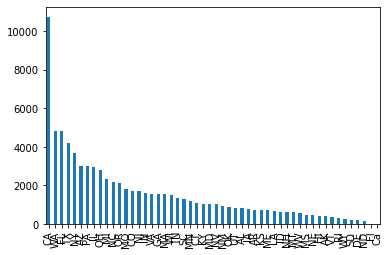

In [48]:
users.State.value_counts().plot(kind='bar');     # Quick plot by category

In [49]:
# Can also be used with numeric variables
# Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.State.value_counts()

CA    10743
WA     4809
FL     4804
TX     4186
NY     3677
AZ     3019
PA     2986
IL     2957
OH     2783
MI     2347
NC     2156
OR     2111
MO     1806
CO     1717
NJ     1712
IN     1596
VA     1582
GA     1564
MA     1557
WI     1491
TN     1365
SC     1302
MN     1217
CT     1105
KY     1040
MD     1036
NV     1023
NM      931
OK      873
UT      823
AL      808
IA      799
AR      748
KS      739
ME      712
LA      699
ID      648
NH      618
MT      602
WV      559
MS      478
NE      461
HI      410
AK      403
VT      356
RI      331
WY      239
SD      234
DE      221
ND      155
Fl        4
Ca        1
Name: State, dtype: int64

In [50]:
users.State.value_counts().sort_index()

AK      403
AL      808
AR      748
AZ     3019
CA    10743
CO     1717
CT     1105
Ca        1
DE      221
FL     4804
Fl        4
GA     1564
HI      410
IA      799
ID      648
IL     2957
IN     1596
KS      739
KY     1040
LA      699
MA     1557
MD     1036
ME      712
MI     2347
MN     1217
MO     1806
MS      478
MT      602
NC     2156
ND      155
NE      461
NH      618
NJ     1712
NM      931
NV     1023
NY     3677
OH     2783
OK      873
OR     2111
PA     2986
RI      331
SC     1302
SD      234
TN     1365
TX     4186
UT      823
VA     1582
VT      356
WA     4809
WI     1491
WV      559
WY      239
Name: State, dtype: int64

NameError: name 'plt' is not defined

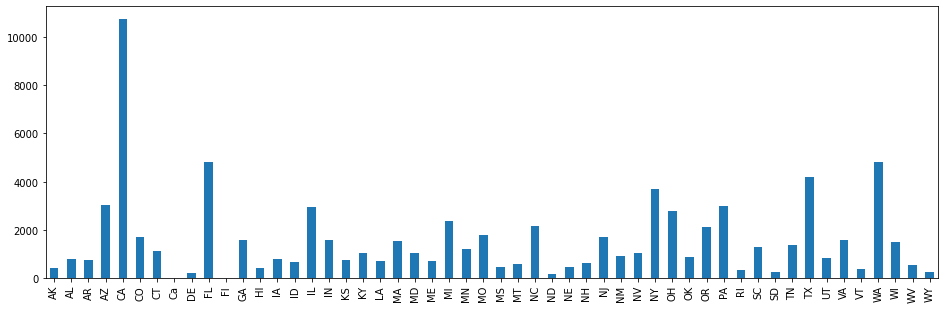

In [51]:
users.State.value_counts().sort_index().plot(kind='bar', figsize=(16,5));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

## Filtering & Sorting

In [ ]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool

In [ ]:
users[young_bool]

In [ ]:
users[users.age == 14]

In [ ]:
users[users.age < 20]

In [ ]:
# Select one column from the filtered results.
users[users.age < 20].occupation

In [ ]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

In [ ]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.sex == 'M')]

In [ ]:
# | for `OR` condition
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)]

In [ ]:
users[(users['occupation'] == 'doctor') | (users['occupation'] == 'lawyer')]

In [ ]:
# Preferred alternative to multiple `OR` conditions
users[users.occupation.isin(['doctor', 'lawyer'])]

In [ ]:
# Sort a Series
users.age.sort_values()

In [ ]:
# Sort a DataFrame by a single column.
users.sort_values('age')

In [ ]:
# Use descending order instead
users.sort_values('age', ascending=False)

In [ ]:
# Sort by multiple columns
users.sort_values(['occupation', 'age'])

## Renaming, Adding, and Removing Columns


In [52]:
drinks = pd.read_csv('data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [53]:
# Rename columns using a Python dictionary
drinks.rename(columns={'beer_servings':'beer', 
                       'wine_servings':'wine',
                       'spirit_servings':'spirit',
                       'total_litres_of_pure_alcohol':'liters'}, inplace=True)
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


## Easy Column Operations
* Rather than having to reference indexes and create for loops to do column-wise operations, Pandas knows that when we add columns together we want to add the values in each row together

In [54]:
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters * 1000

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


## Removing Columns

In [56]:
# Drop multiple columns
# axis 0 means row, axis 1 means column
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

In [57]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
